# 2024-03-26 34 - First look at new models.ipynb

Clone of `2024-03-07 30v2 - Implementing gridsearch and analyzing its impact--plus-koopa.ipynb`. 

Initially to have a glimpse at the new models run in March 25-26 during rebuttals. Not meant to make it into the final paper.


## Parameters

## Libraries and setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [5]:
from utils import wandb_utils

## Data Download

### Resilience data

In [21]:
real_df_resilience=pd.read_pickle("../data_backups/2024_02_01_1038am__icml_backup_data.pkl")
# For now, only resilience

real_df_resilience = real_df_resilience.query('constraint_type=="constant_resilience" or constraint_type=="erm"')

In [22]:
real_df_resilience[['constraint_type','resilient_lr']].drop_duplicates()

constraint_type  resilient_lr
169344  constant_resilience           0.1
764640                  erm           NaN

In [16]:
CONSTRAINT_TYPE='constant'

### Non resilience data

In [11]:
# #READ
real_df=pd.read_pickle("../data_backups/2024_02_01_1038am__icml_backup_data.pkl")
# For now, only resilience

real_df = real_df.query('constraint_type=="constant" or constraint_type=="erm"')
CONSTRAINT_TYPE='constant'

In [6]:
experiment_tags = [
    'e29_icml_erm_newdatasets',
    'e30_icml_constrained_newdatasets_train'
]

new_data=wandb_utils.get_experiment_data("Autoformer","alelab",experiment_tags=experiment_tags,query_dict={"$and": [
                        {"tags": {"$in": experiment_tags}},
                        {"state": "finished"},
        ]})

  0%|          | 0/357 [00:00<?, ?it/s]

WARNING!! Missing pointwise/cvar/0.01 in run qh8b15vk on sweep <Sweep alelab/Autoformer/7sr5dni6 (FINISHED)>. Filling all poitwisewith NAN.


  0%|          | 1/357 [00:01<08:38,  1.46s/it]

WARNING!! Missing pointwise/cvar/0.01 in run rrdjhs18 on sweep <Sweep alelab/Autoformer/7sr5dni6 (FINISHED)>. Filling all poitwisewith NAN.


  1%|          | 2/357 [00:02<08:27,  1.43s/it]

WARNING!! Missing pointwise/cvar/0.01 in run de6apgqi on sweep <Sweep alelab/Autoformer/7sr5dni6 (FINISHED)>. Filling all poitwisewith NAN.


  1%|          | 3/357 [00:04<08:23,  1.42s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5toknm9h on sweep <Sweep alelab/Autoformer/42gvfebi (FINISHED)>. Filling all poitwisewith NAN.


  1%|          | 4/357 [00:15<30:33,  5.20s/it]

WARNING!! Missing pointwise/cvar/0.01 in run lw8zax1d on sweep <Sweep alelab/Autoformer/42gvfebi (FINISHED)>. Filling all poitwisewith NAN.


  1%|▏         | 5/357 [00:26<42:27,  7.24s/it]

WARNING!! Missing pointwise/cvar/0.01 in run bsn54i76 on sweep <Sweep alelab/Autoformer/42gvfebi (FINISHED)>. Filling all poitwisewith NAN.


  2%|▏         | 6/357 [00:36<48:24,  8.27s/it]

WARNING!! Missing pointwise/cvar/0.01 in run f4sct2t4 on sweep <Sweep alelab/Autoformer/dekblru7 (FINISHED)>. Filling all poitwisewith NAN.


  2%|▏         | 7/357 [00:41<41:18,  7.08s/it]

WARNING!! Missing pointwise/cvar/0.01 in run w78u7nnl on sweep <Sweep alelab/Autoformer/dekblru7 (FINISHED)>. Filling all poitwisewith NAN.


  2%|▏         | 8/357 [00:46<37:25,  6.43s/it]

WARNING!! Missing pointwise/cvar/0.01 in run w2mdtocr on sweep <Sweep alelab/Autoformer/dekblru7 (FINISHED)>. Filling all poitwisewith NAN.


  3%|▎         | 9/357 [00:50<34:02,  5.87s/it]

WARNING!! Missing pointwise/cvar/0.01 in run c5ho8zt0 on sweep <Sweep alelab/Autoformer/vbo9ln7z (FINISHED)>. Filling all poitwisewith NAN.


  3%|▎         | 10/357 [00:53<28:16,  4.89s/it]

WARNING!! Missing pointwise/cvar/0.01 in run rjsuwfby on sweep <Sweep alelab/Autoformer/vbo9ln7z (FINISHED)>. Filling all poitwisewith NAN.


  3%|▎         | 11/357 [00:56<25:07,  4.36s/it]

WARNING!! Missing pointwise/cvar/0.01 in run suuwlc4k on sweep <Sweep alelab/Autoformer/vbo9ln7z (FINISHED)>. Filling all poitwisewith NAN.


  3%|▎         | 12/357 [00:59<22:12,  3.86s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wonzy6u5 on sweep <Sweep alelab/Autoformer/nm5ijc1k (FINISHED)>. Filling all poitwisewith NAN.


  4%|▎         | 13/357 [01:00<17:47,  3.10s/it]

WARNING!! Missing pointwise/cvar/0.01 in run efswmw62 on sweep <Sweep alelab/Autoformer/nm5ijc1k (FINISHED)>. Filling all poitwisewith NAN.


  4%|▍         | 14/357 [01:02<14:44,  2.58s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 30g912pc on sweep <Sweep alelab/Autoformer/a0cmnw82 (FINISHED)>. Filling all poitwisewith NAN.


  4%|▍         | 15/357 [01:12<28:30,  5.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run m7ppb4ut on sweep <Sweep alelab/Autoformer/a0cmnw82 (FINISHED)>. Filling all poitwisewith NAN.


  4%|▍         | 16/357 [01:23<37:47,  6.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run usjhllwl on sweep <Sweep alelab/Autoformer/pq41klha (FINISHED)>. Filling all poitwisewith NAN.


  5%|▍         | 17/357 [01:23<27:46,  4.90s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 8nurfoup on sweep <Sweep alelab/Autoformer/pq41klha (FINISHED)>. Filling all poitwisewith NAN.


  5%|▌         | 18/357 [01:24<20:47,  3.68s/it]

WARNING!! Missing pointwise/cvar/0.01 in run siqxewgb on sweep <Sweep alelab/Autoformer/pq41klha (FINISHED)>. Filling all poitwisewith NAN.


  5%|▌         | 19/357 [01:25<15:54,  2.82s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2vxy0cc4 on sweep <Sweep alelab/Autoformer/4aadpm8p (FINISHED)>. Filling all poitwisewith NAN.


  6%|▌         | 20/357 [01:26<12:13,  2.18s/it]

WARNING!! Missing pointwise/cvar/0.01 in run xfc16fym on sweep <Sweep alelab/Autoformer/4aadpm8p (FINISHED)>. Filling all poitwisewith NAN.


  6%|▌         | 21/357 [01:26<09:38,  1.72s/it]

WARNING!! Missing pointwise/cvar/0.01 in run t6n2sju8 on sweep <Sweep alelab/Autoformer/4aadpm8p (FINISHED)>. Filling all poitwisewith NAN.


  6%|▌         | 22/357 [01:27<07:50,  1.41s/it]

WARNING!! Missing pointwise/cvar/0.01 in run py09gmsx on sweep <Sweep alelab/Autoformer/ta2djhdt (FINISHED)>. Filling all poitwisewith NAN.


  6%|▋         | 23/357 [01:28<06:18,  1.13s/it]

WARNING!! Missing pointwise/cvar/0.01 in run yqzv6rpv on sweep <Sweep alelab/Autoformer/ta2djhdt (FINISHED)>. Filling all poitwisewith NAN.


  7%|▋         | 24/357 [01:28<05:14,  1.06it/s]

WARNING!! Missing pointwise/cvar/0.01 in run p9ql95xq on sweep <Sweep alelab/Autoformer/ta2djhdt (FINISHED)>. Filling all poitwisewith NAN.


  7%|▋         | 25/357 [01:29<04:29,  1.23it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 5o1fpdlz on sweep <Sweep alelab/Autoformer/hrrx0mey (FINISHED)>. Filling all poitwisewith NAN.


  7%|▋         | 26/357 [01:29<03:41,  1.50it/s]

WARNING!! Missing pointwise/cvar/0.01 in run qd76uvsq on sweep <Sweep alelab/Autoformer/hrrx0mey (FINISHED)>. Filling all poitwisewith NAN.


  8%|▊         | 27/357 [01:30<03:47,  1.45it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 6kidhg2u on sweep <Sweep alelab/Autoformer/hrrx0mey (FINISHED)>. Filling all poitwisewith NAN.


  8%|▊         | 28/357 [01:30<03:11,  1.72it/s]

WARNING!! Missing pointwise/cvar/0.01 in run o2h7bolw on sweep <Sweep alelab/Autoformer/gix1vjpx (FINISHED)>. Filling all poitwisewith NAN.


  8%|▊         | 29/357 [01:31<03:35,  1.52it/s]

WARNING!! Missing pointwise/cvar/0.01 in run pw51adrt on sweep <Sweep alelab/Autoformer/gix1vjpx (FINISHED)>. Filling all poitwisewith NAN.


  8%|▊         | 30/357 [01:32<03:51,  1.41it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 7ea1bfee on sweep <Sweep alelab/Autoformer/gix1vjpx (FINISHED)>. Filling all poitwisewith NAN.


  9%|▊         | 31/357 [01:33<04:03,  1.34it/s]

WARNING!! Missing pointwise/cvar/0.01 in run zy8wvge5 on sweep <Sweep alelab/Autoformer/r9k20tgc (FINISHED)>. Filling all poitwisewith NAN.


  9%|▉         | 32/357 [01:33<03:54,  1.39it/s]

WARNING!! Missing pointwise/cvar/0.01 in run pprpu7qk on sweep <Sweep alelab/Autoformer/r9k20tgc (FINISHED)>. Filling all poitwisewith NAN.


  9%|▉         | 33/357 [01:34<03:48,  1.42it/s]

WARNING!! Missing pointwise/cvar/0.01 in run dzl0rq0d on sweep <Sweep alelab/Autoformer/r9k20tgc (FINISHED)>. Filling all poitwisewith NAN.


 10%|▉         | 34/357 [01:35<03:45,  1.43it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 6r1f4z0f on sweep <Sweep alelab/Autoformer/lk7ffz4i (FINISHED)>. Filling all poitwisewith NAN.


 10%|▉         | 35/357 [01:35<03:28,  1.55it/s]

WARNING!! Missing pointwise/cvar/0.01 in run ipjt6c1u on sweep <Sweep alelab/Autoformer/lk7ffz4i (FINISHED)>. Filling all poitwisewith NAN.


 10%|█         | 36/357 [01:36<03:16,  1.63it/s]

WARNING!! Missing pointwise/cvar/0.01 in run c0vsgd57 on sweep <Sweep alelab/Autoformer/lk7ffz4i (FINISHED)>. Filling all poitwisewith NAN.


 10%|█         | 37/357 [01:36<03:09,  1.69it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 71fdpwii on sweep <Sweep alelab/Autoformer/2e3um89y (FINISHED)>. Filling all poitwisewith NAN.


 11%|█         | 38/357 [01:36<02:46,  1.92it/s]

WARNING!! Missing pointwise/cvar/0.01 in run g239djzn on sweep <Sweep alelab/Autoformer/2e3um89y (FINISHED)>. Filling all poitwisewith NAN.


 11%|█         | 39/357 [01:37<02:27,  2.15it/s]

WARNING!! Missing pointwise/cvar/0.01 in run ukh4dw92 on sweep <Sweep alelab/Autoformer/2e3um89y (FINISHED)>. Filling all poitwisewith NAN.


 11%|█         | 40/357 [01:37<02:14,  2.35it/s]

WARNING!! Missing pointwise/cvar/0.01 in run rv8rz4fn on sweep <Sweep alelab/Autoformer/1zrtosuz (FINISHED)>. Filling all poitwisewith NAN.


 11%|█▏        | 41/357 [01:38<02:53,  1.82it/s]

WARNING!! Missing pointwise/cvar/0.01 in run n0tvjn9v on sweep <Sweep alelab/Autoformer/1zrtosuz (FINISHED)>. Filling all poitwisewith NAN.


 12%|█▏        | 42/357 [01:39<03:19,  1.58it/s]

WARNING!! Missing pointwise/cvar/0.01 in run w9vnqcvr on sweep <Sweep alelab/Autoformer/1zrtosuz (FINISHED)>. Filling all poitwisewith NAN.


 12%|█▏        | 43/357 [01:40<03:37,  1.44it/s]

WARNING!! Missing pointwise/cvar/0.01 in run htq5co7v on sweep <Sweep alelab/Autoformer/5khjx97r (FINISHED)>. Filling all poitwisewith NAN.


 12%|█▏        | 44/357 [01:40<03:34,  1.46it/s]

WARNING!! Missing pointwise/cvar/0.01 in run db00t8og on sweep <Sweep alelab/Autoformer/5khjx97r (FINISHED)>. Filling all poitwisewith NAN.


 13%|█▎        | 45/357 [01:41<03:32,  1.47it/s]

WARNING!! Missing pointwise/cvar/0.01 in run bjwaajkz on sweep <Sweep alelab/Autoformer/5khjx97r (FINISHED)>. Filling all poitwisewith NAN.


 13%|█▎        | 46/357 [01:42<04:09,  1.25it/s]

WARNING!! Missing pointwise/cvar/0.01 in run bhb22k3w on sweep <Sweep alelab/Autoformer/5fgvwnmc (FINISHED)>. Filling all poitwisewith NAN.


 13%|█▎        | 47/357 [01:43<03:40,  1.41it/s]

WARNING!! Missing pointwise/cvar/0.01 in run pxpkvh69 on sweep <Sweep alelab/Autoformer/5fgvwnmc (FINISHED)>. Filling all poitwisewith NAN.


 13%|█▎        | 48/357 [01:43<03:19,  1.55it/s]

WARNING!! Missing pointwise/cvar/0.01 in run pbpa74aw on sweep <Sweep alelab/Autoformer/5fgvwnmc (FINISHED)>. Filling all poitwisewith NAN.


 14%|█▎        | 49/357 [01:44<03:06,  1.65it/s]

WARNING!! Missing pointwise/cvar/0.01 in run r8bx8pch on sweep <Sweep alelab/Autoformer/5eh7bjnr (FINISHED)>. Filling all poitwisewith NAN.


 14%|█▍        | 50/357 [01:44<02:41,  1.91it/s]

WARNING!! Missing pointwise/cvar/0.01 in run v9ni7cvj on sweep <Sweep alelab/Autoformer/5eh7bjnr (FINISHED)>. Filling all poitwisewith NAN.


 14%|█▍        | 51/357 [01:55<18:50,  3.69s/it]

WARNING!! Missing pointwise/cvar/0.01 in run l1gdbow7 on sweep <Sweep alelab/Autoformer/5eh7bjnr (FINISHED)>. Filling all poitwisewith NAN.


 15%|█▍        | 52/357 [01:55<13:40,  2.69s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qqtip8k5 on sweep <Sweep alelab/Autoformer/9cj3md4i (FINISHED)>. Filling all poitwisewith NAN.


 15%|█▍        | 53/357 [01:56<10:47,  2.13s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nuib0bfu on sweep <Sweep alelab/Autoformer/9cj3md4i (FINISHED)>. Filling all poitwisewith NAN.


 15%|█▌        | 54/357 [01:57<08:47,  1.74s/it]

WARNING!! Missing pointwise/cvar/0.01 in run f03c1sr6 on sweep <Sweep alelab/Autoformer/9cj3md4i (FINISHED)>. Filling all poitwisewith NAN.


 15%|█▌        | 55/357 [01:58<07:23,  1.47s/it]

WARNING!! Missing pointwise/cvar/0.01 in run uyrmytvd on sweep <Sweep alelab/Autoformer/nl76kwi4 (FINISHED)>. Filling all poitwisewith NAN.


 16%|█▌        | 56/357 [01:58<06:09,  1.23s/it]

WARNING!! Missing pointwise/cvar/0.01 in run tktfucmd on sweep <Sweep alelab/Autoformer/nl76kwi4 (FINISHED)>. Filling all poitwisewith NAN.


 16%|█▌        | 57/357 [01:59<05:18,  1.06s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dic3llqr on sweep <Sweep alelab/Autoformer/nl76kwi4 (FINISHED)>. Filling all poitwisewith NAN.


 16%|█▌        | 58/357 [02:00<04:41,  1.06it/s]

WARNING!! Missing pointwise/cvar/0.01 in run ci5bgznq on sweep <Sweep alelab/Autoformer/rgw2t2cn (FINISHED)>. Filling all poitwisewith NAN.


 17%|█▋        | 59/357 [02:00<04:01,  1.24it/s]

WARNING!! Missing pointwise/cvar/0.01 in run bsmpeys0 on sweep <Sweep alelab/Autoformer/rgw2t2cn (FINISHED)>. Filling all poitwisewith NAN.


 17%|█▋        | 60/357 [02:01<03:32,  1.39it/s]

WARNING!! Missing pointwise/cvar/0.01 in run smcjbw0h on sweep <Sweep alelab/Autoformer/rgw2t2cn (FINISHED)>. Filling all poitwisewith NAN.


 17%|█▋        | 61/357 [02:01<03:13,  1.53it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 75qrk8sr on sweep <Sweep alelab/Autoformer/mdgenk44 (FINISHED)>. Filling all poitwisewith NAN.


 17%|█▋        | 62/357 [02:02<02:45,  1.78it/s]

WARNING!! Missing pointwise/cvar/0.01 in run sn6i5tzj on sweep <Sweep alelab/Autoformer/mdgenk44 (FINISHED)>. Filling all poitwisewith NAN.


 18%|█▊        | 63/357 [02:02<02:26,  2.01it/s]

WARNING!! Missing pointwise/cvar/0.01 in run j7umhiyq on sweep <Sweep alelab/Autoformer/mdgenk44 (FINISHED)>. Filling all poitwisewith NAN.


 18%|█▊        | 64/357 [02:02<02:12,  2.21it/s]

WARNING!! Missing pointwise/cvar/0.01 in run iqzfcs8d on sweep <Sweep alelab/Autoformer/7b0fftu1 (FINISHED)>. Filling all poitwisewith NAN.


 18%|█▊        | 65/357 [02:13<17:44,  3.64s/it]

WARNING!! Missing pointwise/cvar/0.01 in run brlwd5t5 on sweep <Sweep alelab/Autoformer/7b0fftu1 (FINISHED)>. Filling all poitwisewith NAN.


 18%|█▊        | 66/357 [02:24<27:22,  5.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run x9fjws3p on sweep <Sweep alelab/Autoformer/pkc4s5uz (FINISHED)>. Filling all poitwisewith NAN.


 19%|█▉        | 67/357 [02:29<26:12,  5.42s/it]

WARNING!! Missing pointwise/cvar/0.01 in run zehtlllc on sweep <Sweep alelab/Autoformer/5070q6ds (FINISHED)>. Filling all poitwisewith NAN.


 19%|█▉        | 68/357 [02:32<23:21,  4.85s/it]

WARNING!! Missing pointwise/cvar/0.01 in run rby4oe1o on sweep <Sweep alelab/Autoformer/5070q6ds (FINISHED)>. Filling all poitwisewith NAN.


 19%|█▉        | 69/357 [02:35<20:11,  4.21s/it]

WARNING!! Missing pointwise/cvar/0.01 in run u2jusbry on sweep <Sweep alelab/Autoformer/zzeyen3o (FINISHED)>. Filling all poitwisewith NAN.


 20%|█▉        | 70/357 [02:36<16:01,  3.35s/it]

WARNING!! Missing pointwise/cvar/0.01 in run te8s6h15 on sweep <Sweep alelab/Autoformer/zzeyen3o (FINISHED)>. Filling all poitwisewith NAN.


 20%|█▉        | 71/357 [02:38<13:07,  2.75s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dbdmqhwb on sweep <Sweep alelab/Autoformer/2sekyumh (FINISHED)>. Filling all poitwisewith NAN.


 20%|██        | 72/357 [02:48<23:39,  4.98s/it]

WARNING!! Missing pointwise/cvar/0.01 in run jmmr9pua on sweep <Sweep alelab/Autoformer/2sekyumh (FINISHED)>. Filling all poitwisewith NAN.


 20%|██        | 73/357 [02:59<32:04,  6.78s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wch1xnmh on sweep <Sweep alelab/Autoformer/2sekyumh (FINISHED)>. Filling all poitwisewith NAN.


 21%|██        | 74/357 [03:09<36:48,  7.80s/it]

WARNING!! Missing pointwise/cvar/0.01 in run euoxbmj7 on sweep <Sweep alelab/Autoformer/bxn1myuw (FINISHED)>. Filling all poitwisewith NAN.


 21%|██        | 75/357 [03:14<32:40,  6.95s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 0qboe2lf on sweep <Sweep alelab/Autoformer/bxn1myuw (FINISHED)>. Filling all poitwisewith NAN.


 21%|██▏       | 76/357 [03:19<29:42,  6.34s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hxxyoqfm on sweep <Sweep alelab/Autoformer/bxn1myuw (FINISHED)>. Filling all poitwisewith NAN.


 22%|██▏       | 77/357 [03:25<28:38,  6.14s/it]

WARNING!! Missing pointwise/cvar/0.01 in run tpwvma7h on sweep <Sweep alelab/Autoformer/m4d04d9r (FINISHED)>. Filling all poitwisewith NAN.


 22%|██▏       | 78/357 [03:27<23:53,  5.14s/it]

WARNING!! Missing pointwise/cvar/0.01 in run gmt9g6ww on sweep <Sweep alelab/Autoformer/m4d04d9r (FINISHED)>. Filling all poitwisewith NAN.


 22%|██▏       | 79/357 [03:30<20:33,  4.44s/it]

WARNING!! Missing pointwise/cvar/0.01 in run i17hwosd on sweep <Sweep alelab/Autoformer/m4d04d9r (FINISHED)>. Filling all poitwisewith NAN.


 22%|██▏       | 80/357 [03:33<18:13,  3.95s/it]

WARNING!! Missing pointwise/cvar/0.01 in run s090nbgk on sweep <Sweep alelab/Autoformer/fq3gbgy9 (FINISHED)>. Filling all poitwisewith NAN.


 23%|██▎       | 81/357 [03:34<14:39,  3.19s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 7zpe3tyk on sweep <Sweep alelab/Autoformer/fq3gbgy9 (FINISHED)>. Filling all poitwisewith NAN.


 23%|██▎       | 82/357 [03:36<12:09,  2.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run xvsog5fe on sweep <Sweep alelab/Autoformer/fq3gbgy9 (FINISHED)>. Filling all poitwisewith NAN.


 23%|██▎       | 83/357 [03:37<10:24,  2.28s/it]

WARNING!! Missing pointwise/cvar/0.01 in run h60dc4et on sweep <Sweep alelab/Autoformer/0jz7f7rm (FINISHED)>. Filling all poitwisewith NAN.


 24%|██▎       | 84/357 [03:48<21:34,  4.74s/it]

WARNING!! Missing pointwise/cvar/0.01 in run vay8m4x3 on sweep <Sweep alelab/Autoformer/0jz7f7rm (FINISHED)>. Filling all poitwisewith NAN.


 24%|██▍       | 85/357 [03:59<30:14,  6.67s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hn6umxev on sweep <Sweep alelab/Autoformer/0jz7f7rm (FINISHED)>. Filling all poitwisewith NAN.


 24%|██▍       | 86/357 [04:09<34:56,  7.74s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5pboxzuk on sweep <Sweep alelab/Autoformer/23g666to (FINISHED)>. Filling all poitwisewith NAN.


 24%|██▍       | 87/357 [04:15<31:56,  7.10s/it]

WARNING!! Missing pointwise/cvar/0.01 in run j6hvuxmu on sweep <Sweep alelab/Autoformer/23g666to (FINISHED)>. Filling all poitwisewith NAN.


 25%|██▍       | 88/357 [04:19<28:38,  6.39s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1dsqh3cc on sweep <Sweep alelab/Autoformer/23g666to (FINISHED)>. Filling all poitwisewith NAN.


 25%|██▍       | 89/357 [04:24<26:21,  5.90s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 3aid1u8b on sweep <Sweep alelab/Autoformer/pm9djfz5 (FINISHED)>. Filling all poitwisewith NAN.


 25%|██▌       | 90/357 [04:27<21:59,  4.94s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hgq2h7qo on sweep <Sweep alelab/Autoformer/pm9djfz5 (FINISHED)>. Filling all poitwisewith NAN.


 25%|██▌       | 91/357 [04:30<18:57,  4.28s/it]

WARNING!! Missing pointwise/cvar/0.01 in run he1ff74m on sweep <Sweep alelab/Autoformer/pm9djfz5 (FINISHED)>. Filling all poitwisewith NAN.


 26%|██▌       | 92/357 [04:32<16:49,  3.81s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 32m2tgiy on sweep <Sweep alelab/Autoformer/aeul26y5 (FINISHED)>. Filling all poitwisewith NAN.


 26%|██▌       | 93/357 [04:34<13:31,  3.07s/it]

WARNING!! Missing pointwise/cvar/0.01 in run d0mk4988 on sweep <Sweep alelab/Autoformer/aeul26y5 (FINISHED)>. Filling all poitwisewith NAN.


 26%|██▋       | 94/357 [04:35<11:13,  2.56s/it]

WARNING!! Missing pointwise/cvar/0.01 in run u9i3usdz on sweep <Sweep alelab/Autoformer/aeul26y5 (FINISHED)>. Filling all poitwisewith NAN.


 27%|██▋       | 95/357 [04:36<09:36,  2.20s/it]

WARNING!! Missing pointwise/cvar/0.01 in run bcbnn7ko on sweep <Sweep alelab/Autoformer/rglj3pc0 (FINISHED)>. Filling all poitwisewith NAN.


 27%|██▋       | 96/357 [04:47<21:03,  4.84s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 811che8l on sweep <Sweep alelab/Autoformer/rglj3pc0 (FINISHED)>. Filling all poitwisewith NAN.


 27%|██▋       | 97/357 [04:58<28:17,  6.53s/it]

WARNING!! Missing pointwise/cvar/0.01 in run fb7e1lmm on sweep <Sweep alelab/Autoformer/rglj3pc0 (FINISHED)>. Filling all poitwisewith NAN.


 27%|██▋       | 98/357 [05:09<34:33,  8.01s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5suwxzgx on sweep <Sweep alelab/Autoformer/aovoifx5 (FINISHED)>. Filling all poitwisewith NAN.


 28%|██▊       | 99/357 [05:14<30:26,  7.08s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 0go7hmt5 on sweep <Sweep alelab/Autoformer/aovoifx5 (FINISHED)>. Filling all poitwisewith NAN.


 28%|██▊       | 100/357 [05:19<27:25,  6.40s/it]

WARNING!! Missing pointwise/cvar/0.01 in run lq18eo2m on sweep <Sweep alelab/Autoformer/aovoifx5 (FINISHED)>. Filling all poitwisewith NAN.


 28%|██▊       | 101/357 [05:35<40:10,  9.42s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1h855r8v on sweep <Sweep alelab/Autoformer/l6hqzuza (FINISHED)>. Filling all poitwisewith NAN.


 29%|██▊       | 102/357 [05:38<31:32,  7.42s/it]

WARNING!! Missing pointwise/cvar/0.01 in run t7co5qwr on sweep <Sweep alelab/Autoformer/l6hqzuza (FINISHED)>. Filling all poitwisewith NAN.


 29%|██▉       | 103/357 [05:41<25:27,  6.01s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qub41ibb on sweep <Sweep alelab/Autoformer/l6hqzuza (FINISHED)>. Filling all poitwisewith NAN.


 29%|██▉       | 104/357 [05:44<21:18,  5.06s/it]

WARNING!! Missing pointwise/cvar/0.01 in run p9xgvswm on sweep <Sweep alelab/Autoformer/k2vex34t (FINISHED)>. Filling all poitwisewith NAN.


 29%|██▉       | 105/357 [05:45<16:38,  3.96s/it]

WARNING!! Missing pointwise/cvar/0.01 in run k9gj8g06 on sweep <Sweep alelab/Autoformer/k2vex34t (FINISHED)>. Filling all poitwisewith NAN.


 30%|██▉       | 106/357 [05:47<13:18,  3.18s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dqpsc26r on sweep <Sweep alelab/Autoformer/k2vex34t (FINISHED)>. Filling all poitwisewith NAN.


 30%|██▉       | 107/357 [05:49<12:30,  3.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run r729xyep on sweep <Sweep alelab/Autoformer/i2q3c3yq (FINISHED)>. Filling all poitwisewith NAN.


 30%|███       | 108/357 [05:59<21:36,  5.21s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 6pkxpzou on sweep <Sweep alelab/Autoformer/i2q3c3yq (FINISHED)>. Filling all poitwisewith NAN.


 31%|███       | 109/357 [06:10<27:40,  6.70s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 65tz09xo on sweep <Sweep alelab/Autoformer/i2q3c3yq (FINISHED)>. Filling all poitwisewith NAN.


 31%|███       | 110/357 [06:20<32:09,  7.81s/it]

WARNING!! Missing pointwise/cvar/0.01 in run uaqfclaz on sweep <Sweep alelab/Autoformer/6qyiv2tj (FINISHED)>. Filling all poitwisewith NAN.


 31%|███       | 111/357 [06:25<28:15,  6.89s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 6tj2hta8 on sweep <Sweep alelab/Autoformer/6qyiv2tj (FINISHED)>. Filling all poitwisewith NAN.


 31%|███▏      | 112/357 [06:31<26:48,  6.57s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 7lc9g1jo on sweep <Sweep alelab/Autoformer/6qyiv2tj (FINISHED)>. Filling all poitwisewith NAN.


 32%|███▏      | 113/357 [06:35<24:30,  6.03s/it]

WARNING!! Missing pointwise/cvar/0.01 in run zchwg6al on sweep <Sweep alelab/Autoformer/586rqnm3 (FINISHED)>. Filling all poitwisewith NAN.


 32%|███▏      | 114/357 [06:38<20:24,  5.04s/it]

WARNING!! Missing pointwise/cvar/0.01 in run l4v22rsk on sweep <Sweep alelab/Autoformer/586rqnm3 (FINISHED)>. Filling all poitwisewith NAN.


 32%|███▏      | 115/357 [06:41<17:31,  4.34s/it]

WARNING!! Missing pointwise/cvar/0.01 in run k4jxxan5 on sweep <Sweep alelab/Autoformer/586rqnm3 (FINISHED)>. Filling all poitwisewith NAN.


 32%|███▏      | 116/357 [06:44<15:31,  3.86s/it]

WARNING!! Missing pointwise/cvar/0.01 in run e3vli7ez on sweep <Sweep alelab/Autoformer/uadq72q1 (FINISHED)>. Filling all poitwisewith NAN.


 33%|███▎      | 117/357 [06:45<12:28,  3.12s/it]

WARNING!! Missing pointwise/cvar/0.01 in run rflmi6dz on sweep <Sweep alelab/Autoformer/uadq72q1 (FINISHED)>. Filling all poitwisewith NAN.


 33%|███▎      | 118/357 [06:46<10:19,  2.59s/it]

WARNING!! Missing pointwise/cvar/0.01 in run k9jw4y5m on sweep <Sweep alelab/Autoformer/uadq72q1 (FINISHED)>. Filling all poitwisewith NAN.


 33%|███▎      | 119/357 [06:48<08:51,  2.23s/it]

WARNING!! Missing pointwise/cvar/0.01 in run kmtecvjw on sweep <Sweep alelab/Autoformer/g9i04mjc (FINISHED)>. Filling all poitwisewith NAN.


 34%|███▎      | 120/357 [06:58<18:24,  4.66s/it]

WARNING!! Missing pointwise/cvar/0.01 in run r2z7pqqw on sweep <Sweep alelab/Autoformer/g9i04mjc (FINISHED)>. Filling all poitwisewith NAN.


 34%|███▍      | 121/357 [07:09<26:02,  6.62s/it]

WARNING!! Missing pointwise/cvar/0.01 in run w1ajb21k on sweep <Sweep alelab/Autoformer/g9i04mjc (FINISHED)>. Filling all poitwisewith NAN.


 34%|███▍      | 122/357 [07:19<30:04,  7.68s/it]

WARNING!! Missing pointwise/cvar/0.01 in run rmdvdgax on sweep <Sweep alelab/Autoformer/bouc7qz2 (FINISHED)>. Filling all poitwisewith NAN.


 34%|███▍      | 123/357 [07:24<26:31,  6.80s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 6di08ghs on sweep <Sweep alelab/Autoformer/bouc7qz2 (FINISHED)>. Filling all poitwisewith NAN.


 35%|███▍      | 124/357 [07:29<24:10,  6.22s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1egtjz12 on sweep <Sweep alelab/Autoformer/bouc7qz2 (FINISHED)>. Filling all poitwisewith NAN.


 35%|███▌      | 125/357 [07:34<22:29,  5.82s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 38xzxrn2 on sweep <Sweep alelab/Autoformer/8eln5c6g (FINISHED)>. Filling all poitwisewith NAN.


 35%|███▌      | 126/357 [07:37<18:54,  4.91s/it]

WARNING!! Missing pointwise/cvar/0.01 in run p1awpa45 on sweep <Sweep alelab/Autoformer/8eln5c6g (FINISHED)>. Filling all poitwisewith NAN.


 36%|███▌      | 127/357 [07:39<16:22,  4.27s/it]

WARNING!! Missing pointwise/cvar/0.01 in run gmbfbgjj on sweep <Sweep alelab/Autoformer/8eln5c6g (FINISHED)>. Filling all poitwisewith NAN.


 36%|███▌      | 128/357 [07:42<14:36,  3.83s/it]

WARNING!! Missing pointwise/cvar/0.01 in run u0xgtesn on sweep <Sweep alelab/Autoformer/nm5ijc1k (FINISHED)>. Filling all poitwisewith NAN.


 36%|███▌      | 129/357 [07:44<11:45,  3.09s/it]

WARNING!! Missing pointwise/cvar/0.01 in run f3zpmlgu on sweep <Sweep alelab/Autoformer/6xec0gmk (FINISHED)>. Filling all poitwisewith NAN.


 36%|███▋      | 130/357 [07:45<09:46,  2.58s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nlk9fqhd on sweep <Sweep alelab/Autoformer/6xec0gmk (FINISHED)>. Filling all poitwisewith NAN.


 37%|███▋      | 131/357 [07:48<09:41,  2.57s/it]

WARNING!! Missing pointwise/cvar/0.01 in run jlxo89p5 on sweep <Sweep alelab/Autoformer/6xec0gmk (FINISHED)>. Filling all poitwisewith NAN.


 37%|███▋      | 132/357 [07:49<08:19,  2.22s/it]

WARNING!! Missing pointwise/cvar/0.01 in run jefzbydh on sweep <Sweep alelab/Autoformer/7ybm2xk5 (FINISHED)>. Filling all poitwisewith NAN.


 37%|███▋      | 133/357 [07:59<17:31,  4.69s/it]

WARNING!! Missing pointwise/cvar/0.01 in run kw0ok38i on sweep <Sweep alelab/Autoformer/queebetk (FINISHED)>. Filling all poitwisewith NAN.


 38%|███▊      | 134/357 [08:04<17:41,  4.76s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wxvafyre on sweep <Sweep alelab/Autoformer/queebetk (FINISHED)>. Filling all poitwisewith NAN.


 38%|███▊      | 135/357 [08:09<17:42,  4.79s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 78rpiewy on sweep <Sweep alelab/Autoformer/7ybm2xk5 (FINISHED)>. Filling all poitwisewith NAN.


 38%|███▊      | 136/357 [08:20<23:44,  6.45s/it]

WARNING!! Missing pointwise/cvar/0.01 in run fwrg82wl on sweep <Sweep alelab/Autoformer/queebetk (FINISHED)>. Filling all poitwisewith NAN.


 38%|███▊      | 137/357 [08:24<21:43,  5.93s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5lk3hevp on sweep <Sweep alelab/Autoformer/j50girwj (FINISHED)>. Filling all poitwisewith NAN.


 39%|███▊      | 138/357 [08:28<19:23,  5.31s/it]

WARNING!! Missing pointwise/cvar/0.01 in run i5gp6to4 on sweep <Sweep alelab/Autoformer/7ybm2xk5 (FINISHED)>. Filling all poitwisewith NAN.


 39%|███▉      | 139/357 [08:38<24:35,  6.77s/it]

WARNING!! Missing pointwise/cvar/0.01 in run fo55teaq on sweep <Sweep alelab/Autoformer/j50girwj (FINISHED)>. Filling all poitwisewith NAN.


 39%|███▉      | 140/357 [08:41<20:07,  5.56s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dgpdxcrd on sweep <Sweep alelab/Autoformer/ybmoh07x (FINISHED)>. Filling all poitwisewith NAN.


 39%|███▉      | 141/357 [08:46<19:16,  5.35s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 3isjptvz on sweep <Sweep alelab/Autoformer/j50girwj (FINISHED)>. Filling all poitwisewith NAN.


 40%|███▉      | 142/357 [08:49<16:20,  4.56s/it]

WARNING!! Missing pointwise/cvar/0.01 in run bz7xl0x7 on sweep <Sweep alelab/Autoformer/qxyeshv9 (FINISHED)>. Filling all poitwisewith NAN.


 40%|████      | 143/357 [08:50<12:50,  3.60s/it]

WARNING!! Missing pointwise/cvar/0.01 in run jted92je on sweep <Sweep alelab/Autoformer/ybmoh07x (FINISHED)>. Filling all poitwisewith NAN.


 40%|████      | 144/357 [08:55<14:05,  3.97s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qq057gfn on sweep <Sweep alelab/Autoformer/qxyeshv9 (FINISHED)>. Filling all poitwisewith NAN.


 41%|████      | 145/357 [08:56<11:13,  3.18s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 56y3ft0u on sweep <Sweep alelab/Autoformer/ybmoh07x (FINISHED)>. Filling all poitwisewith NAN.


 41%|████      | 146/357 [09:01<12:50,  3.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hf0bso3o on sweep <Sweep alelab/Autoformer/qxyeshv9 (FINISHED)>. Filling all poitwisewith NAN.


 41%|████      | 147/357 [09:02<10:19,  2.95s/it]

WARNING!! Missing pointwise/cvar/0.01 in run p8tg55ik on sweep <Sweep alelab/Autoformer/eq5l43zl (FINISHED)>. Filling all poitwisewith NAN.


 41%|████▏     | 148/357 [09:06<11:16,  3.24s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ahgoat9c on sweep <Sweep alelab/Autoformer/eq5l43zl (FINISHED)>. Filling all poitwisewith NAN.


 42%|████▏     | 149/357 [09:09<10:40,  3.08s/it]

WARNING!! Missing pointwise/cvar/0.01 in run zsawqeh7 on sweep <Sweep alelab/Autoformer/eq5l43zl (FINISHED)>. Filling all poitwisewith NAN.


 42%|████▏     | 150/357 [09:12<10:18,  2.99s/it]

WARNING!! Missing pointwise/cvar/0.01 in run zsawqeh7 on sweep <Sweep alelab/Autoformer/eq5l43zl (FINISHED)>. Filling all poitwisewith NAN.


 42%|████▏     | 151/357 [09:28<23:33,  6.86s/it]

WARNING!! Missing pointwise/cvar/0.01 in run b98kxcj7 on sweep <Sweep alelab/Autoformer/u0zgbnfl (FINISHED)>. Filling all poitwisewith NAN.


 43%|████▎     | 152/357 [09:29<17:51,  5.23s/it]

WARNING!! Missing pointwise/cvar/0.01 in run o1c9yeuh on sweep <Sweep alelab/Autoformer/u0zgbnfl (FINISHED)>. Filling all poitwisewith NAN.


 43%|████▎     | 153/357 [09:30<13:53,  4.08s/it]

WARNING!! Missing pointwise/cvar/0.01 in run mt5ncc4v on sweep <Sweep alelab/Autoformer/u0zgbnfl (FINISHED)>. Filling all poitwisewith NAN.


 43%|████▎     | 154/357 [09:32<11:06,  3.28s/it]

WARNING!! Missing pointwise/cvar/0.01 in run kmd9d5f2 on sweep <Sweep alelab/Autoformer/3yh5ka8o (FINISHED)>. Filling all poitwisewith NAN.


 43%|████▎     | 155/357 [09:42<18:06,  5.38s/it]

WARNING!! Missing pointwise/cvar/0.01 in run cbqhp9yx on sweep <Sweep alelab/Autoformer/3yh5ka8o (FINISHED)>. Filling all poitwisewith NAN.


 44%|████▎     | 156/357 [09:54<24:53,  7.43s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 98ucvitg on sweep <Sweep alelab/Autoformer/3yh5ka8o (FINISHED)>. Filling all poitwisewith NAN.


 44%|████▍     | 157/357 [10:04<27:31,  8.26s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 9nbqns0p on sweep <Sweep alelab/Autoformer/q68y39kk (FINISHED)>. Filling all poitwisewith NAN.


 44%|████▍     | 158/357 [10:09<23:56,  7.22s/it]

WARNING!! Missing pointwise/cvar/0.01 in run f5vl9yc7 on sweep <Sweep alelab/Autoformer/q68y39kk (FINISHED)>. Filling all poitwisewith NAN.


 45%|████▍     | 159/357 [10:14<21:27,  6.50s/it]

WARNING!! Missing pointwise/cvar/0.01 in run flqr8m1v on sweep <Sweep alelab/Autoformer/q68y39kk (FINISHED)>. Filling all poitwisewith NAN.


 45%|████▍     | 160/357 [10:19<19:51,  6.05s/it]

WARNING!! Missing pointwise/cvar/0.01 in run fycliwgj on sweep <Sweep alelab/Autoformer/35solvxx (FINISHED)>. Filling all poitwisewith NAN.


 45%|████▌     | 161/357 [10:22<16:33,  5.07s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 0u2zc7q6 on sweep <Sweep alelab/Autoformer/35solvxx (FINISHED)>. Filling all poitwisewith NAN.


 45%|████▌     | 162/357 [10:25<14:12,  4.37s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 37dqwjr4 on sweep <Sweep alelab/Autoformer/35solvxx (FINISHED)>. Filling all poitwisewith NAN.


 46%|████▌     | 163/357 [10:27<12:32,  3.88s/it]

WARNING!! Missing pointwise/cvar/0.01 in run tugjo48j on sweep <Sweep alelab/Autoformer/8ycyw8c0 (FINISHED)>. Filling all poitwisewith NAN.


 46%|████▌     | 164/357 [10:29<10:02,  3.12s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hpk2xnw8 on sweep <Sweep alelab/Autoformer/8ycyw8c0 (FINISHED)>. Filling all poitwisewith NAN.


 46%|████▌     | 165/357 [10:30<08:17,  2.59s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 6t3jalta on sweep <Sweep alelab/Autoformer/8ycyw8c0 (FINISHED)>. Filling all poitwisewith NAN.


 46%|████▋     | 166/357 [10:31<07:04,  2.22s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 4knle68w on sweep <Sweep alelab/Autoformer/8c1vv2x8 (FINISHED)>. Filling all poitwisewith NAN.


 47%|████▋     | 167/357 [10:43<15:49,  5.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run jjnyw3fd on sweep <Sweep alelab/Autoformer/8c1vv2x8 (FINISHED)>. Filling all poitwisewith NAN.


 47%|████▋     | 168/357 [10:53<20:32,  6.52s/it]

WARNING!! Missing pointwise/cvar/0.01 in run gmf5icki on sweep <Sweep alelab/Autoformer/8c1vv2x8 (FINISHED)>. Filling all poitwisewith NAN.


 47%|████▋     | 169/357 [11:03<23:49,  7.61s/it]

WARNING!! Missing pointwise/cvar/0.01 in run c1hnmcwc on sweep <Sweep alelab/Autoformer/uhw7abnb (FINISHED)>. Filling all poitwisewith NAN.


 48%|████▊     | 170/357 [11:08<21:01,  6.74s/it]

WARNING!! Missing pointwise/cvar/0.01 in run p799mzdj on sweep <Sweep alelab/Autoformer/uhw7abnb (FINISHED)>. Filling all poitwisewith NAN.


 48%|████▊     | 171/357 [11:12<18:55,  6.10s/it]

WARNING!! Missing pointwise/cvar/0.01 in run vq0fztgi on sweep <Sweep alelab/Autoformer/uhw7abnb (FINISHED)>. Filling all poitwisewith NAN.


 48%|████▊     | 172/357 [11:17<17:26,  5.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5druwd8e on sweep <Sweep alelab/Autoformer/eliq90fi (FINISHED)>. Filling all poitwisewith NAN.


 48%|████▊     | 173/357 [11:20<14:38,  4.77s/it]

WARNING!! Missing pointwise/cvar/0.01 in run jhq7s47p on sweep <Sweep alelab/Autoformer/eliq90fi (FINISHED)>. Filling all poitwisewith NAN.


 49%|████▊     | 174/357 [11:22<12:38,  4.14s/it]

WARNING!! Missing pointwise/cvar/0.01 in run z91fd7tl on sweep <Sweep alelab/Autoformer/eliq90fi (FINISHED)>. Filling all poitwisewith NAN.


 49%|████▉     | 175/357 [11:25<11:14,  3.71s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2ek4txar on sweep <Sweep alelab/Autoformer/zq6pwxqw (FINISHED)>. Filling all poitwisewith NAN.


 49%|████▉     | 176/357 [11:26<09:01,  2.99s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 61mqc433 on sweep <Sweep alelab/Autoformer/zq6pwxqw (FINISHED)>. Filling all poitwisewith NAN.


 50%|████▉     | 177/357 [11:28<07:28,  2.49s/it]

WARNING!! Missing pointwise/cvar/0.01 in run e7kpfe0j on sweep <Sweep alelab/Autoformer/zq6pwxqw (FINISHED)>. Filling all poitwisewith NAN.


 50%|████▉     | 178/357 [11:29<06:23,  2.14s/it]

WARNING!! Missing pointwise/cvar/0.01 in run omohiqek on sweep <Sweep alelab/Autoformer/56gdu6l4 (FINISHED)>. Filling all poitwisewith NAN.


 50%|█████     | 179/357 [11:41<14:38,  4.93s/it]

WARNING!! Missing pointwise/cvar/0.01 in run uwynuynl on sweep <Sweep alelab/Autoformer/56gdu6l4 (FINISHED)>. Filling all poitwisewith NAN.


 50%|█████     | 180/357 [11:50<18:53,  6.41s/it]

WARNING!! Missing pointwise/cvar/0.01 in run v3zwjqgc on sweep <Sweep alelab/Autoformer/56gdu6l4 (FINISHED)>. Filling all poitwisewith NAN.


 51%|█████     | 181/357 [12:00<21:57,  7.48s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5fpcqb8g on sweep <Sweep alelab/Autoformer/c6b1g2g8 (FINISHED)>. Filling all poitwisewith NAN.


 51%|█████     | 182/357 [12:05<19:19,  6.62s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 0xbhsmsw on sweep <Sweep alelab/Autoformer/c6b1g2g8 (FINISHED)>. Filling all poitwisewith NAN.


 51%|█████▏    | 183/357 [12:10<17:27,  6.02s/it]

WARNING!! Missing pointwise/cvar/0.01 in run b10yhp97 on sweep <Sweep alelab/Autoformer/c6b1g2g8 (FINISHED)>. Filling all poitwisewith NAN.


 52%|█████▏    | 184/357 [12:14<16:07,  5.60s/it]

WARNING!! Missing pointwise/cvar/0.01 in run pwgdhwty on sweep <Sweep alelab/Autoformer/z9sf2rah (FINISHED)>. Filling all poitwisewith NAN.


 52%|█████▏    | 185/357 [12:17<13:29,  4.71s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ybga36wr on sweep <Sweep alelab/Autoformer/z9sf2rah (FINISHED)>. Filling all poitwisewith NAN.


 52%|█████▏    | 186/357 [12:19<11:38,  4.08s/it]

WARNING!! Missing pointwise/cvar/0.01 in run pi2511t4 on sweep <Sweep alelab/Autoformer/z9sf2rah (FINISHED)>. Filling all poitwisewith NAN.


 52%|█████▏    | 187/357 [12:22<10:20,  3.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run trznhh2h on sweep <Sweep alelab/Autoformer/h90bjh39 (FINISHED)>. Filling all poitwisewith NAN.


 53%|█████▎    | 188/357 [12:23<08:18,  2.95s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 4slputvc on sweep <Sweep alelab/Autoformer/h90bjh39 (FINISHED)>. Filling all poitwisewith NAN.


 53%|█████▎    | 189/357 [12:25<06:52,  2.46s/it]

WARNING!! Missing pointwise/cvar/0.01 in run x5qu455o on sweep <Sweep alelab/Autoformer/h90bjh39 (FINISHED)>. Filling all poitwisewith NAN.


 53%|█████▎    | 190/357 [12:26<05:53,  2.12s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 8xfb1bt9 on sweep <Sweep alelab/Autoformer/ts9hpxe5 (FINISHED)>. Filling all poitwisewith NAN.


 54%|█████▎    | 191/357 [12:37<13:31,  4.89s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ip6hz4mq on sweep <Sweep alelab/Autoformer/ts9hpxe5 (FINISHED)>. Filling all poitwisewith NAN.


 54%|█████▍    | 192/357 [12:47<17:34,  6.39s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 8sutuy3m on sweep <Sweep alelab/Autoformer/ts9hpxe5 (FINISHED)>. Filling all poitwisewith NAN.


 54%|█████▍    | 193/357 [12:57<20:17,  7.43s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 7lko8lie on sweep <Sweep alelab/Autoformer/zow7gqni (FINISHED)>. Filling all poitwisewith NAN.


 54%|█████▍    | 194/357 [13:02<17:53,  6.59s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 7uc7svf9 on sweep <Sweep alelab/Autoformer/zow7gqni (FINISHED)>. Filling all poitwisewith NAN.


 55%|█████▍    | 195/357 [13:06<16:11,  6.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run upwdfha6 on sweep <Sweep alelab/Autoformer/zow7gqni (FINISHED)>. Filling all poitwisewith NAN.


 55%|█████▍    | 196/357 [13:11<14:59,  5.59s/it]

WARNING!! Missing pointwise/cvar/0.01 in run p1ifo2ka on sweep <Sweep alelab/Autoformer/k4f1gfxe (FINISHED)>. Filling all poitwisewith NAN.


 55%|█████▌    | 197/357 [13:14<12:33,  4.71s/it]

WARNING!! Missing pointwise/cvar/0.01 in run n5018cgh on sweep <Sweep alelab/Autoformer/k4f1gfxe (FINISHED)>. Filling all poitwisewith NAN.


 55%|█████▌    | 198/357 [13:16<10:50,  4.09s/it]

WARNING!! Missing pointwise/cvar/0.01 in run v5a362e9 on sweep <Sweep alelab/Autoformer/k4f1gfxe (FINISHED)>. Filling all poitwisewith NAN.


 56%|█████▌    | 199/357 [13:19<09:37,  3.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 40z9kx70 on sweep <Sweep alelab/Autoformer/2jebj1d1 (FINISHED)>. Filling all poitwisewith NAN.


 56%|█████▌    | 200/357 [13:22<09:02,  3.46s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 40z9kx70 on sweep <Sweep alelab/Autoformer/2jebj1d1 (FINISHED)>. Filling all poitwisewith NAN.


 56%|█████▋    | 201/357 [13:36<16:58,  6.53s/it]

WARNING!! Missing pointwise/cvar/0.01 in run adlq8whm on sweep <Sweep alelab/Autoformer/2jebj1d1 (FINISHED)>. Filling all poitwisewith NAN.


 57%|█████▋    | 202/357 [13:37<12:50,  4.97s/it]

WARNING!! Missing pointwise/cvar/0.01 in run c8ihaxvj on sweep <Sweep alelab/Autoformer/2jebj1d1 (FINISHED)>. Filling all poitwisewith NAN.


 57%|█████▋    | 203/357 [13:38<09:57,  3.88s/it]

WARNING!! Missing pointwise/cvar/0.01 in run xlv5s97m on sweep <Sweep alelab/Autoformer/3q5kynbi (FINISHED)>. Filling all poitwisewith NAN.


 57%|█████▋    | 204/357 [13:48<14:31,  5.70s/it]

WARNING!! Missing pointwise/cvar/0.01 in run neu4d8qq on sweep <Sweep alelab/Autoformer/3q5kynbi (FINISHED)>. Filling all poitwisewith NAN.


 57%|█████▋    | 205/357 [13:58<17:49,  7.04s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 0rdafzme on sweep <Sweep alelab/Autoformer/3q5kynbi (FINISHED)>. Filling all poitwisewith NAN.


 58%|█████▊    | 206/357 [14:08<19:55,  7.92s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2bfkhgoj on sweep <Sweep alelab/Autoformer/r62kvvmq (FINISHED)>. Filling all poitwisewith NAN.


 58%|█████▊    | 207/357 [14:13<17:20,  6.94s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ci8ia1m7 on sweep <Sweep alelab/Autoformer/r62kvvmq (FINISHED)>. Filling all poitwisewith NAN.


 58%|█████▊    | 208/357 [14:18<15:31,  6.25s/it]

WARNING!! Missing pointwise/cvar/0.01 in run e9mequx2 on sweep <Sweep alelab/Autoformer/r62kvvmq (FINISHED)>. Filling all poitwisewith NAN.


 59%|█████▊    | 209/357 [14:22<14:13,  5.77s/it]

WARNING!! Missing pointwise/cvar/0.01 in run zm9cauk5 on sweep <Sweep alelab/Autoformer/oa1e3u9v (FINISHED)>. Filling all poitwisewith NAN.


 59%|█████▉    | 210/357 [14:25<11:53,  4.85s/it]

WARNING!! Missing pointwise/cvar/0.01 in run b7wdeqie on sweep <Sweep alelab/Autoformer/oa1e3u9v (FINISHED)>. Filling all poitwisewith NAN.


 59%|█████▉    | 211/357 [14:28<10:14,  4.21s/it]

WARNING!! Missing pointwise/cvar/0.01 in run mz64jhkn on sweep <Sweep alelab/Autoformer/oa1e3u9v (FINISHED)>. Filling all poitwisewith NAN.


 59%|█████▉    | 212/357 [14:30<09:05,  3.76s/it]

WARNING!! Missing pointwise/cvar/0.01 in run pjgap0h4 on sweep <Sweep alelab/Autoformer/i8m6k2n3 (FINISHED)>. Filling all poitwisewith NAN.


 60%|█████▉    | 213/357 [14:34<08:55,  3.72s/it]

WARNING!! Missing pointwise/cvar/0.01 in run lm6ebwfa on sweep <Sweep alelab/Autoformer/i8m6k2n3 (FINISHED)>. Filling all poitwisewith NAN.


 60%|█████▉    | 214/357 [14:35<07:09,  3.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nwkvmvmi on sweep <Sweep alelab/Autoformer/i8m6k2n3 (FINISHED)>. Filling all poitwisewith NAN.


 60%|██████    | 215/357 [14:37<05:54,  2.50s/it]

WARNING!! Missing pointwise/cvar/0.01 in run bsus518y on sweep <Sweep alelab/Autoformer/82hhgf4w (FINISHED)>. Filling all poitwisewith NAN.


 61%|██████    | 216/357 [14:47<11:12,  4.77s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dnqxxnf4 on sweep <Sweep alelab/Autoformer/82hhgf4w (FINISHED)>. Filling all poitwisewith NAN.


 61%|██████    | 217/357 [14:57<14:45,  6.33s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 896mvu0m on sweep <Sweep alelab/Autoformer/82hhgf4w (FINISHED)>. Filling all poitwisewith NAN.


 61%|██████    | 218/357 [15:07<17:08,  7.40s/it]

WARNING!! Missing pointwise/cvar/0.01 in run sci7nlow on sweep <Sweep alelab/Autoformer/oha0gj0s (FINISHED)>. Filling all poitwisewith NAN.


 61%|██████▏   | 219/357 [15:11<15:08,  6.58s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5c1ebf9g on sweep <Sweep alelab/Autoformer/oha0gj0s (FINISHED)>. Filling all poitwisewith NAN.


 62%|██████▏   | 220/357 [15:16<13:44,  6.02s/it]

WARNING!! Missing pointwise/cvar/0.01 in run mvad7e5w on sweep <Sweep alelab/Autoformer/oha0gj0s (FINISHED)>. Filling all poitwisewith NAN.


 62%|██████▏   | 221/357 [15:21<12:44,  5.62s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1xw7nbwn on sweep <Sweep alelab/Autoformer/tg8gh6z3 (FINISHED)>. Filling all poitwisewith NAN.


 62%|██████▏   | 222/357 [15:23<10:40,  4.75s/it]

WARNING!! Missing pointwise/cvar/0.01 in run he1dmtyh on sweep <Sweep alelab/Autoformer/tg8gh6z3 (FINISHED)>. Filling all poitwisewith NAN.


 62%|██████▏   | 223/357 [15:26<09:12,  4.13s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5hsv8iww on sweep <Sweep alelab/Autoformer/tg8gh6z3 (FINISHED)>. Filling all poitwisewith NAN.


 63%|██████▎   | 224/357 [15:29<08:11,  3.69s/it]

WARNING!! Missing pointwise/cvar/0.01 in run owuyye9i on sweep <Sweep alelab/Autoformer/be8x4652 (FINISHED)>. Filling all poitwisewith NAN.


 63%|██████▎   | 225/357 [15:30<06:35,  2.99s/it]

WARNING!! Missing pointwise/cvar/0.01 in run k68wfk8i on sweep <Sweep alelab/Autoformer/be8x4652 (FINISHED)>. Filling all poitwisewith NAN.


 63%|██████▎   | 226/357 [15:31<05:26,  2.49s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 97k3qq6o on sweep <Sweep alelab/Autoformer/be8x4652 (FINISHED)>. Filling all poitwisewith NAN.


 64%|██████▎   | 227/357 [15:33<04:38,  2.15s/it]

WARNING!! Missing pointwise/cvar/0.01 in run b0vgcb91 on sweep <Sweep alelab/Autoformer/hgy5aan5 (FINISHED)>. Filling all poitwisewith NAN.


 64%|██████▍   | 228/357 [15:45<11:06,  5.17s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1trajpff on sweep <Sweep alelab/Autoformer/hgy5aan5 (FINISHED)>. Filling all poitwisewith NAN.


 64%|██████▍   | 229/357 [15:55<14:05,  6.60s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ssq2do8x on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 64%|██████▍   | 230/357 [16:05<16:17,  7.69s/it]

WARNING!! Missing pointwise/cvar/0.01 in run uciimec9 on sweep <Sweep alelab/Autoformer/hgy5aan5 (FINISHED)>. Filling all poitwisewith NAN.


 65%|██████▍   | 231/357 [16:15<17:32,  8.35s/it]

WARNING!! Missing pointwise/cvar/0.01 in run yyazb2m0 on sweep <Sweep alelab/Autoformer/aidyzvsm (FINISHED)>. Filling all poitwisewith NAN.


 65%|██████▍   | 232/357 [16:20<15:03,  7.23s/it]

WARNING!! Missing pointwise/cvar/0.01 in run cj1s95eb on sweep <Sweep alelab/Autoformer/aidyzvsm (FINISHED)>. Filling all poitwisewith NAN.


 65%|██████▌   | 233/357 [16:24<13:22,  6.48s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 7ugstn3z on sweep <Sweep alelab/Autoformer/aidyzvsm (FINISHED)>. Filling all poitwisewith NAN.


 66%|██████▌   | 234/357 [16:29<12:07,  5.91s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ybzlj1to on sweep <Sweep alelab/Autoformer/c03gkpht (FINISHED)>. Filling all poitwisewith NAN.


 66%|██████▌   | 235/357 [16:32<10:01,  4.93s/it]

WARNING!! Missing pointwise/cvar/0.01 in run v2zg57sq on sweep <Sweep alelab/Autoformer/c03gkpht (FINISHED)>. Filling all poitwisewith NAN.


 66%|██████▌   | 236/357 [16:34<08:33,  4.24s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nl9kpfsp on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 66%|██████▋   | 237/357 [16:39<08:54,  4.46s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qrmko1ou on sweep <Sweep alelab/Autoformer/c03gkpht (FINISHED)>. Filling all poitwisewith NAN.


 67%|██████▋   | 238/357 [16:42<07:49,  3.94s/it]

WARNING!! Missing pointwise/cvar/0.01 in run r2pdashw on sweep <Sweep alelab/Autoformer/hrts2qxk (FINISHED)>. Filling all poitwisewith NAN.


 67%|██████▋   | 239/357 [16:43<06:13,  3.17s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wq7i4x24 on sweep <Sweep alelab/Autoformer/hrts2qxk (FINISHED)>. Filling all poitwisewith NAN.


 67%|██████▋   | 240/357 [16:45<05:07,  2.62s/it]

WARNING!! Missing pointwise/cvar/0.01 in run vh9jk0ts on sweep <Sweep alelab/Autoformer/hrts2qxk (FINISHED)>. Filling all poitwisewith NAN.


 68%|██████▊   | 241/357 [16:46<04:20,  2.24s/it]

WARNING!! Missing pointwise/cvar/0.01 in run avo2qgiq on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 68%|██████▊   | 242/357 [16:49<04:37,  2.41s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 0hg68kso on sweep <Sweep alelab/Autoformer/movcsk0v (FINISHED)>. Filling all poitwisewith NAN.


 68%|██████▊   | 243/357 [17:01<10:09,  5.35s/it]

WARNING!! Missing pointwise/cvar/0.01 in run cfo5eg0t on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 68%|██████▊   | 244/357 [17:02<07:49,  4.16s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 4gj8alty on sweep <Sweep alelab/Autoformer/movcsk0v (FINISHED)>. Filling all poitwisewith NAN.


 69%|██████▊   | 245/357 [17:13<11:03,  5.92s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hrswewmx on sweep <Sweep alelab/Autoformer/movcsk0v (FINISHED)>. Filling all poitwisewith NAN.


 69%|██████▉   | 246/357 [17:23<13:13,  7.15s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qsxqib5n on sweep <Sweep alelab/Autoformer/n4o6mo05 (FINISHED)>. Filling all poitwisewith NAN.


 69%|██████▉   | 247/357 [17:27<11:42,  6.39s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 54oajwi2 on sweep <Sweep alelab/Autoformer/n4o6mo05 (FINISHED)>. Filling all poitwisewith NAN.


 69%|██████▉   | 248/357 [17:32<10:41,  5.88s/it]

WARNING!! Missing pointwise/cvar/0.01 in run pwg5q2m4 on sweep <Sweep alelab/Autoformer/n4o6mo05 (FINISHED)>. Filling all poitwisewith NAN.


 70%|██████▉   | 249/357 [17:37<09:56,  5.52s/it]

WARNING!! Missing pointwise/cvar/0.01 in run gqc7ltxr on sweep <Sweep alelab/Autoformer/pmdgf7vp (FINISHED)>. Filling all poitwisewith NAN.


 70%|███████   | 250/357 [17:39<08:18,  4.66s/it]

WARNING!! Missing pointwise/cvar/0.01 in run gqc7ltxr on sweep <Sweep alelab/Autoformer/pmdgf7vp (FINISHED)>. Filling all poitwisewith NAN.


 70%|███████   | 251/357 [17:51<12:06,  6.85s/it]

WARNING!! Missing pointwise/cvar/0.01 in run tv4dl4xb on sweep <Sweep alelab/Autoformer/pmdgf7vp (FINISHED)>. Filling all poitwisewith NAN.


 71%|███████   | 252/357 [17:54<09:48,  5.60s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dupfdm5n on sweep <Sweep alelab/Autoformer/pmdgf7vp (FINISHED)>. Filling all poitwisewith NAN.


 71%|███████   | 253/357 [17:57<08:12,  4.73s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 64uvszfp on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 71%|███████   | 254/357 [18:07<11:02,  6.43s/it]

WARNING!! Missing pointwise/cvar/0.01 in run sp4ps0fh on sweep <Sweep alelab/Autoformer/fv0tmr6j (FINISHED)>. Filling all poitwisewith NAN.


 71%|███████▏  | 255/357 [18:08<08:20,  4.91s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 50b98s9m on sweep <Sweep alelab/Autoformer/fv0tmr6j (FINISHED)>. Filling all poitwisewith NAN.


 72%|███████▏  | 256/357 [18:10<06:28,  3.84s/it]

WARNING!! Missing pointwise/cvar/0.01 in run x1uo6ze8 on sweep <Sweep alelab/Autoformer/fv0tmr6j (FINISHED)>. Filling all poitwisewith NAN.


 72%|███████▏  | 257/357 [18:11<05:09,  3.09s/it]

WARNING!! Missing pointwise/cvar/0.01 in run w19l0x2p on sweep <Sweep alelab/Autoformer/8ocxmvde (FINISHED)>. Filling all poitwisewith NAN.


 72%|███████▏  | 258/357 [18:21<08:32,  5.17s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ovn7p5dd on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 73%|███████▎  | 259/357 [18:26<08:17,  5.07s/it]

WARNING!! Missing pointwise/cvar/0.01 in run azdezf7z on sweep <Sweep alelab/Autoformer/8ocxmvde (FINISHED)>. Filling all poitwisewith NAN.


 73%|███████▎  | 260/357 [18:36<10:33,  6.53s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qhmtd2ap on sweep <Sweep alelab/Autoformer/8ocxmvde (FINISHED)>. Filling all poitwisewith NAN.


 73%|███████▎  | 261/357 [18:48<13:12,  8.25s/it]

WARNING!! Missing pointwise/cvar/0.01 in run exmg2gg0 on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 73%|███████▎  | 262/357 [18:51<10:26,  6.60s/it]

WARNING!! Missing pointwise/cvar/0.01 in run y1hl43yk on sweep <Sweep alelab/Autoformer/q9x9o25q (FINISHED)>. Filling all poitwisewith NAN.


 74%|███████▎  | 263/357 [18:55<09:26,  6.03s/it]

WARNING!! Missing pointwise/cvar/0.01 in run xdkn8kkz on sweep <Sweep alelab/Autoformer/q9x9o25q (FINISHED)>. Filling all poitwisewith NAN.


 74%|███████▍  | 264/357 [19:00<08:42,  5.61s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5ivk4sa1 on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 74%|███████▍  | 265/357 [19:02<06:39,  4.34s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 651rlolp on sweep <Sweep alelab/Autoformer/q9x9o25q (FINISHED)>. Filling all poitwisewith NAN.


 75%|███████▍  | 266/357 [19:06<06:43,  4.44s/it]

WARNING!! Missing pointwise/cvar/0.01 in run m8jwfqgi on sweep <Sweep alelab/Autoformer/csq6arls (FINISHED)>. Filling all poitwisewith NAN.


 75%|███████▍  | 267/357 [19:09<05:51,  3.90s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2vznx0cu on sweep <Sweep alelab/Autoformer/csq6arls (FINISHED)>. Filling all poitwisewith NAN.


 75%|███████▌  | 268/357 [19:11<05:13,  3.52s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 684cre9z on sweep <Sweep alelab/Autoformer/csq6arls (FINISHED)>. Filling all poitwisewith NAN.


 75%|███████▌  | 269/357 [19:14<04:46,  3.26s/it]

WARNING!! Missing pointwise/cvar/0.01 in run b4n0754u on sweep <Sweep alelab/Autoformer/123ueqeq (FINISHED)>. Filling all poitwisewith NAN.


 76%|███████▌  | 270/357 [19:15<03:52,  2.68s/it]

WARNING!! Missing pointwise/cvar/0.01 in run g7biweq5 on sweep <Sweep alelab/Autoformer/123ueqeq (FINISHED)>. Filling all poitwisewith NAN.


 76%|███████▌  | 271/357 [19:17<03:15,  2.27s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ncvpdj0w on sweep <Sweep alelab/Autoformer/123ueqeq (FINISHED)>. Filling all poitwisewith NAN.


 76%|███████▌  | 272/357 [19:18<02:49,  2.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ugz4wtkz on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 76%|███████▋  | 273/357 [19:28<06:17,  4.49s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 6o0rkyy5 on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 77%|███████▋  | 274/357 [19:33<06:21,  4.60s/it]

WARNING!! Missing pointwise/cvar/0.01 in run kknqm2fe on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 77%|███████▋  | 275/357 [19:36<05:31,  4.04s/it]

WARNING!! Missing pointwise/cvar/0.01 in run fryk3j68 on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 77%|███████▋  | 276/357 [19:37<04:22,  3.24s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2ay68dwq on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 78%|███████▊  | 277/357 [19:48<07:10,  5.39s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 9ssbipuu on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 78%|███████▊  | 278/357 [19:49<05:18,  4.03s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2qa1s6bx on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 78%|███████▊  | 279/357 [19:49<03:55,  3.02s/it]

WARNING!! Missing pointwise/cvar/0.01 in run l2jupa3o on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 78%|███████▊  | 280/357 [19:50<02:54,  2.27s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 8lot5xux on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 79%|███████▊  | 281/357 [19:50<02:08,  1.69s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 3rb4tf5u on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 79%|███████▉  | 282/357 [19:51<01:48,  1.44s/it]

WARNING!! Missing pointwise/cvar/0.01 in run yd647pro on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 79%|███████▉  | 283/357 [19:52<01:29,  1.21s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ntd1t0gm on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 80%|███████▉  | 284/357 [19:52<01:13,  1.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run cc0cjrv3 on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 80%|███████▉  | 285/357 [19:53<00:57,  1.24it/s]

WARNING!! Missing pointwise/cvar/0.01 in run igx8r6rf on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 80%|████████  | 286/357 [19:53<00:58,  1.22it/s]

WARNING!! Missing pointwise/cvar/0.01 in run al4zna2k on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 80%|████████  | 287/357 [19:58<02:21,  2.02s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 4ngi0imp on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 81%|████████  | 288/357 [19:59<01:52,  1.62s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 4km18dna on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 81%|████████  | 289/357 [19:59<01:27,  1.29s/it]

WARNING!! Missing pointwise/cvar/0.01 in run vuppzm29 on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 81%|████████  | 290/357 [20:00<01:07,  1.01s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dko5cedn on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 82%|████████▏ | 291/357 [20:01<01:03,  1.04it/s]

WARNING!! Missing pointwise/cvar/0.01 in run d7uxmgk2 on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 82%|████████▏ | 292/357 [20:01<00:57,  1.13it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 935eqlxp on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 82%|████████▏ | 293/357 [20:02<00:49,  1.29it/s]

WARNING!! Missing pointwise/cvar/0.01 in run 2gewew4y on sweep <Sweep alelab/Autoformer/mzykvqfn (FINISHED)>. Filling all poitwisewith NAN.


 82%|████████▏ | 294/357 [20:02<00:40,  1.55it/s]

WARNING!! Missing pointwise/cvar/0.01 in run z024ola8 on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 83%|████████▎ | 295/357 [20:05<01:19,  1.28s/it]

WARNING!! Missing pointwise/cvar/0.01 in run n5w61u3p on sweep <Sweep alelab/Autoformer/y25s21jx (FINISHED)>. Filling all poitwisewith NAN.


 83%|████████▎ | 296/357 [20:06<01:19,  1.31s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2mefz44b on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 83%|████████▎ | 297/357 [20:20<04:53,  4.89s/it]

WARNING!! Missing pointwise/cvar/0.01 in run k3jgic8y on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 83%|████████▎ | 298/357 [20:25<04:50,  4.92s/it]

WARNING!! Missing pointwise/cvar/0.01 in run h9uik6uo on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 84%|████████▍ | 299/357 [20:28<04:10,  4.32s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nzgon4u5 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 84%|████████▍ | 300/357 [20:29<03:17,  3.46s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ia2y3xtf on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 84%|████████▍ | 301/357 [20:51<08:23,  9.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run io5dst33 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 85%|████████▍ | 302/357 [20:56<07:09,  7.81s/it]

WARNING!! Missing pointwise/cvar/0.01 in run e4113710 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 85%|████████▍ | 303/357 [20:59<05:41,  6.33s/it]

WARNING!! Missing pointwise/cvar/0.01 in run uvk1kh68 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 85%|████████▌ | 304/357 [21:00<04:17,  4.87s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 4s1gttk0 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 85%|████████▌ | 305/357 [21:11<05:40,  6.55s/it]

WARNING!! Missing pointwise/cvar/0.01 in run amlokjb0 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 86%|████████▌ | 306/357 [21:16<05:08,  6.05s/it]

WARNING!! Missing pointwise/cvar/0.01 in run fv00g3y8 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 86%|████████▌ | 307/357 [21:18<04:14,  5.09s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 8im2syvz on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 86%|████████▋ | 308/357 [21:20<03:15,  4.00s/it]

WARNING!! Missing pointwise/cvar/0.01 in run e3xspjbv on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 87%|████████▋ | 309/357 [21:31<04:49,  6.03s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 4ak0ofpy on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 87%|████████▋ | 310/357 [21:36<04:28,  5.72s/it]

WARNING!! Missing pointwise/cvar/0.01 in run vmslc232 on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 87%|████████▋ | 311/357 [21:39<03:43,  4.86s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 55fxi8cp on sweep <Sweep alelab/Autoformer/mexu1lo0 (FINISHED)>. Filling all poitwisewith NAN.


 87%|████████▋ | 312/357 [21:40<02:52,  3.84s/it]

WARNING!! Missing pointwise/cvar/0.01 in run uqc8zetb on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 88%|████████▊ | 313/357 [21:51<04:18,  5.87s/it]

WARNING!! Missing pointwise/cvar/0.01 in run d440w5ui on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 88%|████████▊ | 314/357 [21:56<04:00,  5.59s/it]

WARNING!! Missing pointwise/cvar/0.01 in run x11r2qwc on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 88%|████████▊ | 315/357 [21:58<03:20,  4.78s/it]

WARNING!! Missing pointwise/cvar/0.01 in run le2p5lnt on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 89%|████████▊ | 316/357 [22:00<02:34,  3.78s/it]

WARNING!! Missing pointwise/cvar/0.01 in run yr0dww0o on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 89%|████████▉ | 317/357 [22:11<03:54,  5.87s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nml0qqn2 on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 89%|████████▉ | 318/357 [22:16<03:38,  5.60s/it]

WARNING!! Missing pointwise/cvar/0.01 in run z28zd1wd on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 89%|████████▉ | 319/357 [22:22<03:37,  5.72s/it]

WARNING!! Missing pointwise/cvar/0.01 in run rq5ye2em on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 90%|████████▉ | 320/357 [22:23<02:44,  4.44s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wdc3ce14 on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 90%|████████▉ | 321/357 [22:34<03:48,  6.34s/it]

WARNING!! Missing pointwise/cvar/0.01 in run l9kcfcly on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 90%|█████████ | 322/357 [22:39<03:28,  5.95s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 57r9ecyr on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 90%|█████████ | 323/357 [22:42<02:50,  5.03s/it]

WARNING!! Missing pointwise/cvar/0.01 in run o104v9b8 on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 91%|█████████ | 324/357 [22:43<02:10,  3.94s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nkj0h1to on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 91%|█████████ | 325/357 [22:54<03:09,  5.92s/it]

WARNING!! Missing pointwise/cvar/0.01 in run y746cmy8 on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 91%|█████████▏| 326/357 [22:59<02:54,  5.61s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 8of52v9g on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 92%|█████████▏| 327/357 [23:01<02:23,  4.77s/it]

WARNING!! Missing pointwise/cvar/0.01 in run mw38rsmg on sweep <Sweep alelab/Autoformer/qwv5fxw0 (FINISHED)>. Filling all poitwisewith NAN.


 92%|█████████▏| 328/357 [23:03<01:49,  3.76s/it]

WARNING!! Missing pointwise/cvar/0.01 in run x6auxo55 on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 92%|█████████▏| 329/357 [23:13<02:40,  5.74s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nev607qh on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 92%|█████████▏| 330/357 [23:18<02:27,  5.47s/it]

WARNING!! Missing pointwise/cvar/0.01 in run f26pmmz6 on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 93%|█████████▎| 331/357 [23:21<02:01,  4.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run p3g3vej6 on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 93%|█████████▎| 332/357 [23:22<01:31,  3.68s/it]

WARNING!! Missing pointwise/cvar/0.01 in run efwyi74q on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 93%|█████████▎| 333/357 [23:32<02:15,  5.64s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1fyfmnbx on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 94%|█████████▎| 334/357 [23:37<02:04,  5.42s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 98fpmxck on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 94%|█████████▍| 335/357 [23:40<01:42,  4.67s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 84n4ex1g on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 94%|█████████▍| 336/357 [23:42<01:17,  3.68s/it]

WARNING!! Missing pointwise/cvar/0.01 in run j186te6z on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 94%|█████████▍| 337/357 [23:52<01:52,  5.64s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wn7ujbuf on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 95%|█████████▍| 338/357 [23:57<01:42,  5.39s/it]

WARNING!! Missing pointwise/cvar/0.01 in run e9im4ldd on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 95%|█████████▍| 339/357 [24:02<01:38,  5.50s/it]

WARNING!! Missing pointwise/cvar/0.01 in run pqq7xmlu on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 95%|█████████▌| 340/357 [24:04<01:12,  4.27s/it]

WARNING!! Missing pointwise/cvar/0.01 in run x95n4e7t on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 96%|█████████▌| 341/357 [24:14<01:37,  6.09s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 58yo704q on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 96%|█████████▌| 342/357 [24:19<01:25,  5.72s/it]

WARNING!! Missing pointwise/cvar/0.01 in run rozgkcqa on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 96%|█████████▌| 343/357 [24:22<01:07,  4.84s/it]

WARNING!! Missing pointwise/cvar/0.01 in run gl6au8r7 on sweep <Sweep alelab/Autoformer/xqpbzr6x (FINISHED)>. Filling all poitwisewith NAN.


 96%|█████████▋| 344/357 [24:23<00:49,  3.80s/it]

WARNING!! Missing pointwise/cvar/0.01 in run s46k988p on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 97%|█████████▋| 345/357 [24:33<01:09,  5.76s/it]

WARNING!! Missing pointwise/cvar/0.01 in run whdl18x5 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 97%|█████████▋| 346/357 [24:38<01:00,  5.47s/it]

WARNING!! Missing pointwise/cvar/0.01 in run pm5gbm3t on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 97%|█████████▋| 347/357 [24:41<00:46,  4.65s/it]

WARNING!! Missing pointwise/cvar/0.01 in run je5k3l8j on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 97%|█████████▋| 348/357 [24:42<00:32,  3.66s/it]

WARNING!! Missing pointwise/cvar/0.01 in run yq0uif30 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 98%|█████████▊| 349/357 [24:53<00:45,  5.64s/it]

WARNING!! Missing pointwise/cvar/0.01 in run yyvov254 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 98%|█████████▊| 350/357 [24:57<00:37,  5.38s/it]

WARNING!! Missing pointwise/cvar/0.01 in run usfy7jwd on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 98%|█████████▊| 351/357 [25:16<00:56,  9.44s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wcvikc86 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 99%|█████████▊| 352/357 [25:18<00:35,  7.02s/it]

WARNING!! Missing pointwise/cvar/0.01 in run o1c3x64j on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 99%|█████████▉| 353/357 [25:28<00:32,  8.01s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 62ojerd7 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 99%|█████████▉| 354/357 [25:33<00:21,  7.05s/it]

WARNING!! Missing pointwise/cvar/0.01 in run q3tp4axw on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


 99%|█████████▉| 355/357 [25:35<00:11,  5.76s/it]

WARNING!! Missing pointwise/cvar/0.01 in run afn37yb6 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


100%|█████████▉| 356/357 [25:37<00:04,  4.44s/it]

WARNING!! Missing pointwise/cvar/0.01 in run zz22ssmi on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


100%|██████████| 357/357 [25:50<00:00,  7.09s/it]

WARNING!! Missing pointwise/cvar/0.01 in run mbqfgfi8 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


358it [25:55,  6.40s/it]                         

WARNING!! Missing pointwise/cvar/0.01 in run b2vj4hww on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


359it [25:58,  5.30s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qb0eqo94 on sweep <Sweep alelab/Autoformer/q9vq7ccf (FINISHED)>. Filling all poitwisewith NAN.


360it [25:59,  4.33s/it]


Fetched 360 runs
Total records: (301536, 117)
Total runs: 357


In [7]:
new_data.to_pickle("../data_backups/2024_03_27__intermediate_newdatasets_erm_and_constrained.pkl")
new_data.to_csv("../data_backups/2024_03_27__intermediate_newdatasets_erm_and_constrained.csv",index=False)

In [48]:
#backup_df = df.copy()

In [8]:
# real_df union new models data
#df = real_df.append(new_data, ignore_index=True)
df = new_data # just new datasets for now


In [9]:
#df = raw_df.copy()
raw_df = df.copy()

In [10]:
# #TODO deleteme
# df = df[df.seed==2021].copy()
# df.run_id.nunique()

In [11]:
df.groupby(['data_path','model','pred_len','seed','constraint_type'])['run_id'].nunique().reset_index()

data_path        model  pred_len  seed constraint_type  run_id
0      ETTh1.csv   Autoformer        96  2021        constant       3
1      ETTh1.csv   Autoformer        96  2021             erm       1
2      ETTh1.csv   Autoformer       192  2021        constant       3
3      ETTh1.csv   Autoformer       192  2021             erm       1
4      ETTh1.csv   Autoformer       336  2021        constant       3
..           ...          ...       ...   ...             ...     ...
180  traffic.csv     Reformer       720  2021             erm       1
181  traffic.csv  Transformer        96  2021             erm       1
182  traffic.csv  Transformer       192  2021             erm       1
183  traffic.csv  Transformer       336  2021             erm       1
184  traffic.csv  Transformer       720  2021             erm       1

[185 rows x 6 columns]

In [12]:
df.model.drop_duplicates()

0           Informer
864         Reformer
12672     Autoformer
16992    Transformer
Name: model, dtype: object

In [13]:
df.groupby(['model','constraint_type']).run_id.nunique().reset_index()

model constraint_type  run_id
0   Autoformer        constant      71
1   Autoformer             erm      24
2     Informer        constant      63
3     Informer             erm      24
4     Reformer        constant      72
5     Reformer             erm      24
6  Transformer        constant      55
7  Transformer             erm      24

## Data processing
This section contains processing specific to this experiment set. If you clone this notebook. Remove or refactor this section.

## Gridsearch function (todo extract into script)
Meant to be used on `df_constrained` (containing only constant constrained `df`)

In [17]:
def gridsearch(runs_df, objective_col, gridsearch_keys, reference_cols, split='val',mode='mean'):
    """
    Performs a gridsearch across the runs under `gridsearch_keys`, with the objective of minimizing `objective_col`.
    
    Parameters
    ---
    mode: is either 'mean' or 'std', to choose which statistic of the objective value to use for the gridsearch.
    
    Returns 
    ---
    
        the runs_df filtered by the best runs, and the summary metric of the best runs.
    """
    grouped_cols = gridsearch_keys + reference_cols + ['constraint_level'] #todo maybe don't need to hardcode this
    summary_metric = objective_col

    run_gridsearch_stats = runs_df.query(f"split=='{split}'").groupby(grouped_cols).agg(
        mean_objective=(objective_col, 'mean'),
        std_objective=(objective_col, 'std'),
        #mean_constraint_violation=('constraint_violation', 'mean'), #is it worth having other stuff here?
        count=('step', 'size')
    ).reset_index().sort_values(['model', 'std_objective'])

    best_runs = run_gridsearch_stats.groupby(gridsearch_keys)[f'{mode}_objective'].idxmin()
    best_runs_df = run_gridsearch_stats.loc[best_runs, :]
    filtered_runs_df = runs_df[runs_df['run_id'].isin(best_runs_df['run_id'].unique())] #TODO run_id is a hard requirement in the group cols.

    return filtered_runs_df, best_runs_df[grouped_cols + [f'{mode}_objective']]

### Label constraint_levels (`constraint_idx` column)
useful for joining when the constraint values are different for each model.

In [24]:
# There are three constraint levels per run, add a rank column, sorted by constraint level.
df=df.copy()#df_constrained.copy()
#display(df[['seed','data_path','model','pred_len','constraint_level']].drop_duplicates().sort_values(['data_path','model','pred_len','constraint_level']).head())
df.loc[df.constraint_type==CONSTRAINT_TYPE,'constraint_idx'] = df.query('constraint_type==@CONSTRAINT_TYPE').groupby(['seed','data_path','model','pred_len'])['constraint_level'].rank(method='dense', ascending=True).astype(int)
df.loc[df.constraint_type=='erm','constraint_idx'] = 0
df['constraint_idx'] = df['constraint_idx'].astype(int)
ranked_constraint_levels_summary = df[['run_id','data_path','model','pred_len','constraint_type','constraint_level','constraint_idx']].drop_duplicates('run_id').sort_values(['data_path','model','pred_len','constraint_level'])
print("Sanity checking on the summary")
ranked_constraint_levels_summary

Sanity checking on the summary


run_id    data_path        model  pred_len constraint_type  \
301248  qb0eqo94    ETTh1.csv   Autoformer        96             erm   
226656  ncvpdj0w    ETTh1.csv   Autoformer        96        constant   
226368  g7biweq5    ETTh1.csv   Autoformer        96        constant   
226080  b4n0754u    ETTh1.csv   Autoformer        96        constant   
300672  b2vj4hww    ETTh1.csv   Autoformer       192             erm   
...          ...          ...          ...       ...             ...   
864     5toknm9h  traffic.csv     Reformer       720        constant   
200016  cfo5eg0t  traffic.csv  Transformer        96             erm   
197280  avo2qgiq  traffic.csv  Transformer       192             erm   
194832  nl9kpfsp  traffic.csv  Transformer       336             erm   
186336  ssq2do8x  traffic.csv  Transformer       720             erm   

        constraint_level  constraint_idx  
301248            -1.000               0  
226656             0.246               1  
226368             0.262               2  
226080             0.290               3  
300672            -1.000               0  
...                  ...             ...  
864                0.285               3  
200016            -1.000               0  
197280            -1.000               0  
194832            -1.000               0  
186336            -1.000               0  

[357 rows x 7 columns]

#### label constraints for resilience

In [25]:
# # There are three constraint levels per run, add a rank column, sorted by constraint level.
# real_df_resilience=real_df_resilience.copy()#df_constrained.copy()
# #display(df[['seed','data_path','model','pred_len','constraint_level']].drop_duplicates().sort_values(['data_path','model','pred_len','constraint_level']).head())
# real_df_resilience.loc[real_df_resilience.constraint_type=='constant_resilience','constraint_idx'] = real_df_resilience.query('constraint_type=="constant_resilience"').groupby(['seed','data_path','model','pred_len'])['constraint_level'].rank(method='dense', ascending=True).astype(int)
# real_df_resilience.loc[real_df_resilience.constraint_type=='erm','constraint_idx'] = 0
# real_df_resilience['constraint_idx'] = real_df_resilience['constraint_idx'].astype(int)
# ranked_constraint_levels_summary = real_df_resilience[['run_id','data_path','model','pred_len','constraint_type','constraint_level','constraint_idx']].drop_duplicates('run_id').sort_values(['data_path','model','pred_len','constraint_level'])
# print("Sanity checking on the summary")
# ranked_constraint_levels_summary

### Broadcast ERM runs with constraint levels and add gridsearch (`df_to_plot`)
to compare ERM with constrained, we need every ERM run repeated to pair it with a constrained run.

In [28]:
#TODO this version of this is not suited for multiple constraint types in a single dataset (will aggregate across all types)
df_constrained = df.query('type=="Constrained"').copy()
df_constrained,best_runs = gridsearch(df_constrained,objective_col='mse', gridsearch_keys=['model', 'pred_len', 'data_path'],reference_cols=['run_id'],split='val')

###Now filter resilience runs to only gridsearched ones
#resilience_runs=real_df_resilience[['data_path','model','pred_len','constraint_idx','run_id']].drop_duplicates(['data_path','model','pred_len','constraint_idx'])
gridsearched_runs=df_constrained[['data_path','model','pred_len','constraint_level','constraint_idx']].drop_duplicates()

# sometimes there are two resilience runs for one gridsearched run, so we need to drop duplicates
# gridsearched_resilience_runs = gridsearched_runs.merge(resilience_runs,
#                          on=['data_path','model','pred_len','constraint_idx'],how='inner') \
#                              .drop_duplicates(['data_path','model','pred_len','constraint_idx'])[['run_id']].drop_duplicates()


#real_df_resilience_gridsearched=real_df_resilience.merge(gridsearched_resilience_runs,on='run_id')
#display(real_df_resilience_gridsearched.shape)

df_erm = df.query('type=="ERM"').copy()
#(data_path,model,pred_len,constraint_level,constrained_unconstraled)
distinct_constraints = df_constrained[['data_path','model','pred_len','constraint_idx','constraint_level']].drop_duplicates()


# crossjoin the ERM mse to all constraint levels
df_erm_w_broadcasted_constraint_levels = df_erm.drop(columns=['constraint_idx','constraint_level']).merge(distinct_constraints,on=['data_path','model','pred_len'],how='left')
df_to_plot = pd.concat([
    df_constrained,
    df_erm_w_broadcasted_constraint_levels,
    #real_df_resilience_gridsearched
    ],axis=0)

# sanity check
#display(df_erm_w_broadcasted_constraint_levels.shape)
#print(f"Three constraints per experiment, broadcasted dataset size be equal to {df_erm.shape[0]*1}")
#display(df_to_plot.shape)
#print(f"Final dataset size should be equal to {df_constrained.shape[0]+df_erm.shape[0]*1}")

### Add constraint violation metric

In [29]:
# Adding the constraint violation column
df_to_plot["constraint_violation"] = (df_to_plot.mse-df_to_plot.constraint_level).clip(lower=0)
df_to_plot['is_infeasible'] = (df_to_plot.constraint_violation>0)*1

# sanity check
dd=df_to_plot[['run_id','model','type','constraint_type','step','mse','constraint_level','constraint_violation','is_infeasible']].sort_values('run_id')
print("For ERM")
display(dd.query('type=="ERM"').query('constraint_violation>0').head())
print("For Constrained")
display(dd.query('type=="Constrained"').query('constraint_violation>0').head())
print("For resilient")
display(dd.query('constraint_type=="constant_resilience"').query('constraint_violation>0').head())


For ERM


run_id     model type constraint_type  step       mse  \
56924  1fyfmnbx  Informer  ERM             erm   332  0.190291   
56933  1fyfmnbx  Informer  ERM             erm     5  0.377021   
56935  1fyfmnbx  Informer  ERM             erm     7  0.348628   
56932  1fyfmnbx  Informer  ERM             erm     4  0.384699   
56931  1fyfmnbx  Informer  ERM             erm     3  0.381150   

       constraint_level  constraint_violation  is_infeasible  
56924             0.174              0.016291              1  
56933             0.174              0.203021              1  
56935             0.174              0.174628              1  
56932             0.174              0.210699              1  
56931             0.174              0.207150              1

For Constrained


run_id     model         type constraint_type  step       mse  \
199130  0hg68kso  Reformer  Constrained        constant   554  0.960909   
199129  0hg68kso  Reformer  Constrained        constant   553  0.949370   
199128  0hg68kso  Reformer  Constrained        constant   552  0.940999   
199127  0hg68kso  Reformer  Constrained        constant   551  0.939720   
199126  0hg68kso  Reformer  Constrained        constant   550  0.942046   

        constraint_level  constraint_violation  is_infeasible  
199130             0.411              0.549909              1  
199129             0.411              0.538370              1  
199128             0.411              0.529999              1  
199127             0.411              0.528720              1  
199126             0.411              0.531046              1

For resilient


Empty DataFrame
Columns: [run_id, model, type, constraint_type, step, mse, constraint_level, constraint_violation, is_infeasible]
Index: []

### Summary metrics per run
Summarize all three runs into metrics per split by averaging mse and constraint levels.

In [30]:
df_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158112 entries, 576 to 82655
Columns: 120 entries, des to is_infeasible
dtypes: bool(8), float64(36), int64(44), object(32)
memory usage: 137.5+ MB


In [31]:
# Calculate mean and std for mse and constraint_violation. Rename them mean_{metric} and std_{metric

summary_metrics_per_run = df_to_plot.groupby([
    "data_path",
    "model",
    "pred_len",
    "run_id",
    "Algorithm", #Harmless carryover col for legacy purposes (verified the counts are the same)
    "constraint_type",
    'type',
    "constraint_idx",
    "split",
    "constraint_level",
    ])['mse','constraint_violation','infeasible_rate','run_id'].aggregate(
        mse=('mse','mean'),
        window_std=('mse','std'),
        #std_mse=('mse','std'),
        mcv=('constraint_violation','mean'),
        #std_mcv=('constraint_violation','std'),
        mean_infeasible_rate=('infeasible_rate','mean'),
        #std_infeasible_rate=('infeasible_rate','std'),
        run_count=('run_id','nunique')
        ).reset_index().round(5)
summary_metrics = summary_metrics_per_run.groupby([
    "data_path",
    "model",
    "pred_len",
    'type', #ERM or constrained
    "constraint_type",
    "split",
    "Algorithm",
    "constraint_idx",
    "constraint_level",
    ]).aggregate(
        mse=('mse','mean'),
        window_std=('window_std','mean'),
        std_mse=('mse','std'),
        mcv=('mcv','mean'),
        std_mcv=('mcv','std'),
        mean_infeasible_rate=('mean_infeasible_rate','mean'),
        std_infeasible_rate=('mean_infeasible_rate','std'),
        run_count=('run_count','mean')
    ).reset_index()
display(summary_metrics_per_run.shape)
display(summary_metrics.shape)
summary_metrics.head()

/home/jporras/miniconda3/envs/autoformer/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(534, 15)

(534, 17)

data_path       model  pred_len         type constraint_type  split  \
0  ETTh1.csv  Autoformer        96  Constrained        constant   test   
1  ETTh1.csv  Autoformer        96  Constrained        constant  train   
2  ETTh1.csv  Autoformer        96  Constrained        constant    val   
3  ETTh1.csv  Autoformer        96          ERM             erm   test   
4  ETTh1.csv  Autoformer        96          ERM             erm  train   

                        Algorithm  constraint_idx  constraint_level      mse  \
0                ETTh1 Autoformer             3.0              0.29  0.72397   
1                ETTh1 Autoformer             3.0              0.29  0.26286   
2                ETTh1 Autoformer             3.0              0.29  0.44102   
3  AllModels_ETTh1.csv Autoformer             3.0              0.29  0.67871   
4  AllModels_ETTh1.csv Autoformer             3.0              0.29  0.27643   

   window_std  std_mse      mcv  std_mcv  mean_infeasible_rate  \
0     0.04563      NaN  0.43397      NaN               1.00000   
1     0.02183      NaN  0.00298      NaN               0.30208   
2     0.04031      NaN  0.15115      NaN               0.94179   
3     0.02408      NaN  0.38871      NaN               1.00000   
4     0.04269      NaN  0.01162      NaN               1.00000   

   std_infeasible_rate  run_count  
0                  NaN        1.0  
1                  NaN        1.0  
2                  NaN        1.0  
3                  NaN        1.0  
4                  NaN        1.0

**END OF PREPROCESSING**

---
---

## Plots

### PAPER: ERM vs. Constrained on 50th percentile on all datasets (one seed)

In [35]:
df.drop_duplicates(['model','constraint_type'])[['model','constraint_type']]

model constraint_type
0          Informer        constant
864        Reformer        constant
12672    Autoformer        constant
16992   Transformer        constant
186336  Transformer             erm
209952     Informer             erm
226944     Reformer             erm
230976   Autoformer             erm

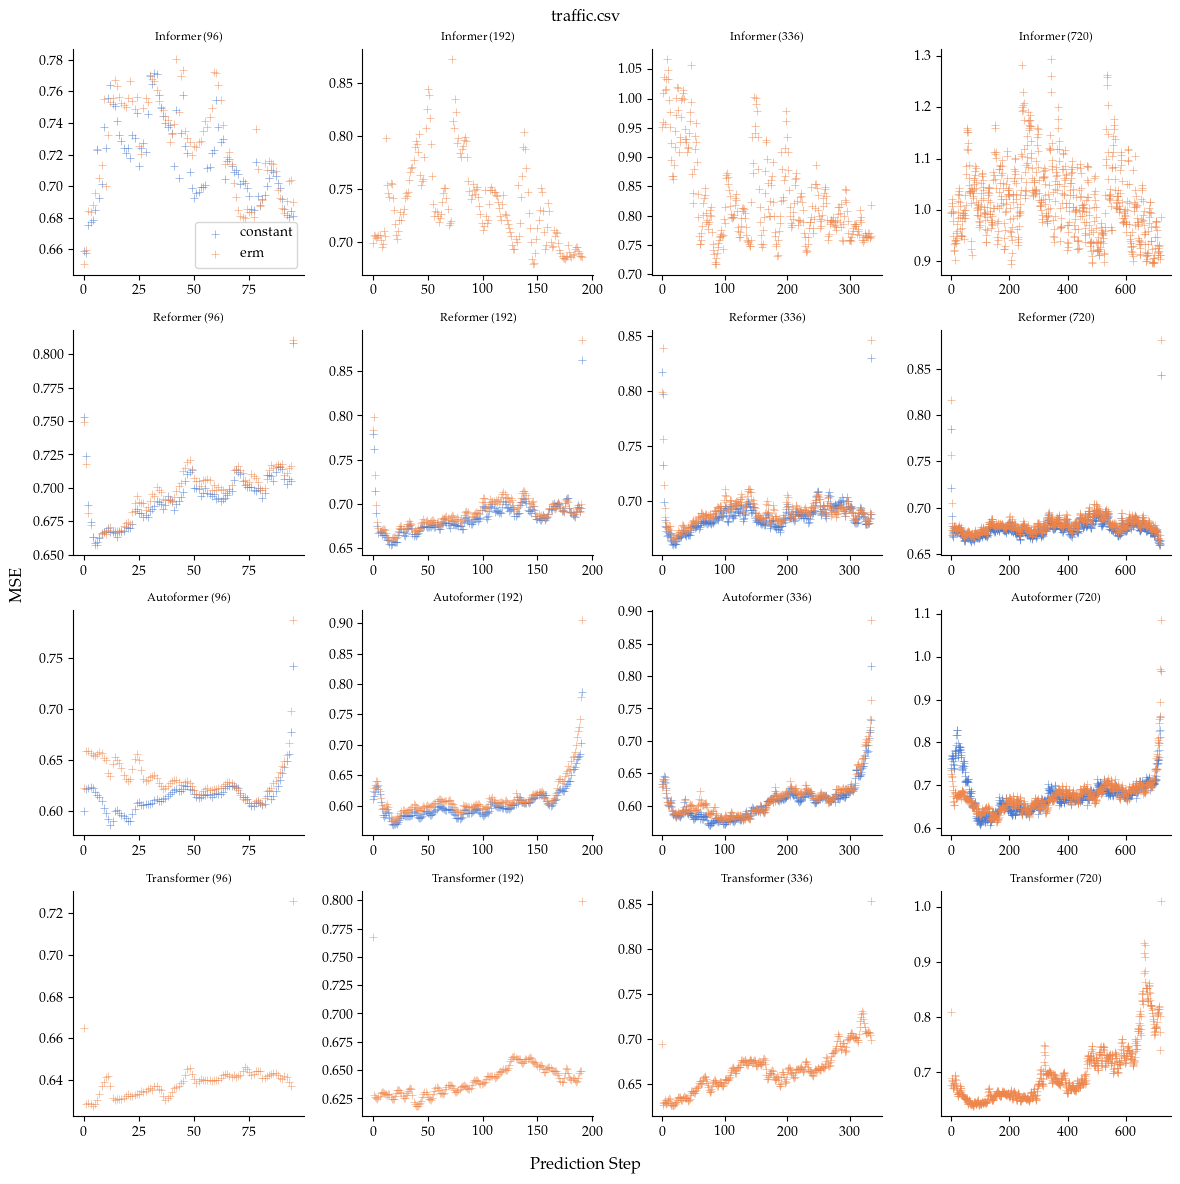

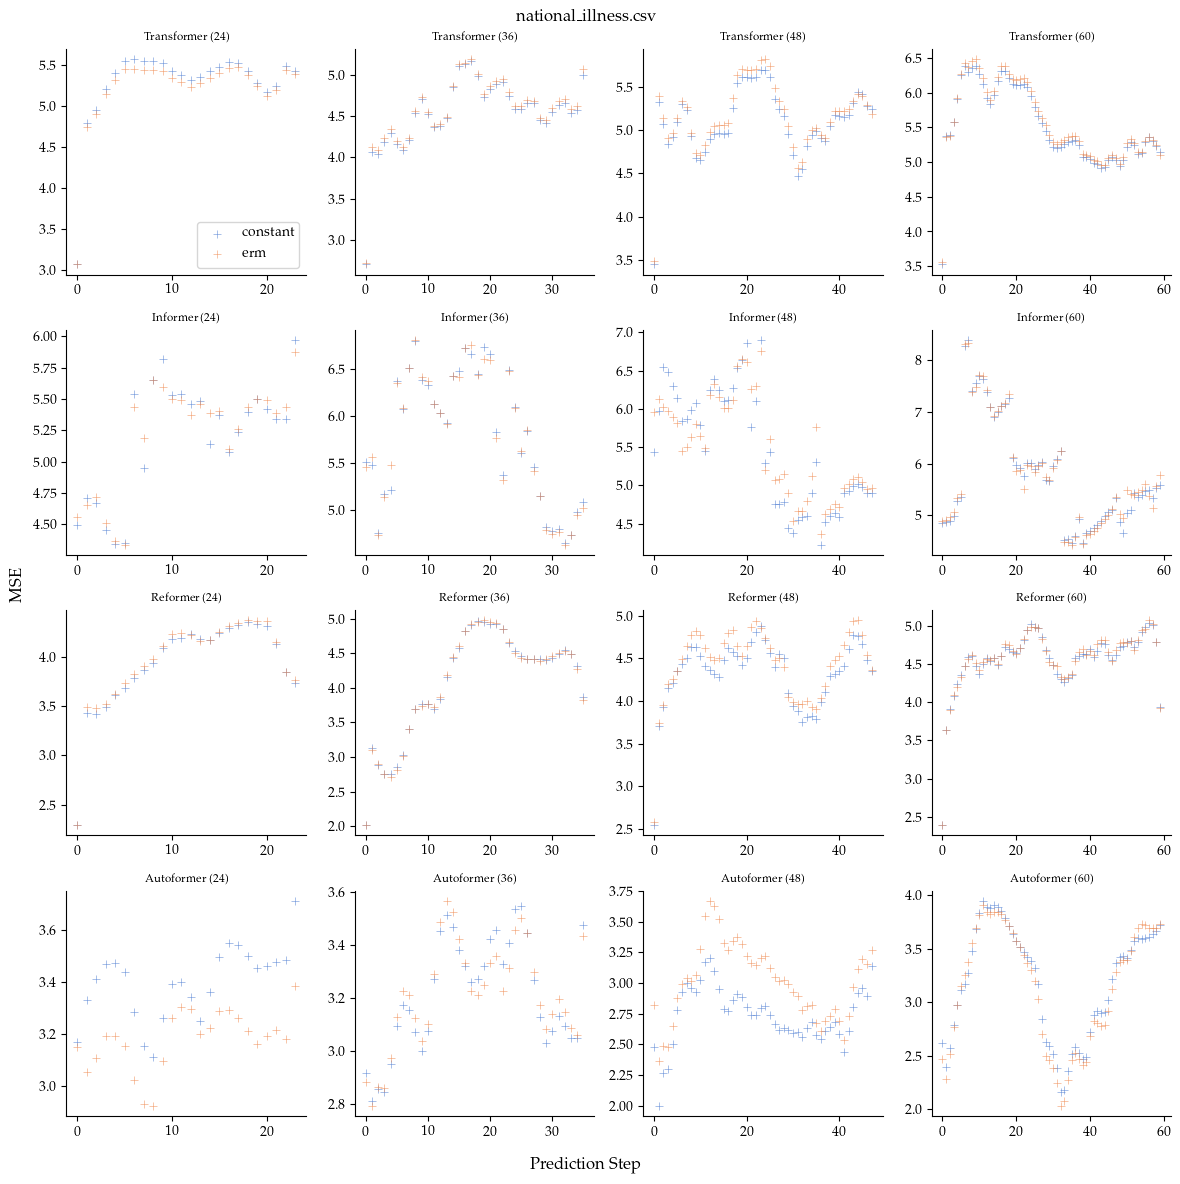

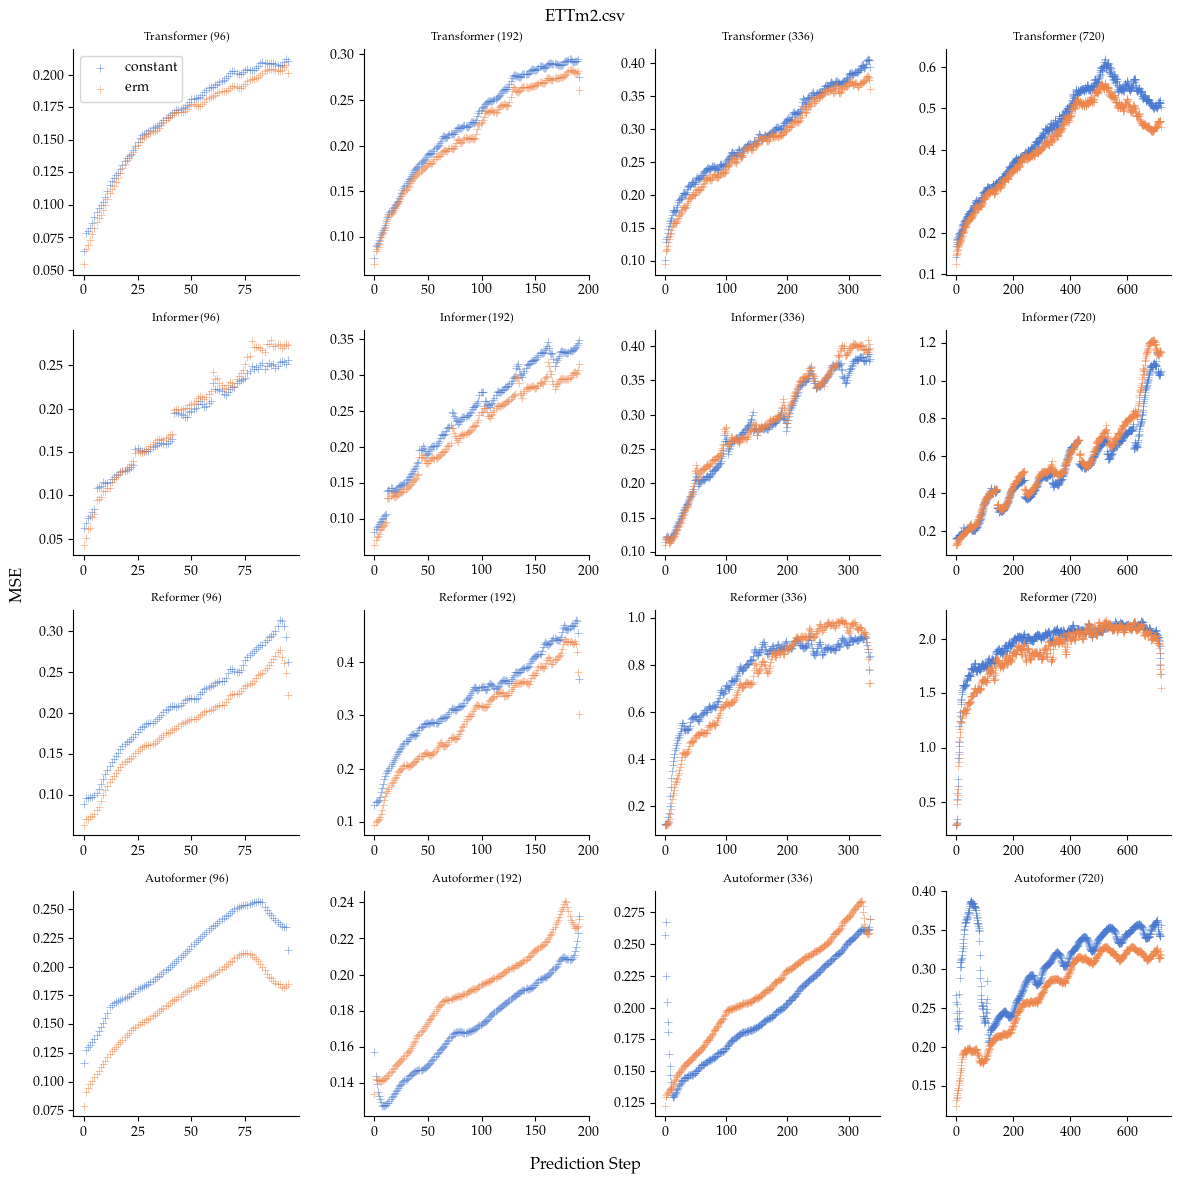

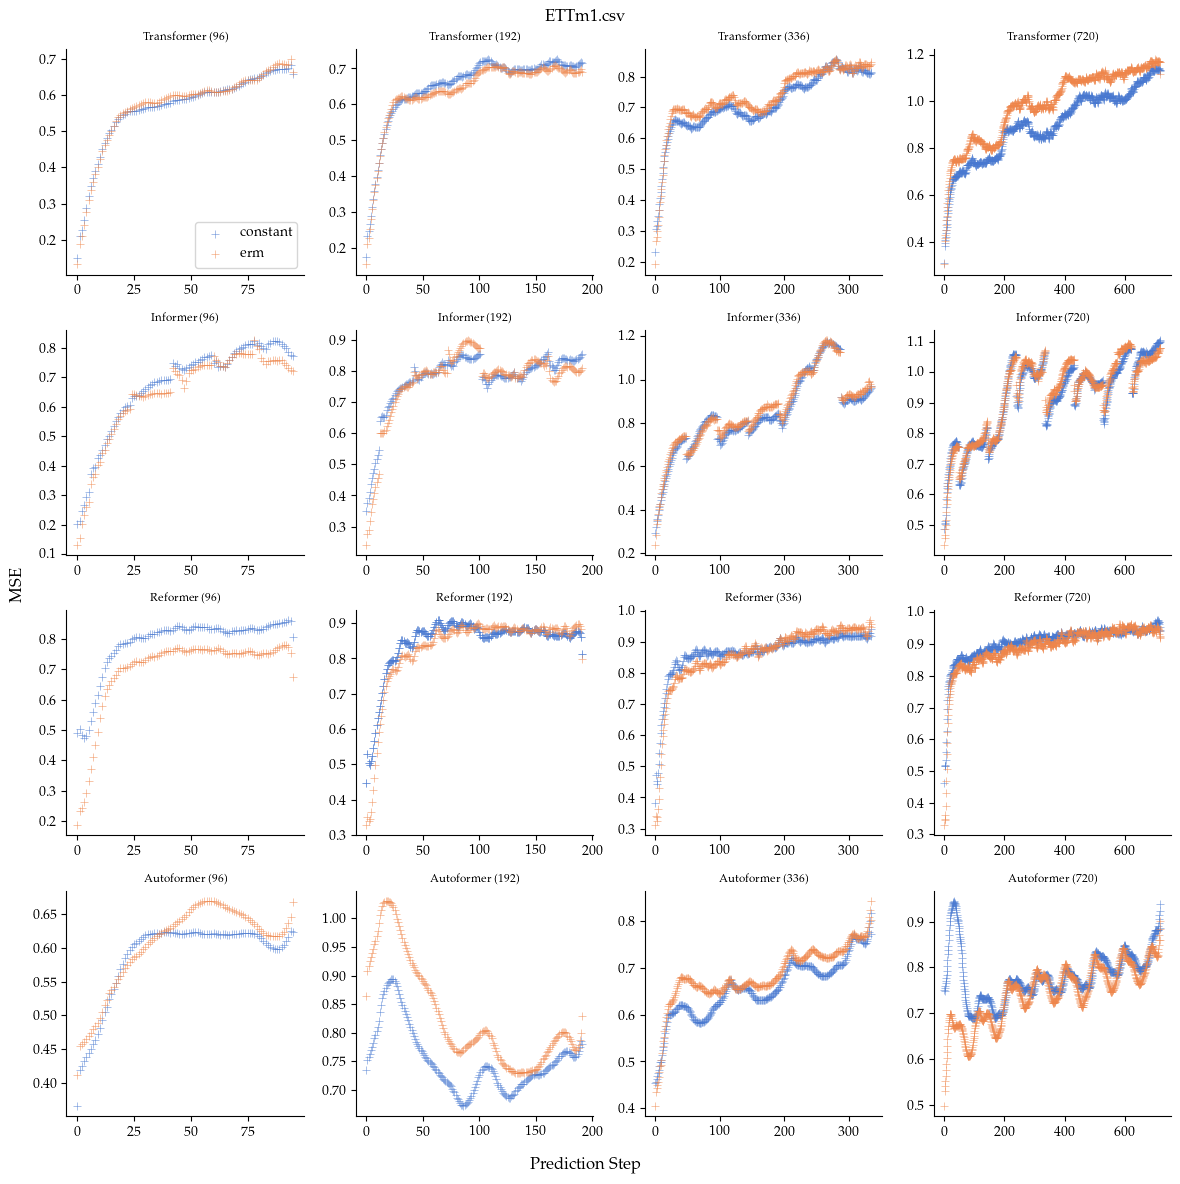

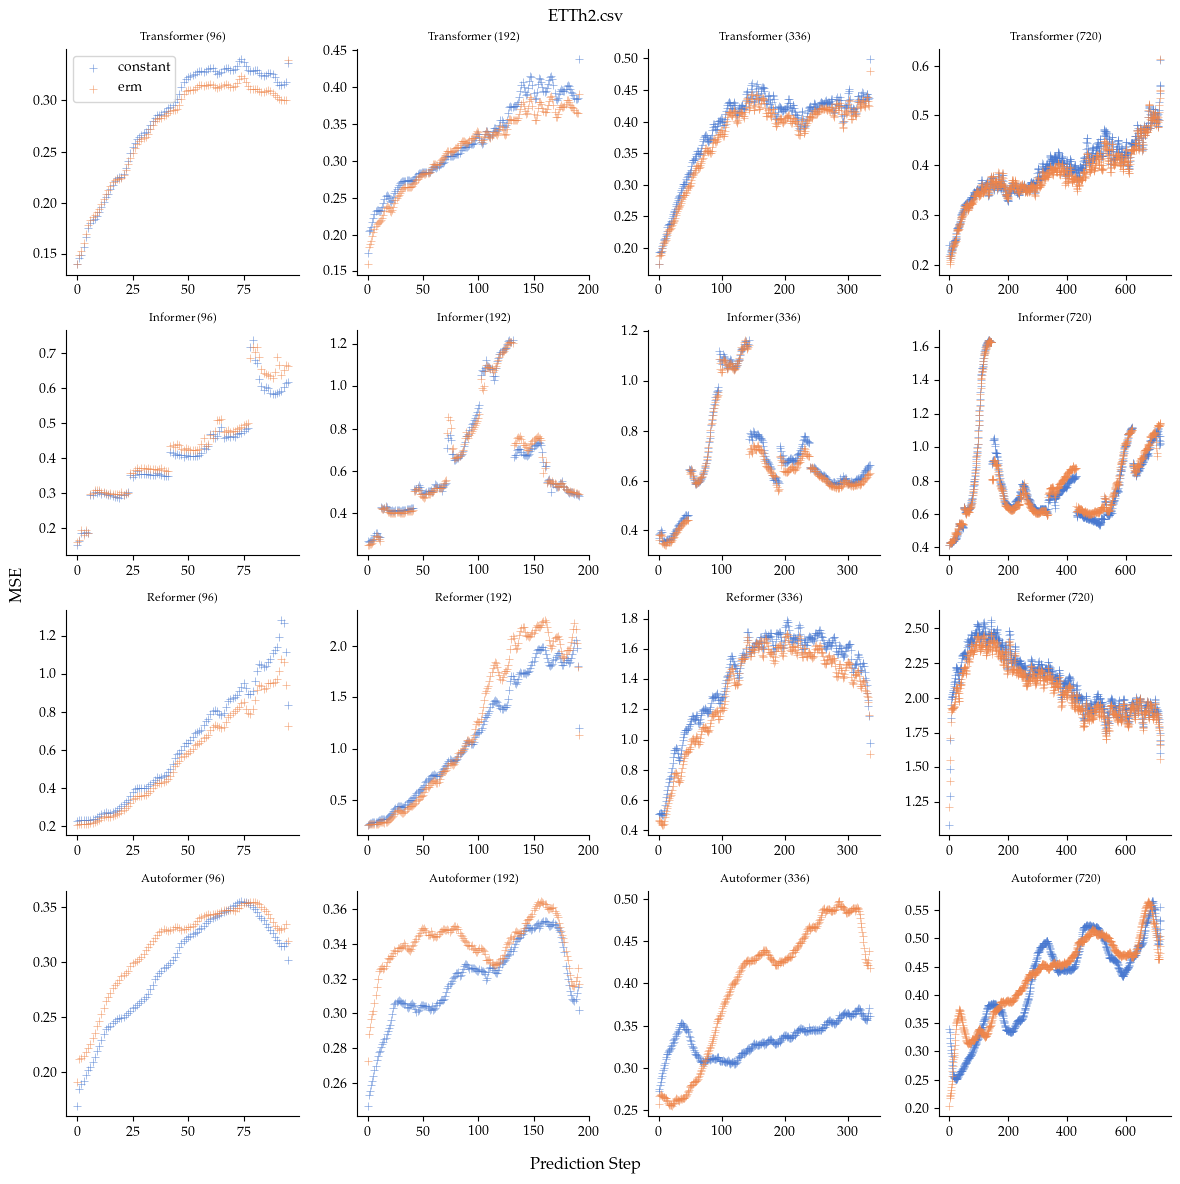

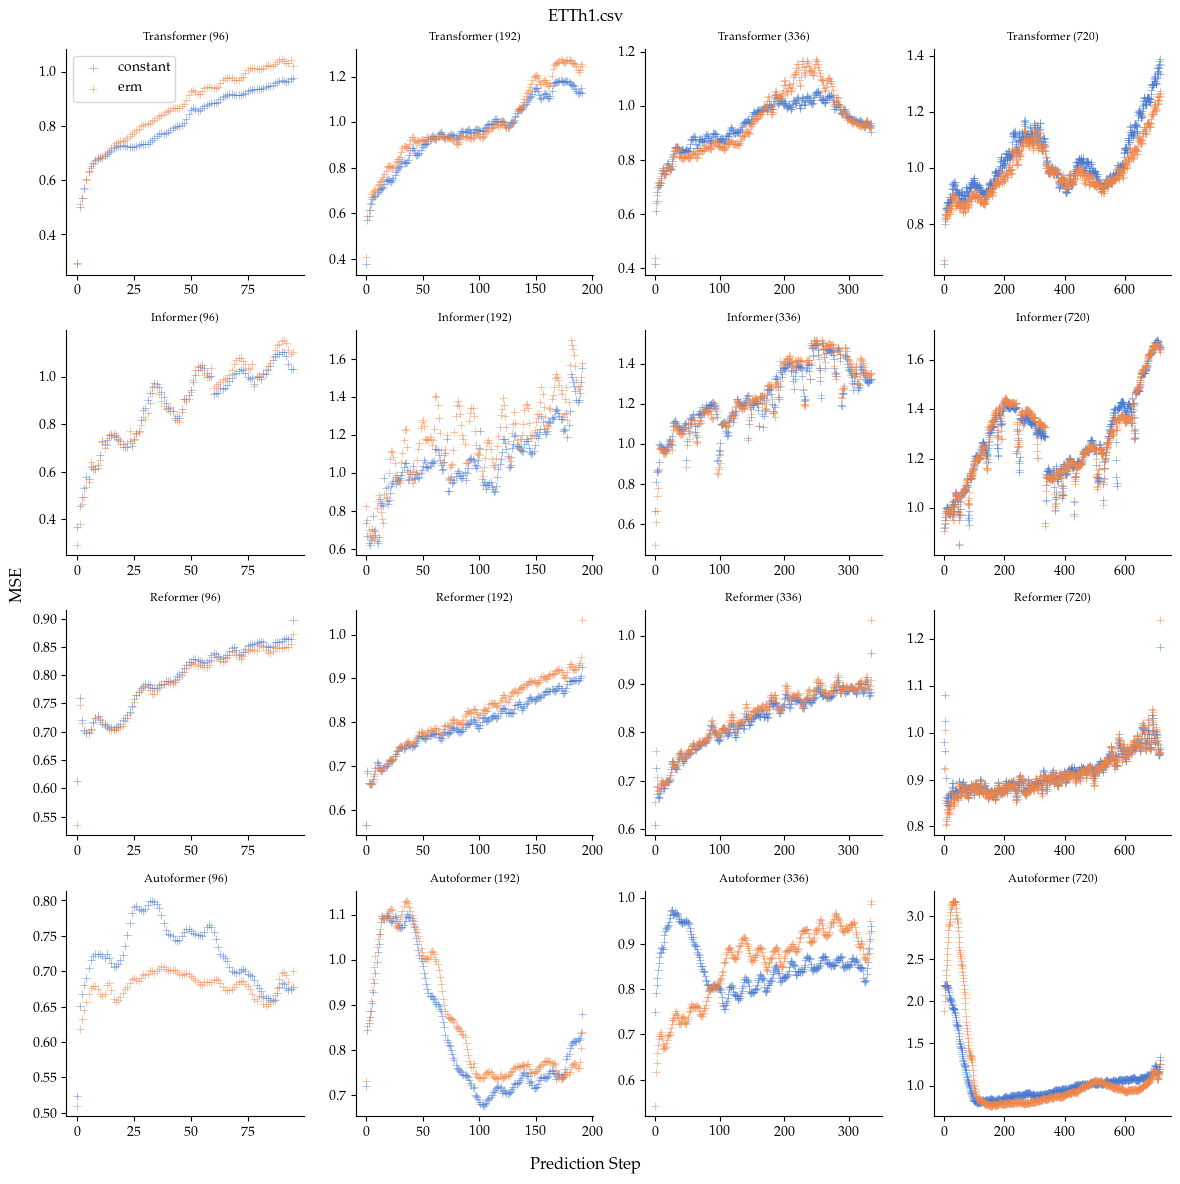

In [39]:
# PARAMS
split="test"
#constraint_idx = 1 # use the 50 percentile constraint to plot 1=25,2=50,3=75
#seed=2021

sns.set_palette("muted")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
mpl.rcParams['lines.linewidth'] = 1.8

# Filter
df_pct50_and_erm = df_to_plot[(df_to_plot.split==split) & (df_to_plot.constraint_type!='constant_resilience')].copy()

PRED_LENS=sorted(df_to_plot.pred_len.unique().tolist())
#PRED_LENS=[720]
#PRED_LENS=[96]

def pretty_name_dataset(data_path):
    if data_path=="electricity.csv": 
        return "Electricity"
    if data_path=="weather.csv":
        return "Weather"
    if data_path=="exchange_rate.csv":
        return "Exchange Rate"
    else:
        return data_path

def sample_every_n(df,groupcols=['data_path','model','pred_len','split'],n=2):
    """
    Returns DF but only every nth row with respect to step within each group.
    """
    df_sampled = df.groupby(groupcols).apply(lambda x: x[(x.step//48)%n==0]).reset_index(drop=True)
    return df_sampled
    

#for pred_len in PRED_LENS:
for data_path in df_pct50_and_erm.data_path.unique():
    # Add data for constant line
    #df_current_plot = df_pct50_and_erm.query('pred_len==@pred_len').copy()
    df_current_plot = df_pct50_and_erm.query('data_path==@data_path').copy()
    
    #df_current_plot['constraint_type'].replace({'erm':'ERM','constant':'Constrained'},inplace=True)
    #constraint_level = df_current_plot.constraint_level.unique()[0]
    #df_current_plot['constraint_level'] = constraint_level
    #display(Markdown(f"#### **ERM Vs Constrained {pred_len} (split={split})**"))

    g = sns.FacetGrid(
                    #sample_every_n(df_current_plot),
                    df_current_plot,
                    #df_current_plot,
                    row='model', 
                    col='pred_len', 
                    hue='constraint_type', 
                    height=3, 
                    aspect=1.0, 
                    legend_out=False,
                    #legend='full',
                    sharex=False,
                    sharey=False,
                    )
    #g.set_titles(row_template="", col_template="")
    
    #g.map(sns.lineplot, "step", "constraint_level", alpha=.7)
    g.map(sns.scatterplot, "step", "mse", marker='+',alpha=0.7,legend='full',edgecolor=None)
    g.add_legend()
    
    g.set_xlabels("")
    g.set_ylabels("")
    g.set_titles(template="{row_name} ({col_name})")
    g.fig.supxlabel("Prediction Step")
    g.fig.supylabel("MSE")
    g.fig.suptitle(f'{pretty_name_dataset(data_path)}')
    for ax in g.axes.flat:
        ax.set_title(ax.get_title(), fontsize='small')
        ax.set_xlabel(ax.get_xlabel(), fontsize='large')
        ax.set_ylabel(ax.get_ylabel(), fontsize='large')

    # make markers bigger
    for ax in g.axes.flat:
        for p in ax.patches:
            p.set( markersize=20)
    # disable legend
    #g._legend.remove()
    g._legend.set_title("")
    # legend fontsizesmall
    #g._legend.texts
    #g._legend.set_frame_on(False)
    # tight layout
    g.fig.tight_layout()
    
    #TODO fix and uncomment
    #name_without_extension = data_path.split(".")[0]
    #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_all_{name_without_extension}.pdf")
    #plt.show()

### Train vs test

In [40]:
# PARAMS
#split="test"
#constraint_idx = 1 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_pct50_and_erm = df_to_plot[(df_to_plot.seed==seed) & (df_to_plot.split.isin(['train','test'])) & (df_to_plot.constraint_type.isin(['erm','constant']))].copy()

PRED_LENS=sorted(df_to_plot.pred_len.unique().tolist())
#PRED_LENS=[720]
#PRED_LENS=[96]
#for model in df_to_plot.model.unique():
for data_path in df_to_plot.data_path.unique():
    for pred_len in PRED_LENS:
        # Add data for constant line
        df_current_plot = df_pct50_and_erm.query('pred_len==@pred_len and data_path==@data_path').copy()
        mses=df_current_plot.groupby(['model','split','constraint_type'])['mse'].mean().reset_index()
        # plot only if train constant is lower than train erm and test constant is higher than test erm
        # if mses.query('split=="train"').query('constraint_type=="constant"').mse.values[0] < mses.query('split=="train"').query('constraint_type=="erm"').mse.values[0] and \
        #     mses.query('split=="test"').query('constraint_type=="constant"').mse.values[0] > mses.query('split=="test"').query('constraint_type=="erm"').mse.values[0]:
        display(Markdown(f"#### **ERM Vs Constrained {data_path}--{pred_len}**"))
    
        #constraint_level = df_current_plot.constraint_level.unique()[0]
        #df_current_plot['constraint_level'] = constraint_level
        display(Markdown(f"#### **ERM Vs Constrained {data_path}--{pred_len}**"))

        g = sns.FacetGrid(df_current_plot, col='model', row='split', hue='constraint_type', height=3, aspect=1.5, legend_out=True,sharex=False,sharey=False)
        #g.map(sns.lineplot, "step", "constraint_level", alpha=.7)
        g.map(sns.scatterplot, "step", "mse", alpha=.7)
        g.map(sns.lineplot, "step", "constraint_level", alpha=.7)
        g.add_legend()
        #TODO fix and uncomment
        #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{pred_len}_{str(constraint_level).replace('.','')}.png")
        plt.show()

#### **ERM Vs Constrained traffic.csv--24**

#### **ERM Vs Constrained traffic.csv--24**

ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

#### Train vs test select example!!!

(424, 111)
success


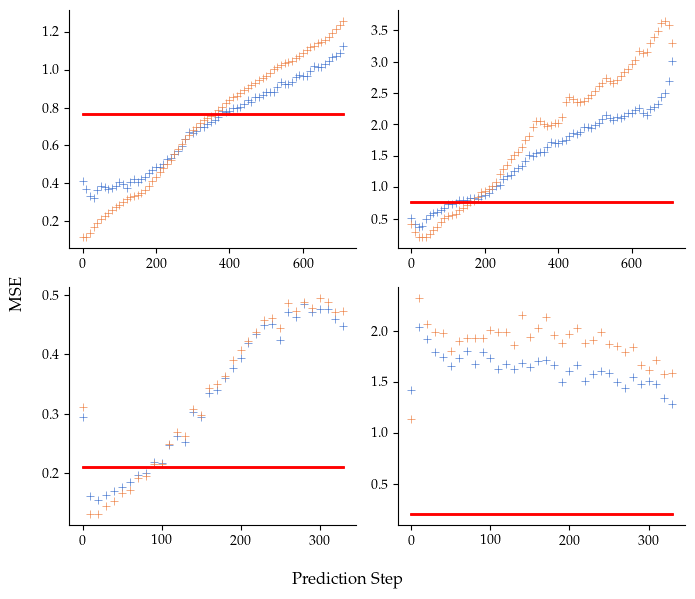

(2112, 111)
failures


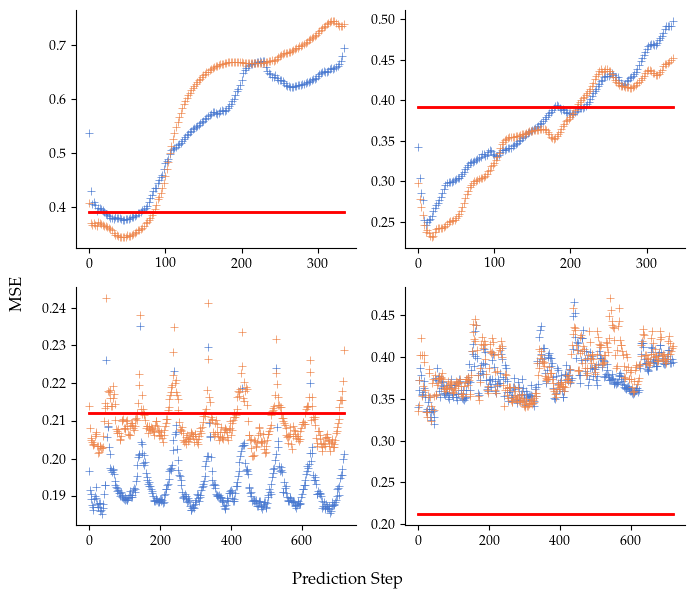

In [ ]:
import matplotlib as mpl
# Get the two success cases and two failures cases in separate dfs
# constant and erm
#**ECL192 transformer**
#**Weather 192 REformer
#Drop this one in favor of a more textbook one
#success1 = df_to_plot.query('data_path=="electricity.csv" and pred_len==192 and split!="val" and model=="Transformer" and (constraint_type=="constant" or constraint_type=="erm")').copy()
success1 = df_to_plot.query('data_path=="exchange_rate.csv" and pred_len==720 and split!="val" and model=="Autoformer" and (constraint_type=="constant" or constraint_type=="erm")').copy()
success2 = df_to_plot.query('data_path=="exchange_rate.csv" and pred_len==336 and split!="val" and model=="Reformer" and (constraint_type=="constant" or constraint_type=="erm")').copy()
#**Weather 332 Autoformer**
#**Electricity 720 Informer**
failure1 = df_to_plot.query('data_path=="weather.csv" and pred_len==336 and split!="val" and model=="Autoformer" and (constraint_type=="constant" or constraint_type=="erm")').copy()
failure2 = df_to_plot.query('data_path=="electricity.csv" and pred_len==720 and split!="val" and model=="Informer" and (constraint_type=="constant" or constraint_type=="erm")').copy()


sns.set_palette("muted")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
mpl.rcParams['lines.linewidth'] = 1.8

# add only one x axis label
g.set_xlabels("")
g.set_ylabels("")
# set axis label at the figure level
# add the hline
# for ax in g.axes:
#     ax.axhline(y=constraint_level, color='r', linestyle='-')
g.fig.supxlabel("Prediction Step")
g.fig.supylabel("MSE")


#TODO
g.set_titles(col_template="{col_name}")


# evens = df_set1["step"]%10
# df_set1 = df_set1[evens==0]
# evens = df_set2["step"]%2
# df_set2 = df_set2[evens==0]

    
# Plot all cases
success = pd.concat([success1,success2])
failures = pd.concat([failure1,failure2])
for plot_data,figname in [
    # (success1,"success_electricity_transformer_192"),
    # (success2,"success_weather_reformer_192"),
    # (failure1,"failure_weather_autoformer_332"),
    # (failure2,"failure_electricity_informer_720")
    (success,"success"),
    (failures,"failures")
    ]:
    # print(failure1.shape)
    # print(failure2.shape)
    if plot_data.pred_len.iloc[0]>500:
        evens = plot_data["step"]%10
        plot_data = plot_data[evens==0]
    # elif plot_data.pred_len.iloc[0]==336:
    #     evens = plot_data["step"]%4
    #     plot_data = plot_data[evens==0]
    else: 
        evens = plot_data["step"]%2
        plot_data = plot_data[evens==0]
    print(plot_data.shape)
    print(figname)
    g = sns.FacetGrid(plot_data, row="model",col='split', hue='constraint_type', height=3, aspect=1.0, legend_out=True,sharex=False,sharey=False)
    g.map(sns.scatterplot, "step", "mse", legend='full', marker='+')
    g.map(sns.lineplot, "step", "constraint_level", legend='full',color='red')
    
    g.add_legend()
    
    g.set_xlabels("")
    g.set_ylabels("")
    g.set_titles(col_template="{col_name}")
    g.fig.supxlabel("Prediction Step")
    g.fig.supylabel("MSE")
    for ax in g.axes.flat:
        ax.set_title("", fontsize='large')
        ax.set_xlabel(ax.get_xlabel(), fontsize='large')
        ax.set_ylabel(ax.get_ylabel(), fontsize='large')

    # make markers bigger
    for ax in g.axes.flat:
        for p in ax.patches:
            p.set( markersize=20)
    # disable legend
    g._legend.remove()
    # tight layout
    g.fig.tight_layout()
    #g.savefig(f"../figures/icml/{figname}.pdf")
    plt.show()

# g = sns.FacetGrid(df_current_plot, col='model', row='split', hue='constraint_type', height=3, aspect=1.5, legend_out=True,sharex=False,sharey=False)
# #g.map(sns.lineplot, "step", "constraint_level", alpha=.7)
# g.map(sns.scatterplot, "step", "mse", alpha=.7)
# g.add_legend()
# #TODO fix and uncomment
# #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{pred_len}_{str(constraint_level).replace('.','')}.png")
# plt.show()

### Multipliers over the window

#### **Multipliers vs loss 96 (split=train, constraint_idx=2)**

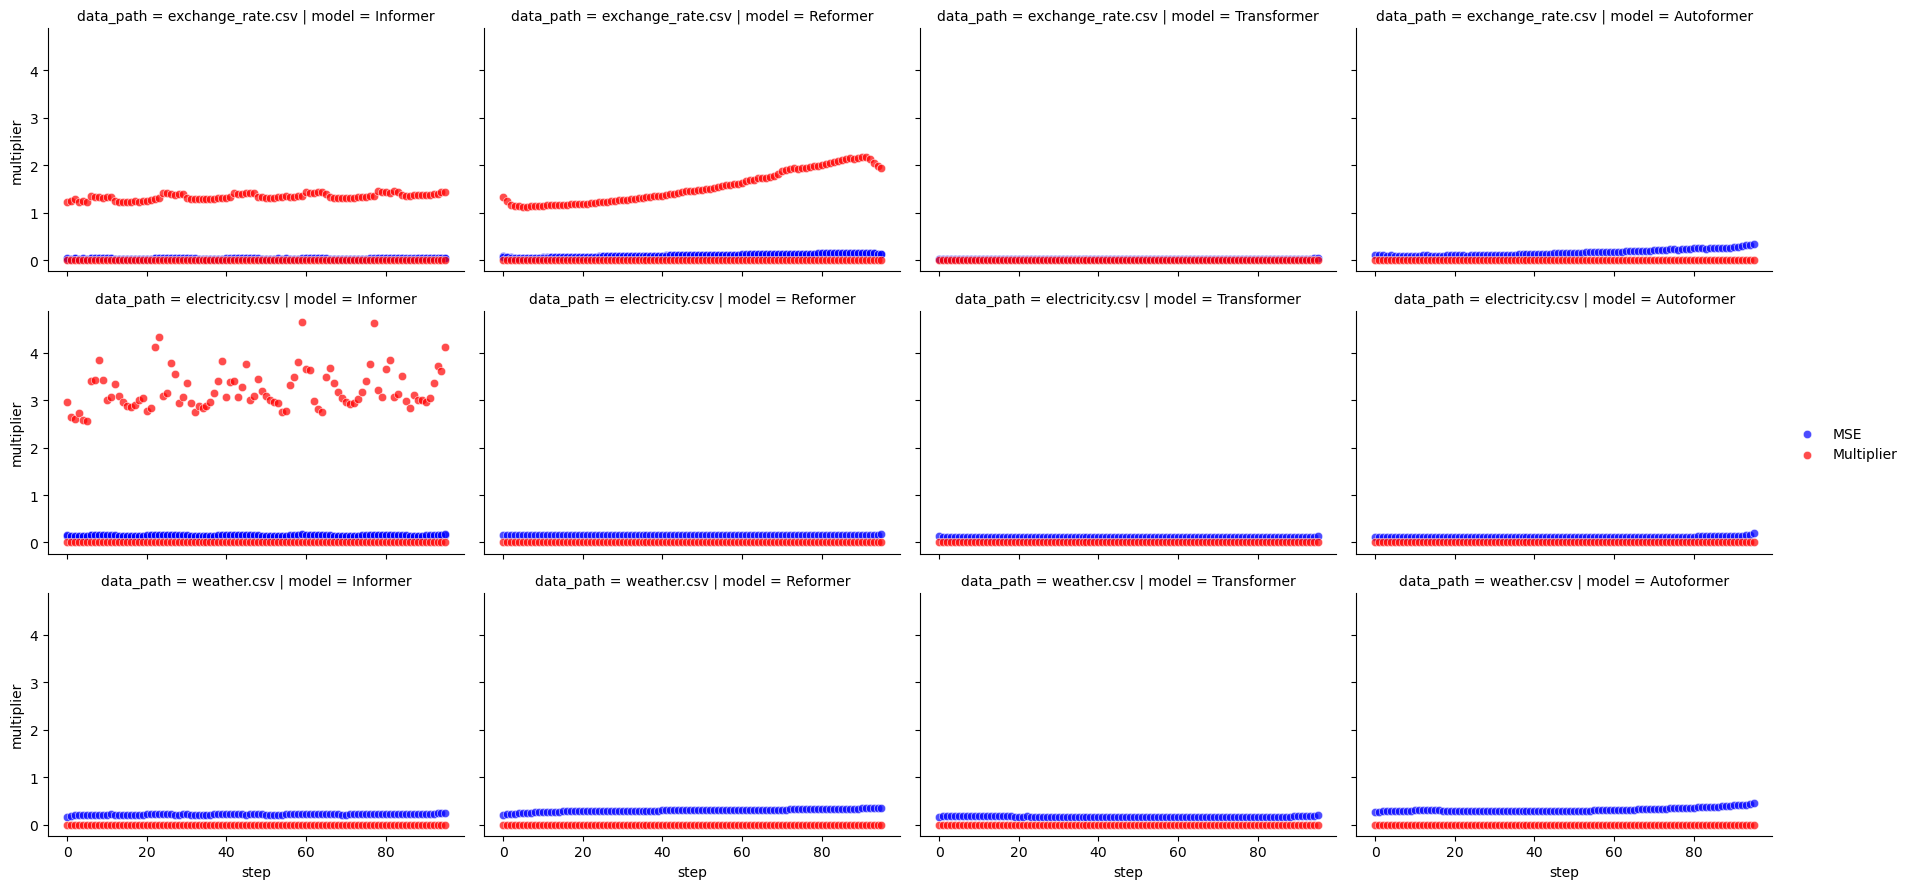

#### **Multipliers vs loss 192 (split=train, constraint_idx=2)**

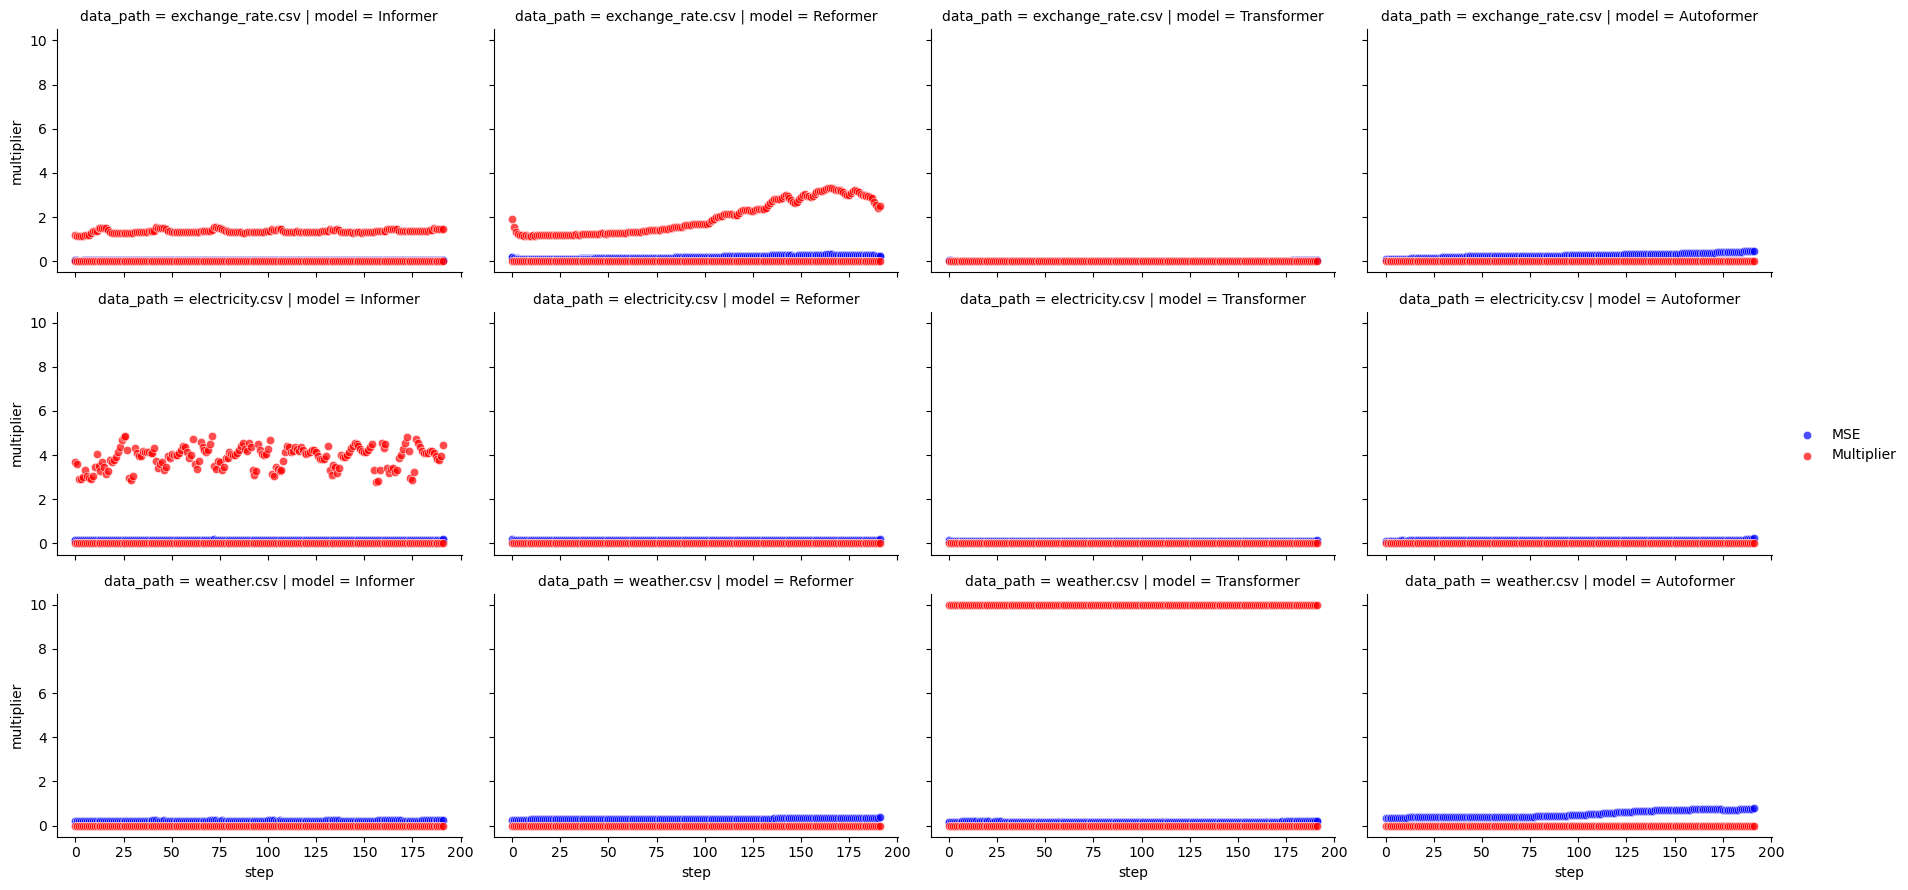

#### **Multipliers vs loss 336 (split=train, constraint_idx=2)**

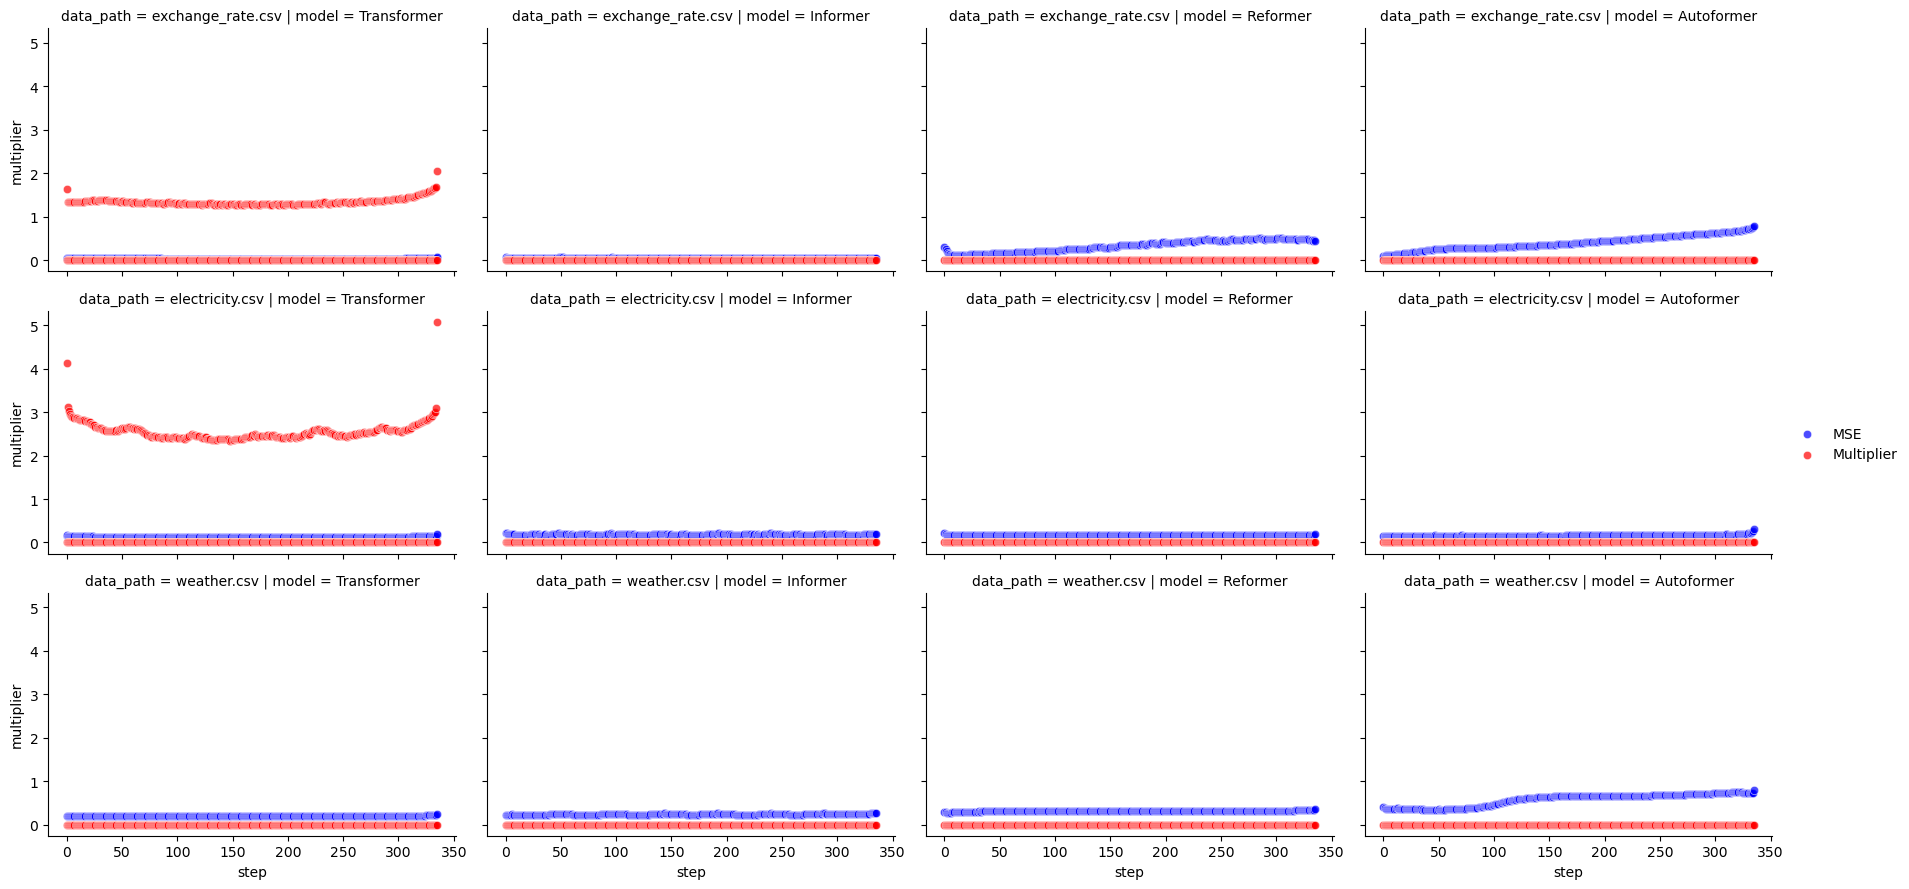

#### **Multipliers vs loss 720 (split=train, constraint_idx=2)**

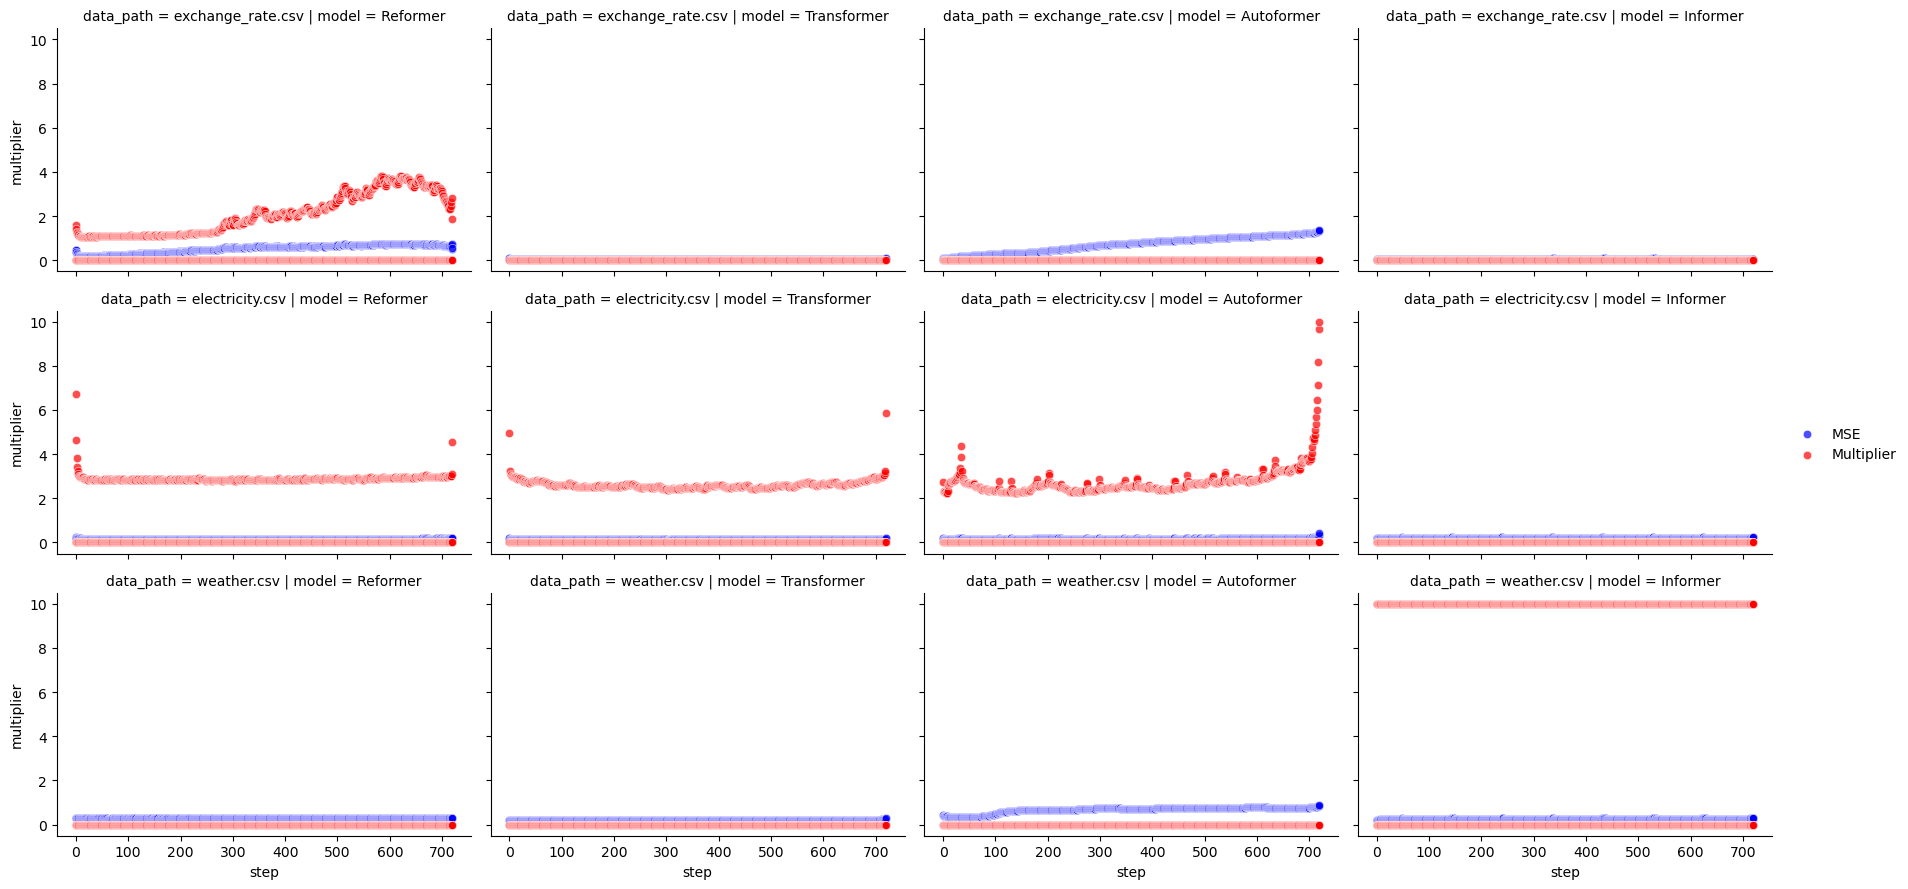

In [ ]:
# PARAMS
split="train"
constraint_idx = 2 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_pct50 = df_to_plot[
    (df_to_plot.constraint_idx.isin([0,constraint_idx])) 
    & (df_to_plot.seed==seed) & (df_to_plot.split==split)
    & (df_to_plot.constraint_type=="constant")
    ].copy()

PRED_LENS=sorted(df_to_plot.pred_len.unique().tolist())
#PRED_LENS=[96]
for pred_len in PRED_LENS:
    # Add data for constant line
    df_current_plot = df_pct50.query('pred_len==@pred_len').copy()
    #constraint_level = df_current_plot.constraint_level.unique()[0]
    #df_current_plot['constraint_level'] = constraint_level
    display(Markdown(f"#### **Multipliers vs loss {pred_len} (split={split}, constraint_idx={constraint_idx})**"))

    g = sns.FacetGrid(df_current_plot, col='model', row='data_path', height=3, aspect=1.5, legend_out=True)
    # Plot multipliers and MSEs
    g.map(sns.scatterplot, "step", "mse", alpha=.7,color='blue',label='MSE')
    g.map(sns.scatterplot, "step", "multiplier", alpha=.7,color='red',label='Multiplier')
    # Add legend the series

    g.add_legend()
    #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{pred_len}_{str(constraint_level).replace('.','')}.png")
    plt.show()

### Does shape prevail when extending window length

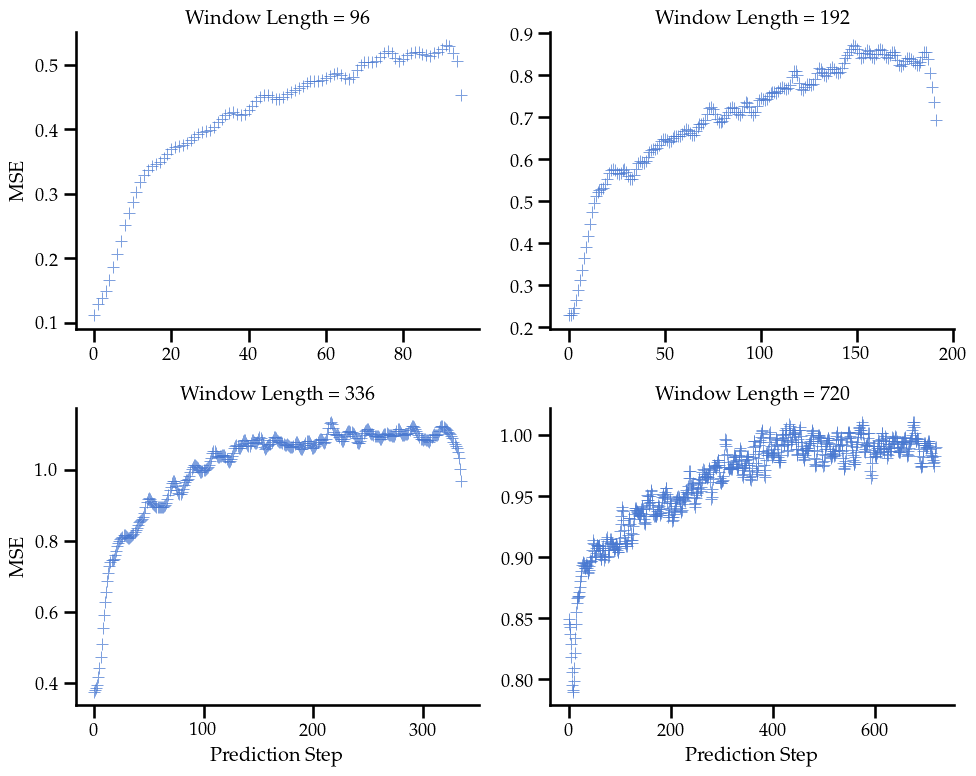

In [197]:
model="Reformer"
data_path="weather.csv"
pred_len=720
split='test'

#seaborn params
plt.rcParams['lines.linewidth'] = 1.8
sns.set_context("talk", font_scale=0.8)
backup = plt.rcParams
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
#sns.set_palette(sns.cubehelix_palette())
#sns.set_palette("tab10")
sns.set_palette("muted")
#sns.set_palette("Greys")

# Filter data
#to_plot = df_to_plot.query('model==@model & data_path==@data_path & split==@split & constraint_type=="erm"').copy()
# for model in df_to_plot.model.unique():
#     for data_path in df_to_plot.data_path.unique():
#         #for pred_len in df_to_plot.pred_len.unique():
#         to_plot = df_to_plot.query('model==@model & data_path==@data_path & split==@split & constraint_type=="erm"').copy()
#         #to_plot.loc[to_plot.constraint_level==-1.0,'constraint_level'] = to_plot.constraint_level.max()

#         to_plot.rename(columns={'mse':'MSE','step': "Prediction Step","pred_len":"Window Length"},inplace=True)
#         #display(to_plot.constraint_level)
#         # g = sns.scatterplot(data=to_plot,
#         #                     x="Prediction Step",
#         #                     y= "MSE",
#         #                     alpha=.7,hue='constraint_type',style='constraint_type',
#         #                     #palette={'ERM':'blue','Constrained':'red'},
#         #                     legend='full'
#         #                     )
#         display(Markdown(f"# {model} on {data_path} (pred_len={pred_len}, split={split})"))
#         g=sns.FacetGrid(to_plot, col="Window Length", col_wrap=2, height=4, aspect=1.5,sharex=False,sharey=False).map(sns.scatterplot, "Prediction Step", "MSE", alpha=.7)
#         g.map(sns.scatterplot, "Prediction Step", "MSE", alpha=.7)
#         #g.set_title(f"{model} on {data_path} (pred_len={pred_len}, split={split})")
#         plt.figure(figsize=(3.5, 2.6))
#         plt.show()
to_plot = df_to_plot.query('model==@model & data_path==@data_path & split==@split & type=="ERM"').copy()
#display(to_plot.run_id.nunique())
#to_plot.loc[to_plot.constraint_level==-1.0,'constraint_level'] = to_plot.constraint_level.max()

# to_plot.rename(columns={'mse':'MSE','step': "Prediction Step","pred_len":"Window Length"},inplace=True)
#display(to_plot.constraint_level)
# g = sns.scatterplot(data=to_plot,
#                     x="Prediction Step",
#                     y= "MSE",
#                     alpha=.9,hue='Window Length',style='Window Length',
#                     #palette={'ERM':'blue','Constrained':'red'},
#                     legend='full'
#                     )
#g.set_title(f"{model} on {data_path} (pred_len={pred_len}, split={split})")
#g.set_title("")
#plt.figure(figsize=(3.5, 2.6))  # Width, height in inches (standard on papers according to chatGPT)

#plt.savefig(f'../figures/icml/shape_across_lengths_{model}_{data_path[:4]}.pdf', bbox_inches='tight')  # For a PGF file

# Another option
to_plot.rename(columns={'mse':'MSE','step': "Prediction Step","pred_len":"Window Length"},inplace=True)
g=sns.FacetGrid(to_plot, 
                col="Window Length", 
                col_wrap=2, 
                height=4, 
                aspect=1.25,
                sharex=False,
                sharey=False
                )
g.map(sns.scatterplot, "Prediction Step", "MSE", alpha=.7,marker='+')
plt.savefig(f'../figures/icml/shape_across_lengths_{model}_{data_path[:4]}.pdf', bbox_inches='tight')
# g = sns.scatterplot(data=to_plot,
#                     x="Prediction Step",
#                     y= "MSE", 
#                     alpha=.7,hue='Window Length',style='Window Length',
#                     #palette={'ERM':'blue','Constrained':'red'},
#                     legend='full')

plt.rcParams.update(backup)
#g2 = sns.lineplot(data=to_plot.query("constraint_type=='constant'"),x="Prediction Step",y= "constraint_level", alpha=.7,color='green',label='Constraint Level')

### Is train correlated with test?

<AxesSubplot:xlabel='mse_train', ylabel='mse_test'>

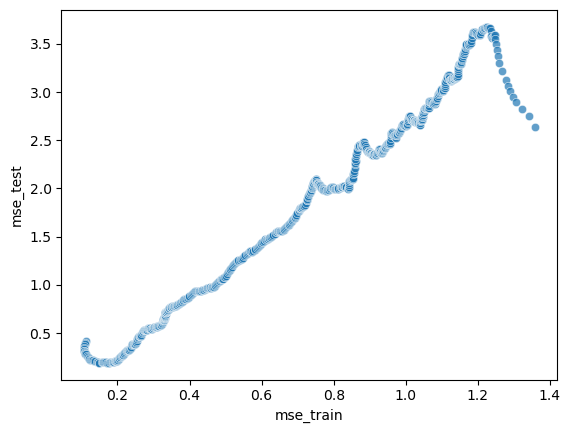

In [ ]:
model="Autoformer"
data_path="exchange_rate.csv"
pred_len=720

dd=df_to_plot.query('model==@model & data_path==@data_path & type=="ERM" & pred_len==@pred_len')
# Create a dataset of mse train and mse test for each step with dd using melt
dd_train = dd.query('split=="train"').copy()
dd_test = dd.query('split=="test"').copy()

dd_plot=dd_train.merge(dd_test,on="step",suffixes=('_train','_test'))[['step','mse_train','mse_test']]
#dd2['diff'] = dd2.test-dd2.train

sns.scatterplot(dd_plot, x="mse_train", y="mse_test", alpha=.7,)

### PAPER: Singular ERM vs Constrained 
Of ERM vs constrained

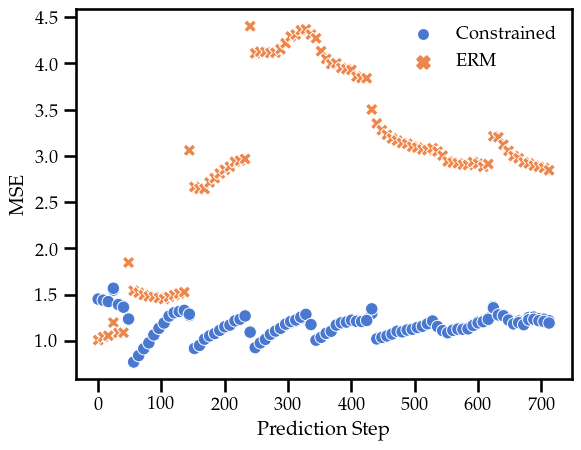

In [ ]:
# #Option 1
# model="Autoformer"
# data_path="exchange_rate.csv"
# pred_len=336
# split='test'

# # Option 2
# model="Transformer"
# data_path="exchange_rate.csv"
# pred_len=720
# split='test'

# # Option 3
model="Informer"
data_path="exchange_rate.csv"
pred_len=720
split='test'

# # Option 4
# model="Autoformer"
# data_path="weather.csv"
# pred_len=96
# split='test'

#seaborn params
plt.rcParams['lines.linewidth'] = 1.8
#sns.set_context("talk", font_scale=0.8)
backup = plt.rcParams
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

#sns.set_palette(sns.cubehelix_palette())
#sns.set_palette("tab10")
sns.set_palette("muted")
#sns.set_palette("Greys")

# Filter data
to_plot = df_to_plot.query('model==@model & data_path==@data_path & pred_len==@pred_len & split==@split').copy()
to_plot.loc[to_plot.constraint_level==-1.0,'constraint_level'] = to_plot.constraint_level.max()

#Sample every other datapoint
to_plot = to_plot[to_plot.step%8==0]

to_plot.rename(columns={'mse':'MSE','step': "Prediction Step"},inplace=True)
#display(to_plot.constraint_level)
g = sns.scatterplot(data=to_plot,
                    x="Prediction Step",
                    y= "MSE", 
                    hue='type',
                    style='type',
                    #marker='+',
                    #palette={'ERM':'blue','Constrained':'red'},
                    legend='full'
                    )
#g.set_title(f"{model} on {data_path} (pred_len={pred_len}, split={split})")
#plt.figure(figsize=(3.5, 2.6))  # Width, height in inches (standard on papers according to chatGPT)

# remove borders from legend
g.get_legend().get_frame().set_linewidth(0.0)
g.get_legend().set_title("")

# Set the size of the markers
g.legend_.legendHandles[0]._sizes = [40]

# make legend marker a + instead of a dot using handlers manually
#g.legend(handles=g.legend_.legendHandles, labels=["ERM", "Constrained"], title="Type", loc="upper left")



#g.set_xlabels("")
#g.set_ylabels("")
#g.set_titles(col_template="{col_name}")
#g.fig.supxlabel("Prediction Step")
#g.fig.supylabel("MSE")
# for ax in g.axes.flat:
#     ax.set_title("", fontsize='large')
#     ax.set_xlabel(ax.get_xlabel(), fontsize='large')
#     ax.set_ylabel(ax.get_ylabel(), fontsize='large')

# make markers bigger
# for ax in g.axes.flat:
#     for p in ax.patches:
#         p.set( markersize=20)
# disable legend
#g._legend.remove()
# tight layout
#g.tight_layout()
#g.savefig(f"../figures/icml/{figname}.pdf")


plt.savefig(f'../figures/icml/erm_vs_constrained_fp_{model}_{data_path[:4]}_{pred_len}.pdf', bbox_inches='tight')  # For a PGF file
#plt.show()
plt.rcParams.update(backup)
#g2 = sns.lineplot(data=to_plot.query("constraint_type=='constant'"),x="Prediction Step",y= "constraint_level", alpha=.7,color='green',label='Constraint Level')

### PAPER: ERM vs Constrained across models on two datasets

Saved to ../figures/icml/constrained_vs_erm_allmodels_exch_720.pdf
Saved to ../figures/icml/constrained_vs_erm_allmodels_weather_96.pdf


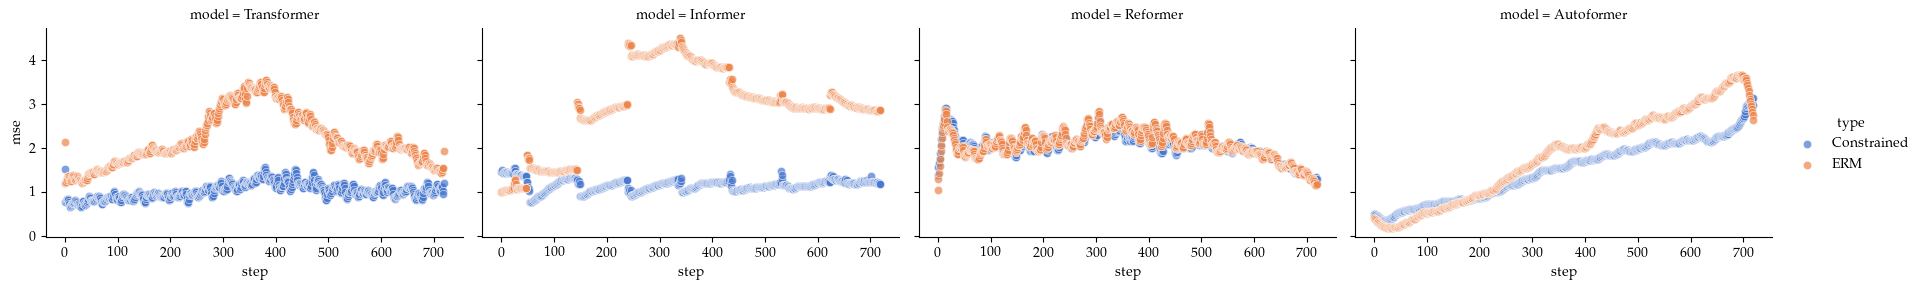

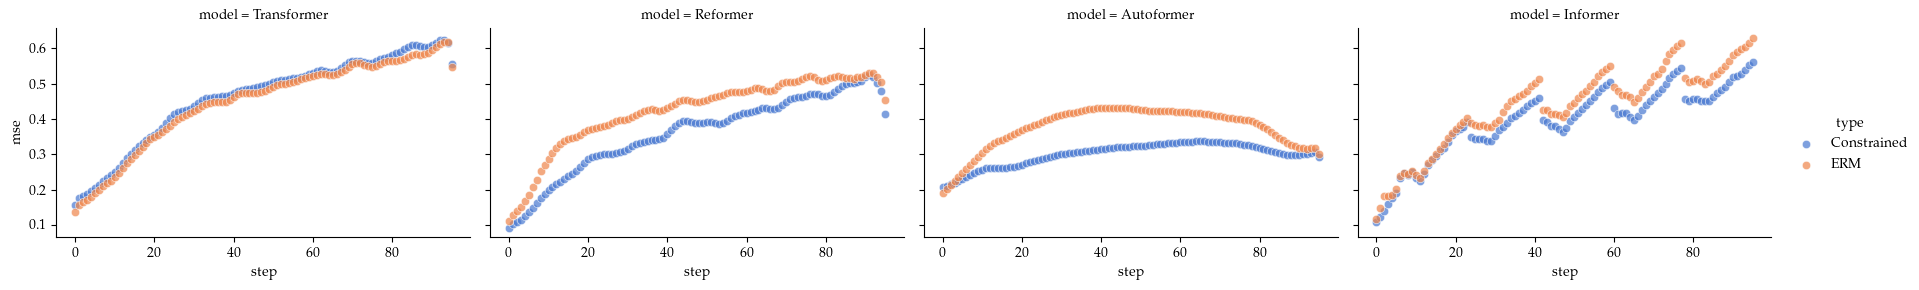

In [ ]:
df_set1 = df_to_plot.query('data_path=="exchange_rate.csv" and pred_len==720 and split=="test"').copy()
df_set2 = df_to_plot.query('data_path=="weather.csv" and pred_len==96 and split=="test"').copy()

#Params for latex
backup = plt.rcParams
sns.set_palette("muted")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
}
)

#plot 1
g=sns.FacetGrid(df_set1, col='model', hue='type', height=3, aspect=1.5, legend_out=True)
g.map(sns.scatterplot, "step", "mse", alpha=.7,legend='full')
g.add_legend()
#TODO fix and uncomment
figure1_dir = f"{FIGURES_FOLDER}/constrained_vs_erm_allmodels_exch_720.pdf"
print(f"Saved to {figure1_dir}")
g.savefig(figure1_dir)

#plot 2
g=sns.FacetGrid(df_set2, col='model', hue='type', height=3, aspect=1.5, legend_out=True)
g.map(sns.scatterplot, "step", "mse", alpha=.7)
g.add_legend()
#TODO fix and uncomment
figure1_dir = f"{FIGURES_FOLDER}/constrained_vs_erm_allmodels_weather_96.pdf"
print(f"Saved to {figure1_dir}")
g.savefig(figure1_dir)

#restoring parameters
plt.rcParams.update(backup)

### (old) ERM vs constrained

[3 2 1 0]


### Dataset: electricity.csv pred_len: 96 constraint_idx: 3

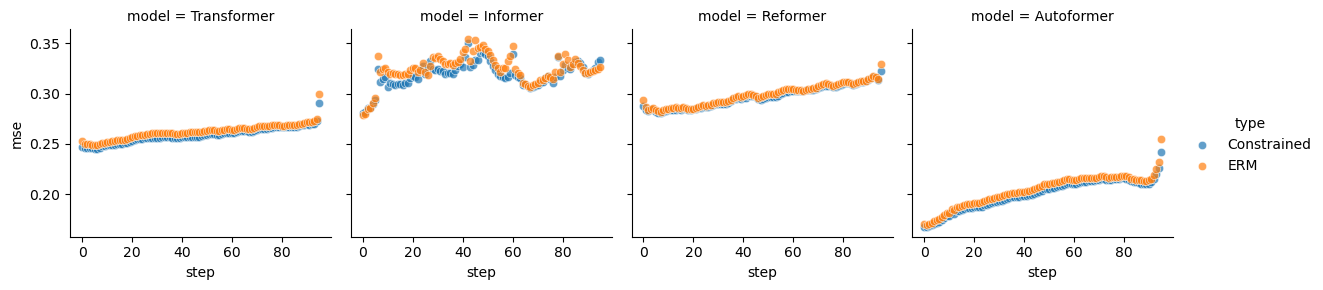

### Dataset: electricity.csv pred_len: 96 constraint_idx: 2

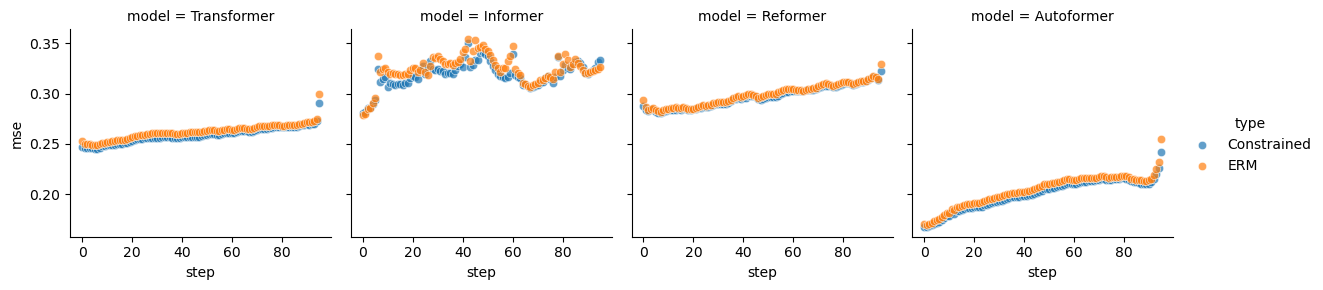

### Dataset: electricity.csv pred_len: 96 constraint_idx: 1

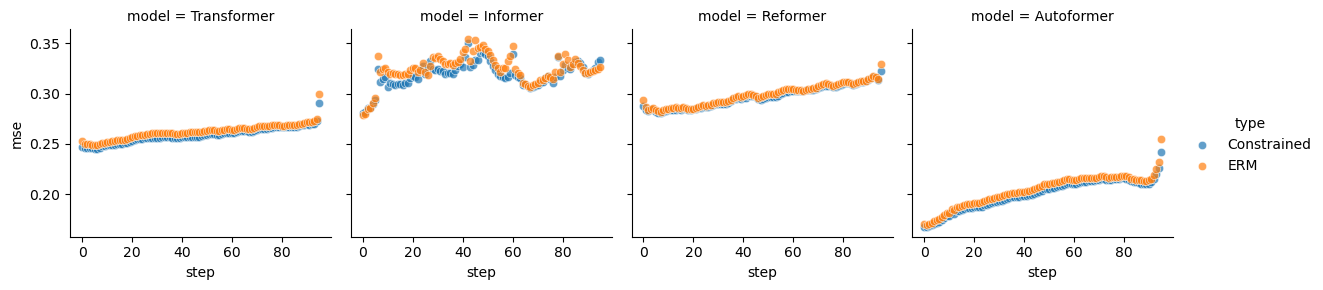

### Dataset: electricity.csv pred_len: 96 constraint_idx: 0

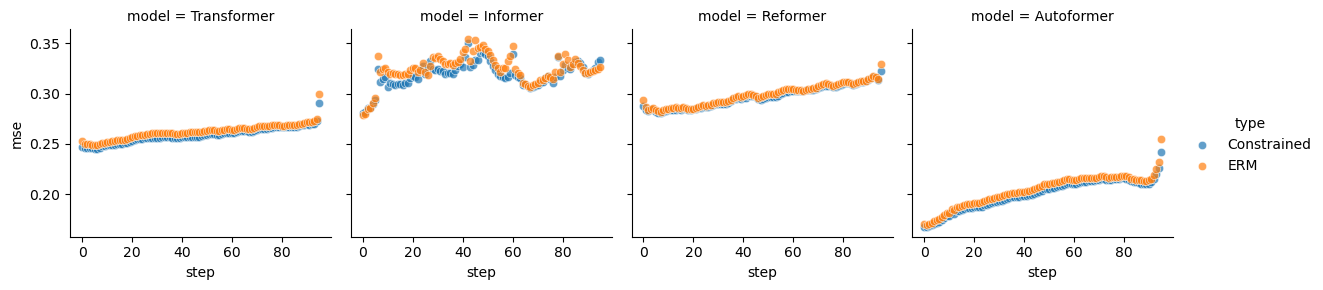

[5 6 2 1 0]


### Dataset: electricity.csv pred_len: 192 constraint_idx: 5

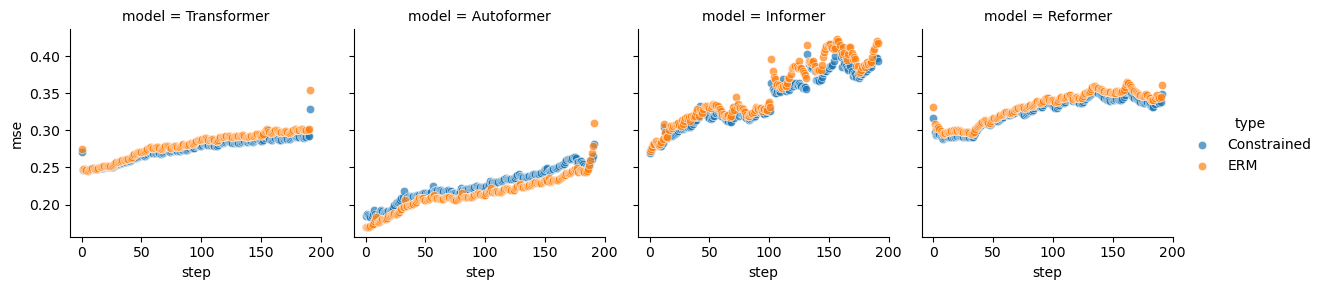

### Dataset: electricity.csv pred_len: 192 constraint_idx: 6

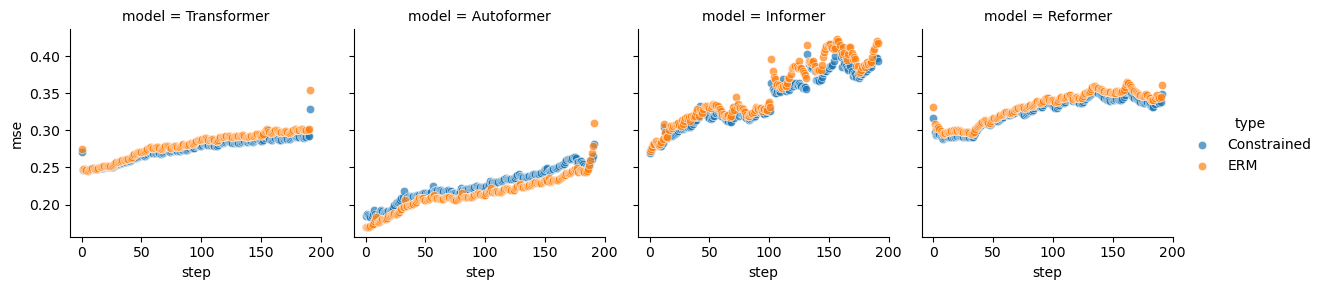

### Dataset: electricity.csv pred_len: 192 constraint_idx: 2

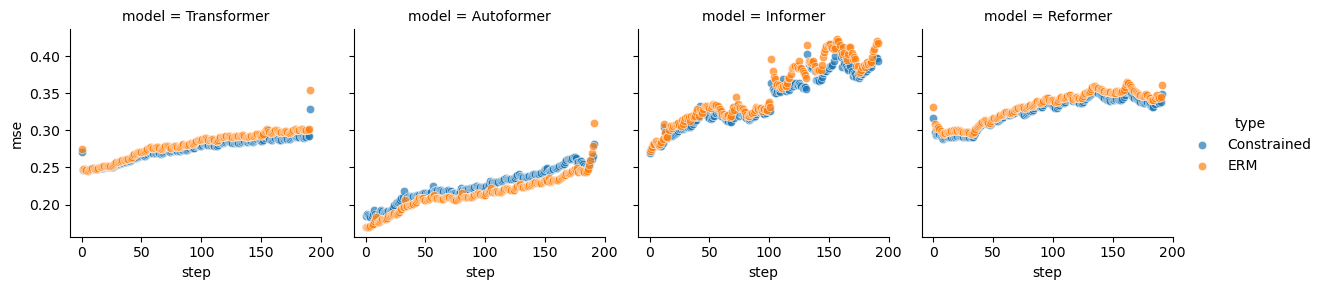

### Dataset: electricity.csv pred_len: 192 constraint_idx: 1

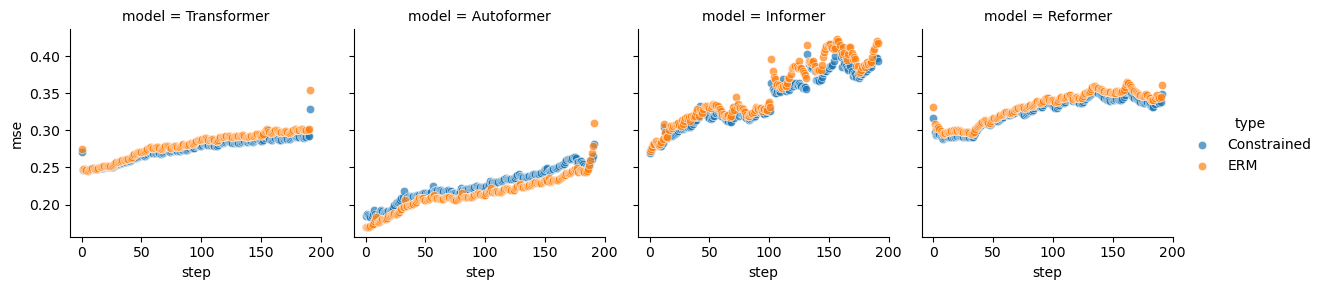

### Dataset: electricity.csv pred_len: 192 constraint_idx: 0

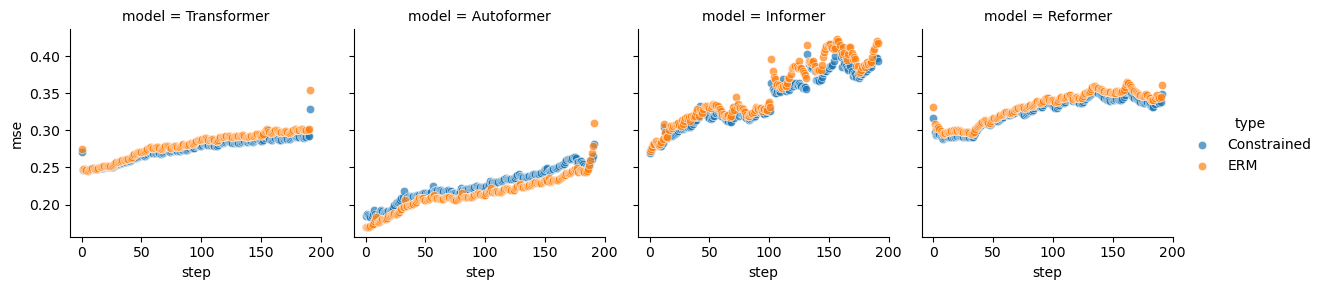

[5 2 3 0]


### Dataset: electricity.csv pred_len: 336 constraint_idx: 5

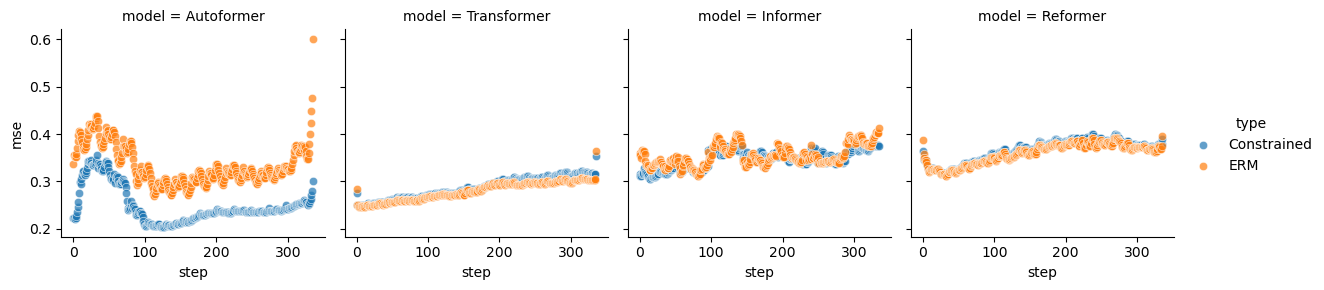

### Dataset: electricity.csv pred_len: 336 constraint_idx: 2

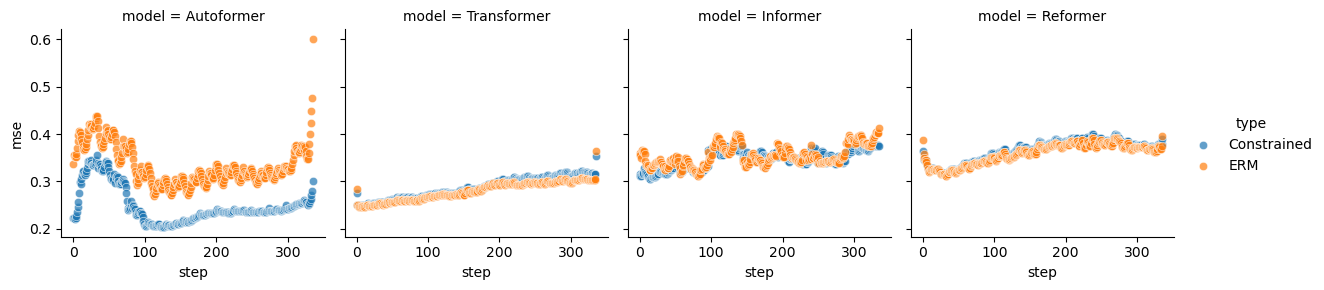

### Dataset: electricity.csv pred_len: 336 constraint_idx: 3

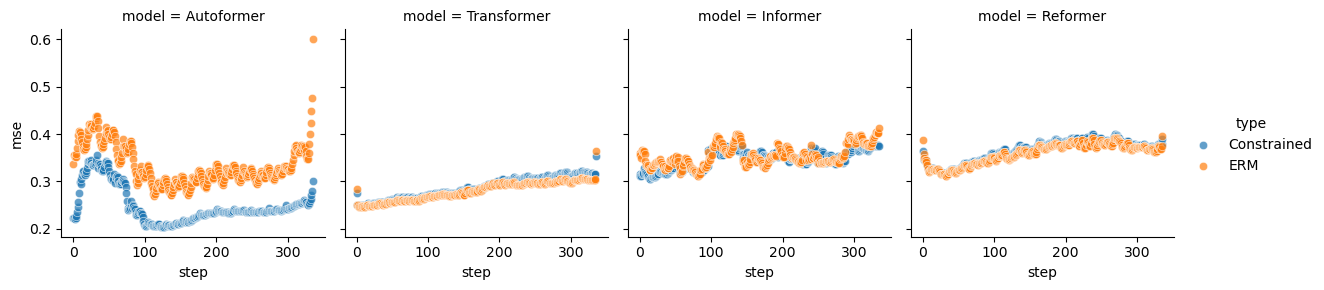

### Dataset: electricity.csv pred_len: 336 constraint_idx: 0

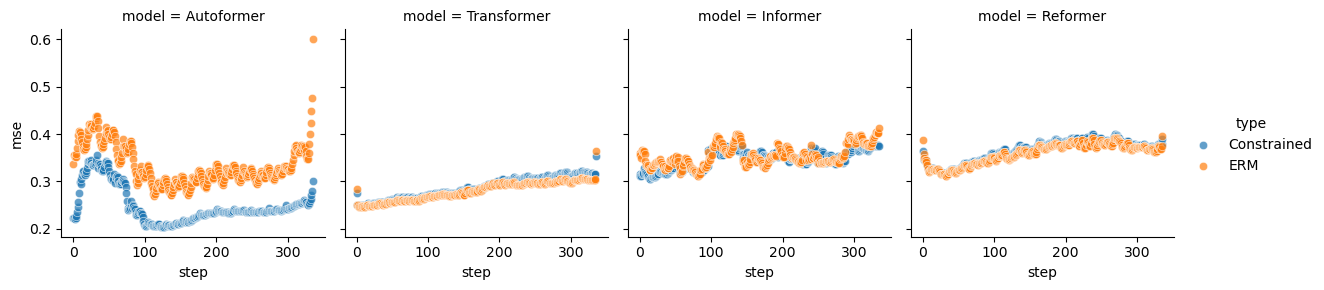

[2 3 0]


### Dataset: electricity.csv pred_len: 720 constraint_idx: 2

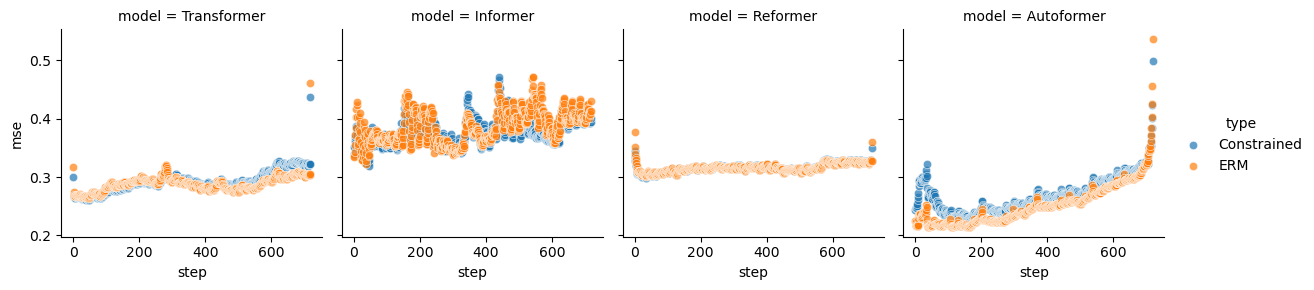

### Dataset: electricity.csv pred_len: 720 constraint_idx: 3

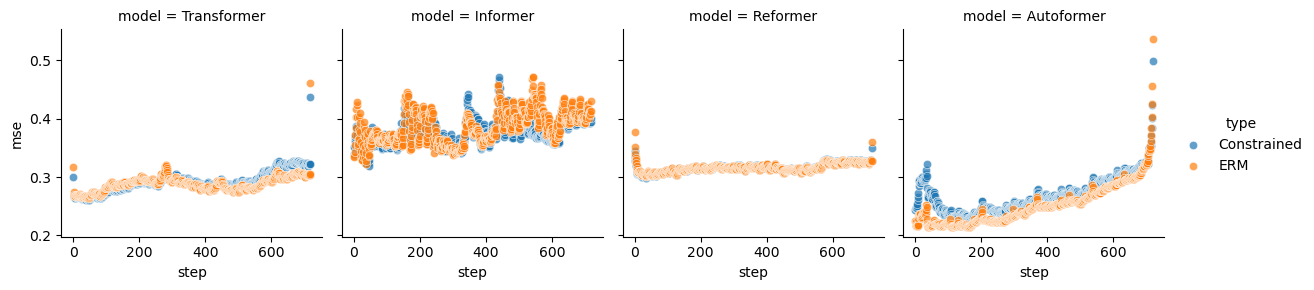

### Dataset: electricity.csv pred_len: 720 constraint_idx: 0

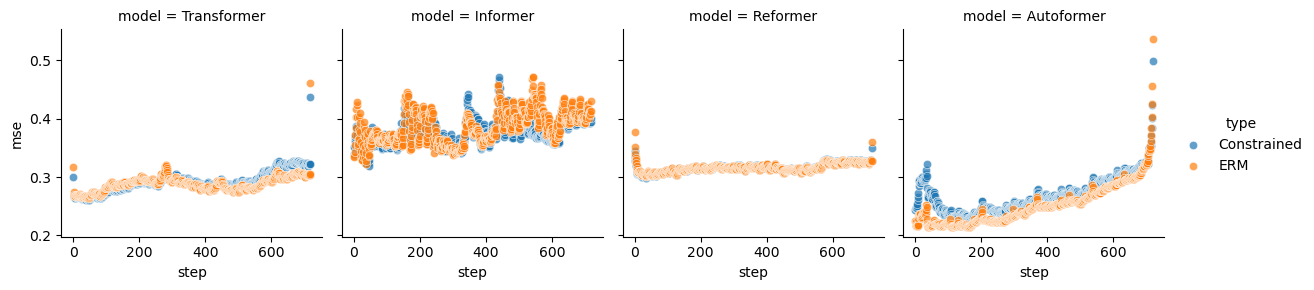

[6 2 4 0]


### Dataset: exchange_rate.csv pred_len: 96 constraint_idx: 6

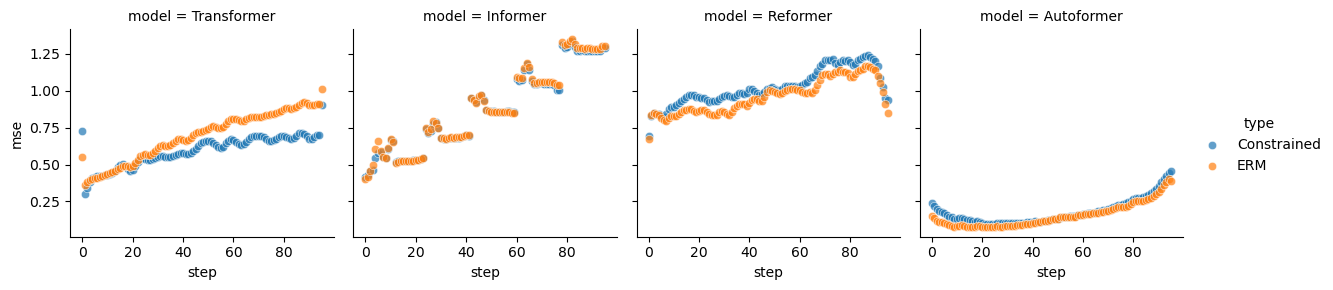

### Dataset: exchange_rate.csv pred_len: 96 constraint_idx: 2

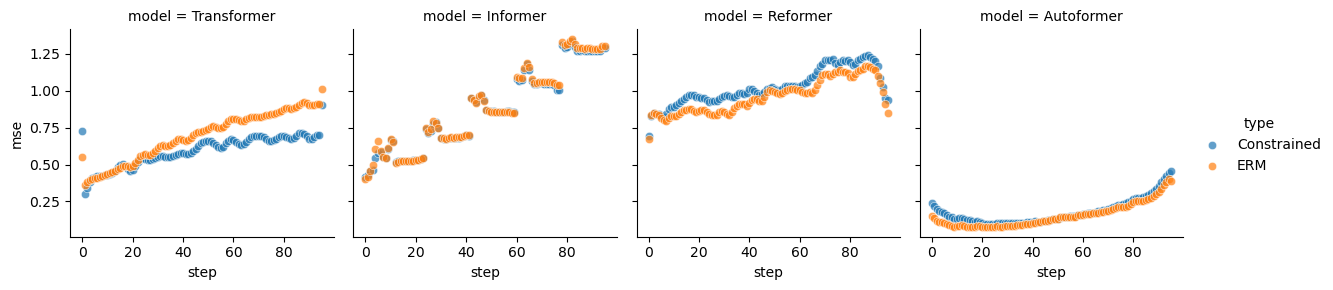

### Dataset: exchange_rate.csv pred_len: 96 constraint_idx: 4

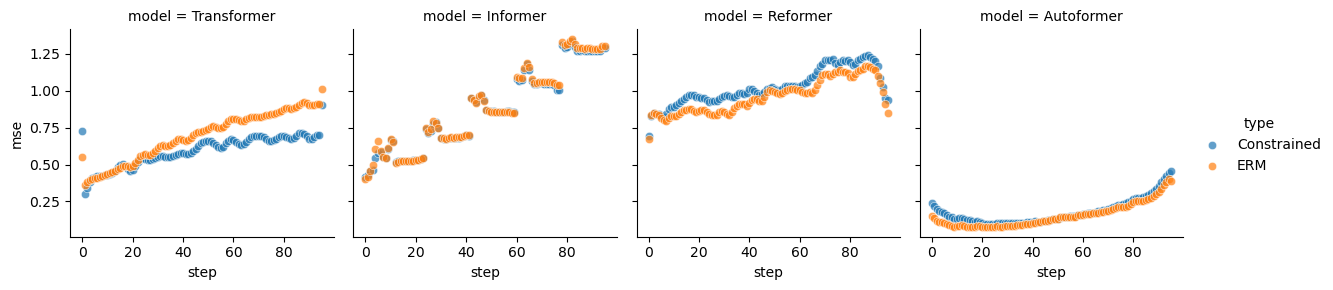

### Dataset: exchange_rate.csv pred_len: 96 constraint_idx: 0

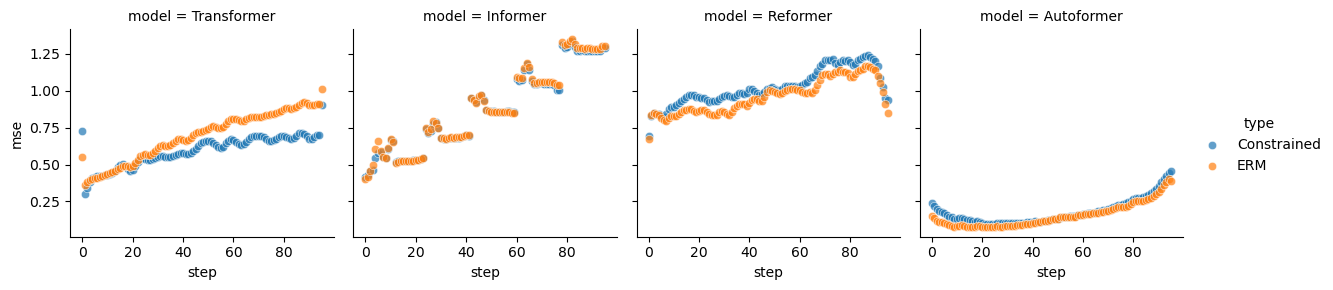

[6 3 2 0]


### Dataset: exchange_rate.csv pred_len: 192 constraint_idx: 6

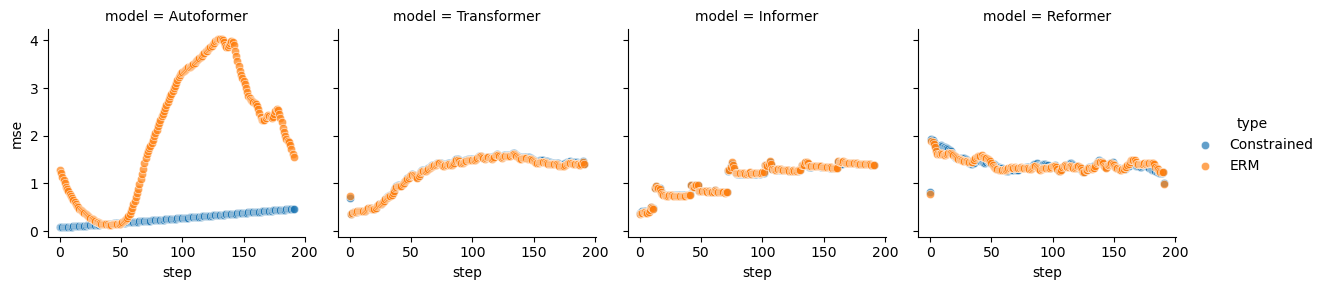

### Dataset: exchange_rate.csv pred_len: 192 constraint_idx: 3

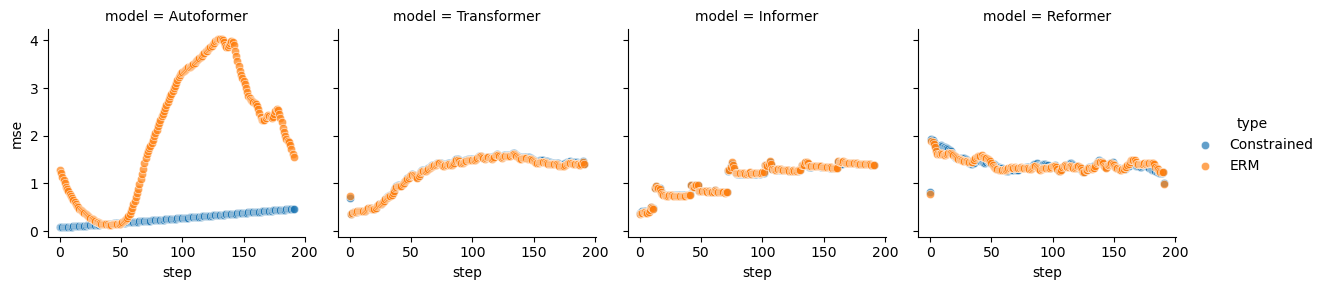

### Dataset: exchange_rate.csv pred_len: 192 constraint_idx: 2

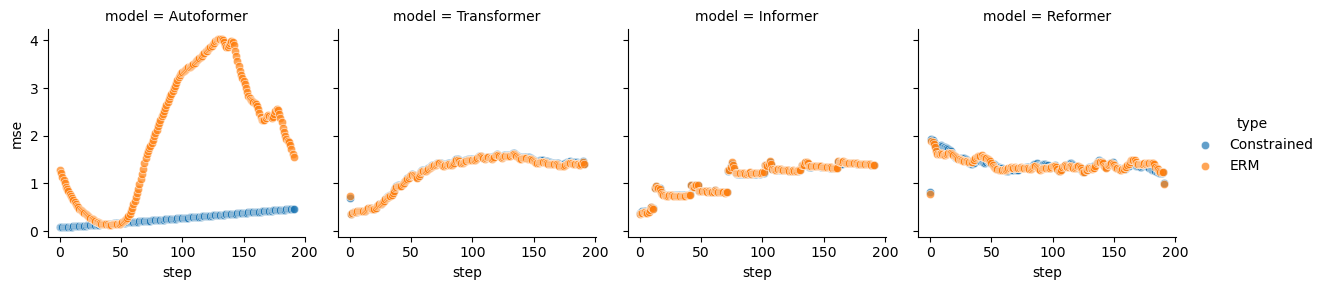

### Dataset: exchange_rate.csv pred_len: 192 constraint_idx: 0

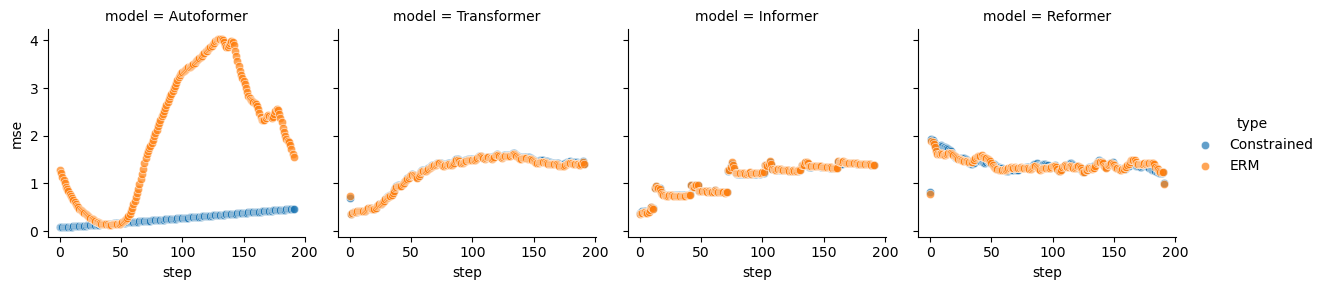

[6 2 1 0]


### Dataset: exchange_rate.csv pred_len: 336 constraint_idx: 6

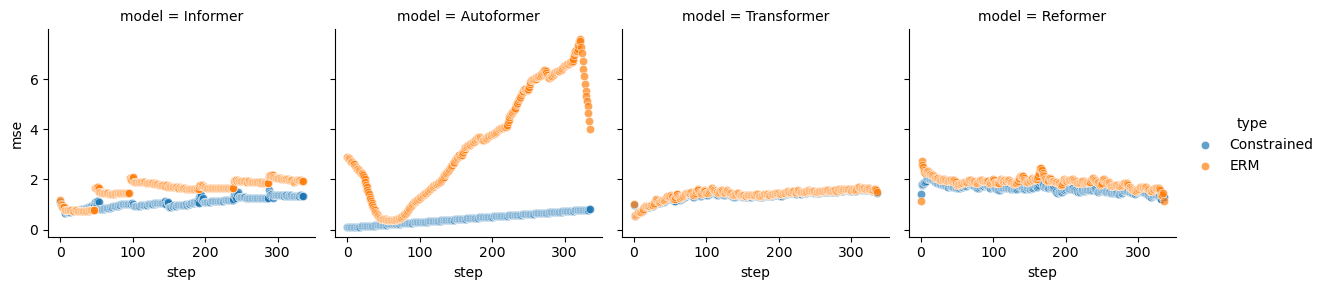

### Dataset: exchange_rate.csv pred_len: 336 constraint_idx: 2

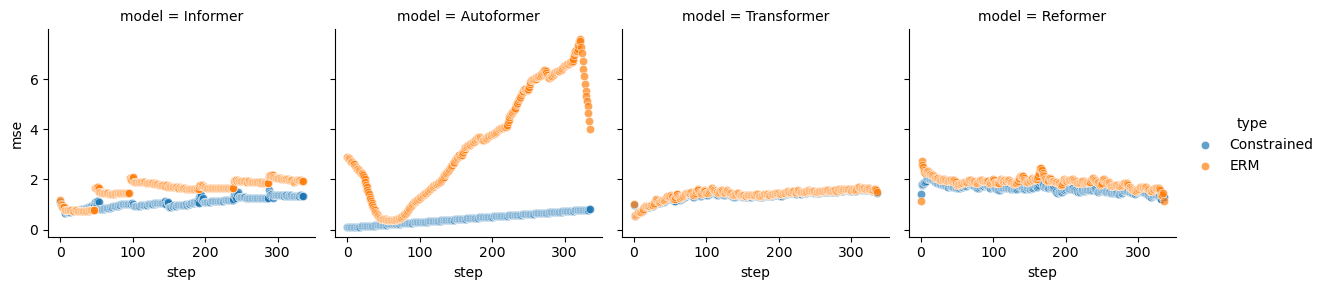

### Dataset: exchange_rate.csv pred_len: 336 constraint_idx: 1

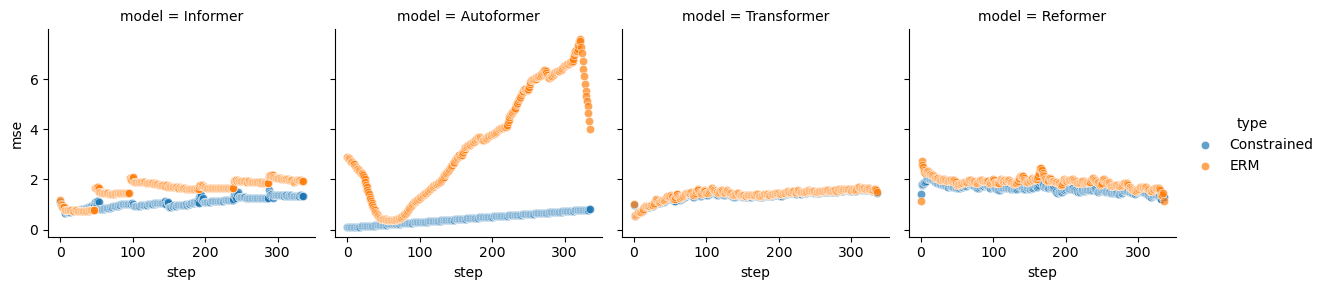

### Dataset: exchange_rate.csv pred_len: 336 constraint_idx: 0

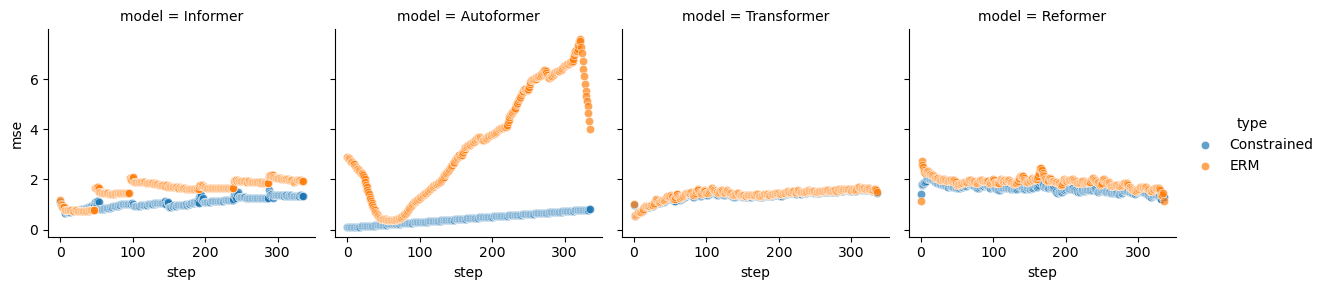

[5 2 3 0]


### Dataset: exchange_rate.csv pred_len: 720 constraint_idx: 5

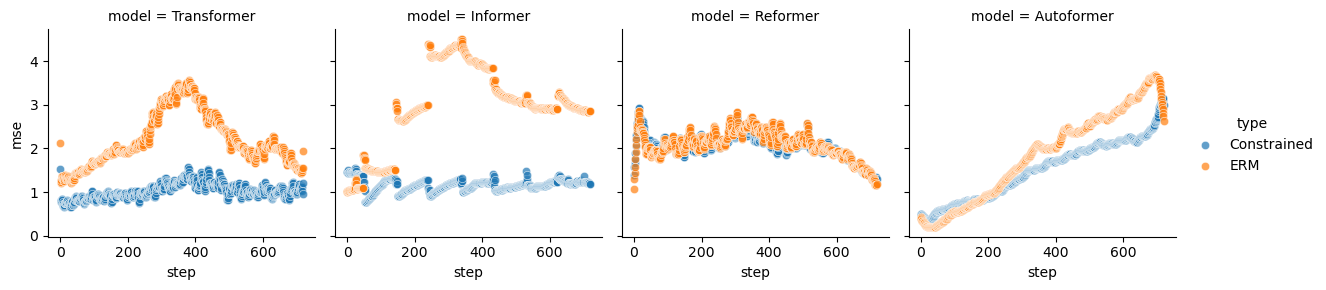

### Dataset: exchange_rate.csv pred_len: 720 constraint_idx: 2

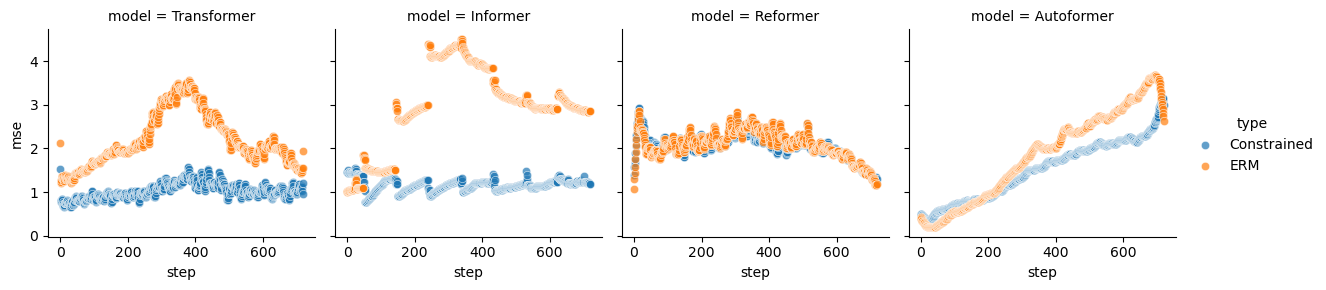

### Dataset: exchange_rate.csv pred_len: 720 constraint_idx: 3

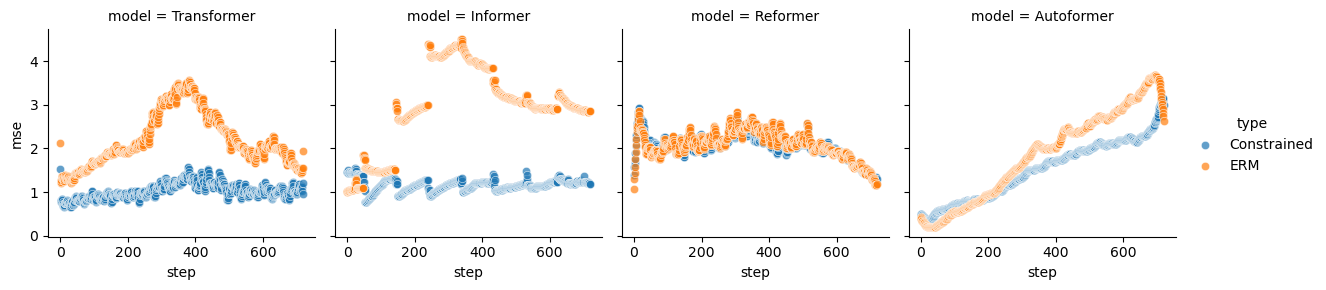

### Dataset: exchange_rate.csv pred_len: 720 constraint_idx: 0

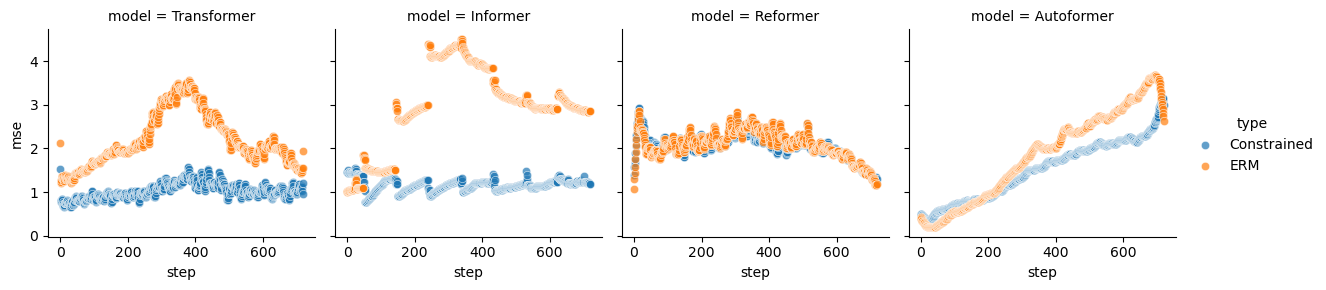

[4 6 1 0]


### Dataset: weather.csv pred_len: 96 constraint_idx: 4

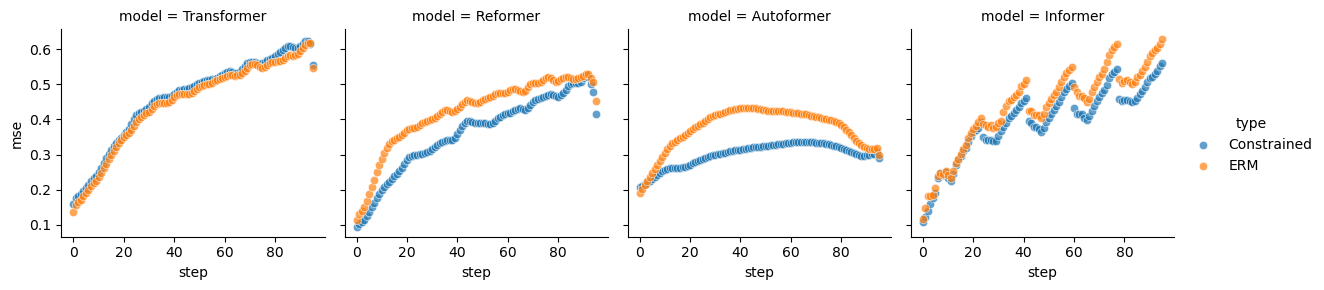

### Dataset: weather.csv pred_len: 96 constraint_idx: 6

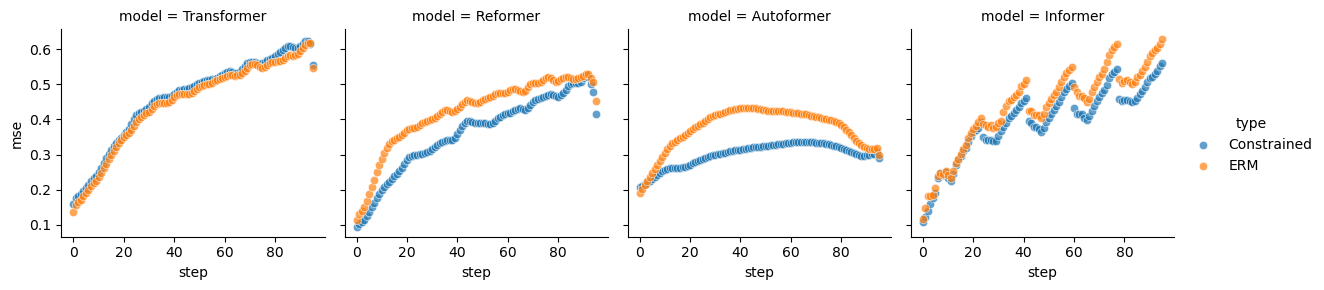

### Dataset: weather.csv pred_len: 96 constraint_idx: 1

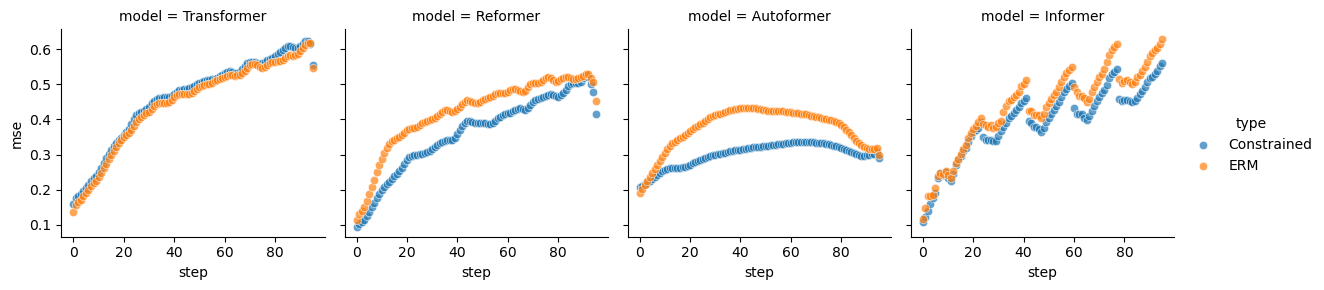

### Dataset: weather.csv pred_len: 96 constraint_idx: 0

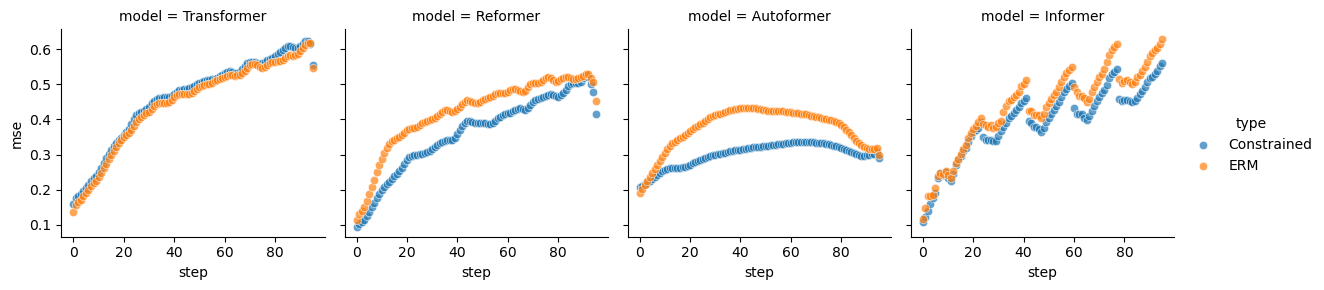

[5 4 2 1 0]


### Dataset: weather.csv pred_len: 192 constraint_idx: 5

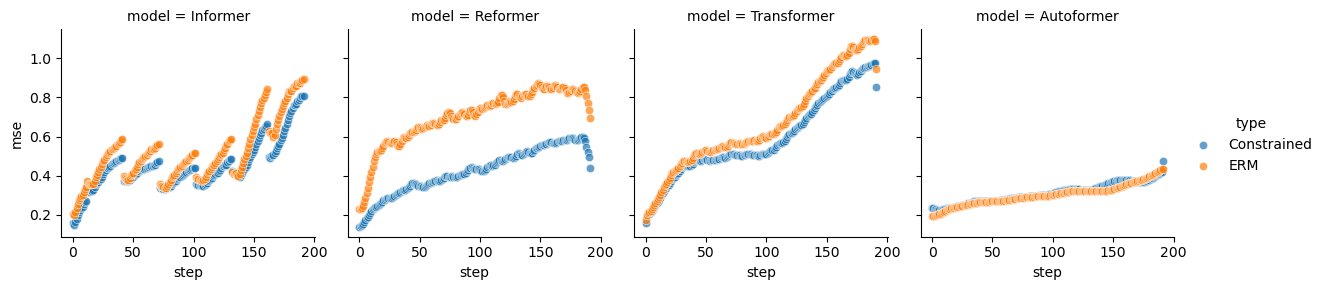

### Dataset: weather.csv pred_len: 192 constraint_idx: 4

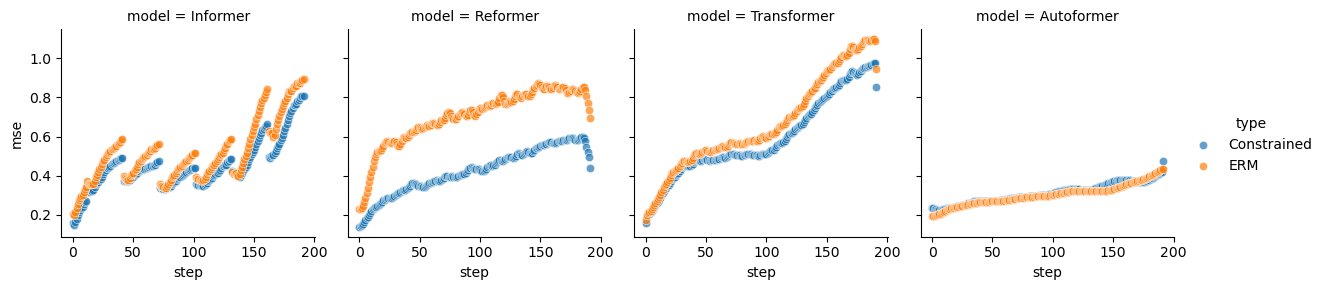

### Dataset: weather.csv pred_len: 192 constraint_idx: 2

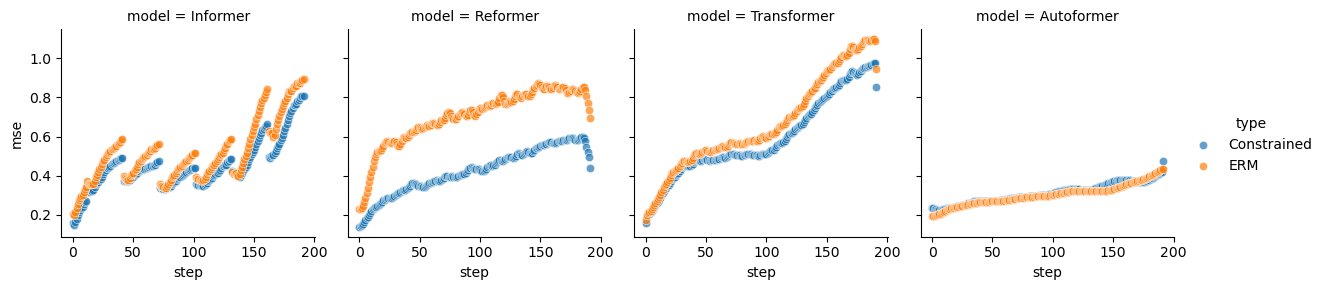

### Dataset: weather.csv pred_len: 192 constraint_idx: 1

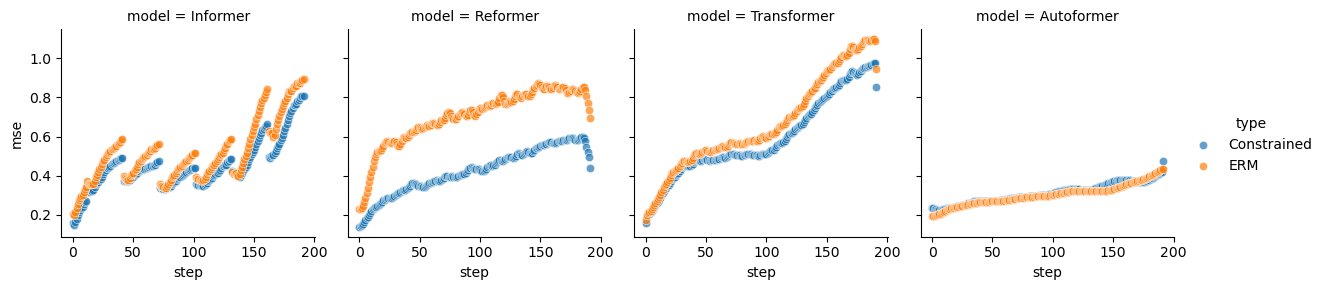

### Dataset: weather.csv pred_len: 192 constraint_idx: 0

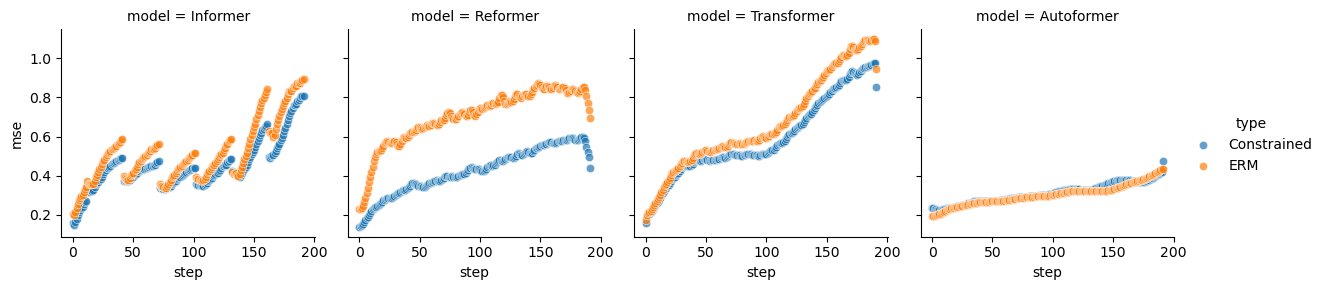

[5 4 3 1 0]


### Dataset: weather.csv pred_len: 336 constraint_idx: 5

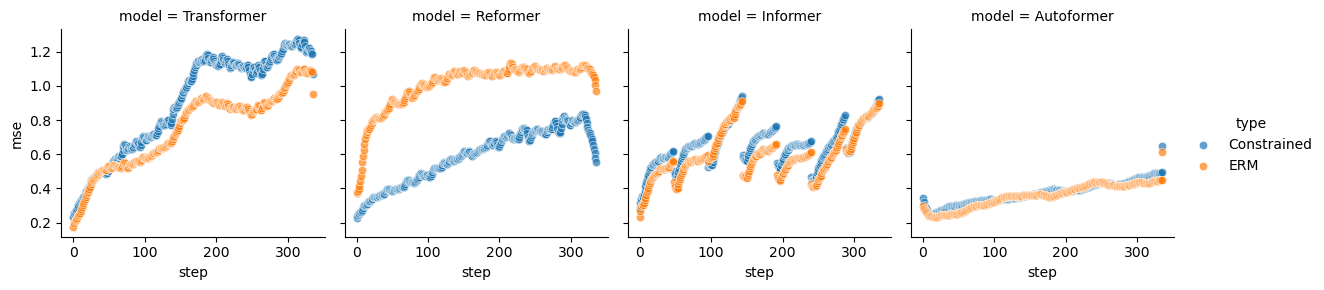

### Dataset: weather.csv pred_len: 336 constraint_idx: 4

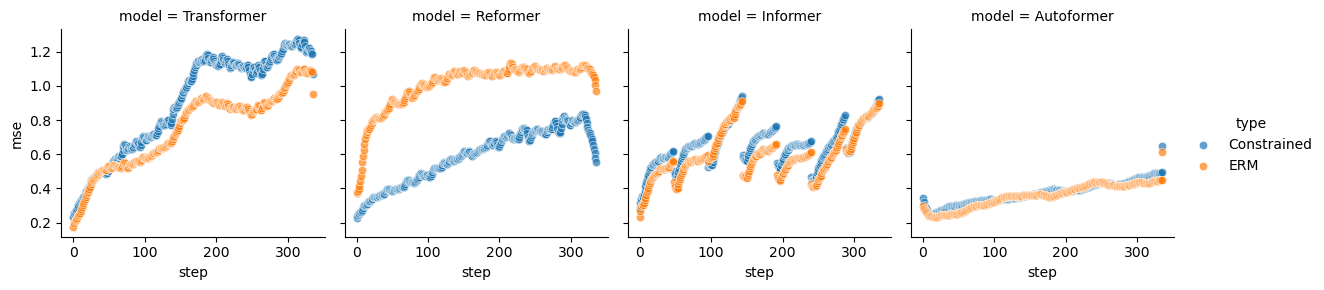

### Dataset: weather.csv pred_len: 336 constraint_idx: 3

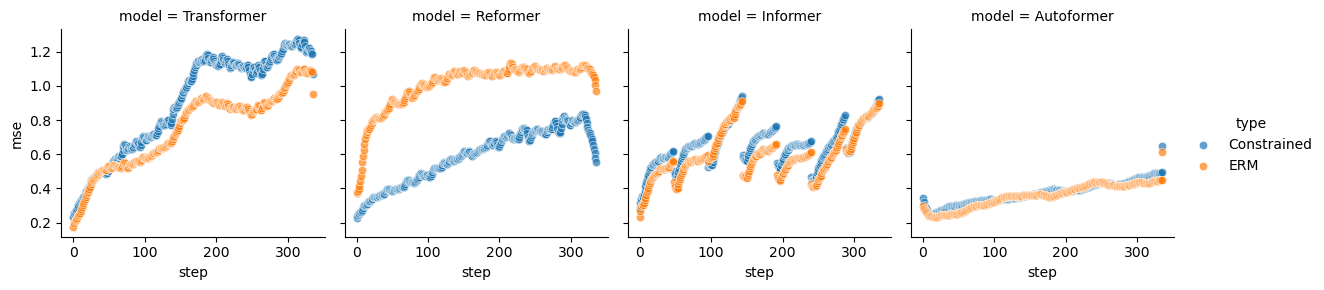

### Dataset: weather.csv pred_len: 336 constraint_idx: 1

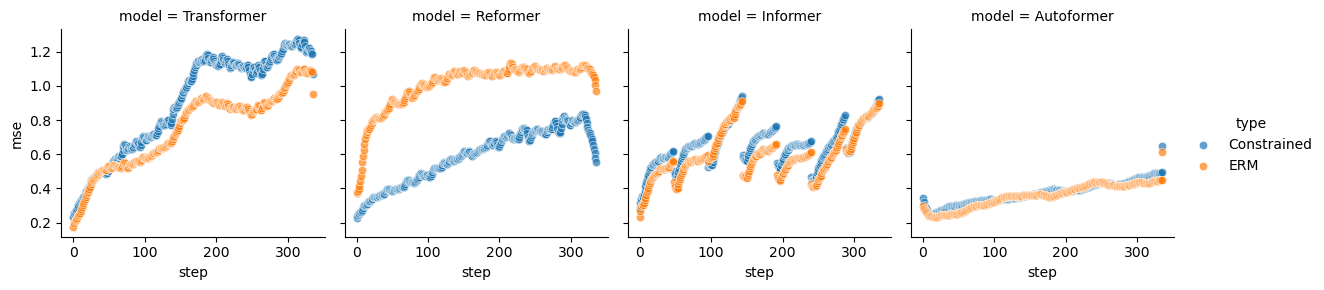

### Dataset: weather.csv pred_len: 336 constraint_idx: 0

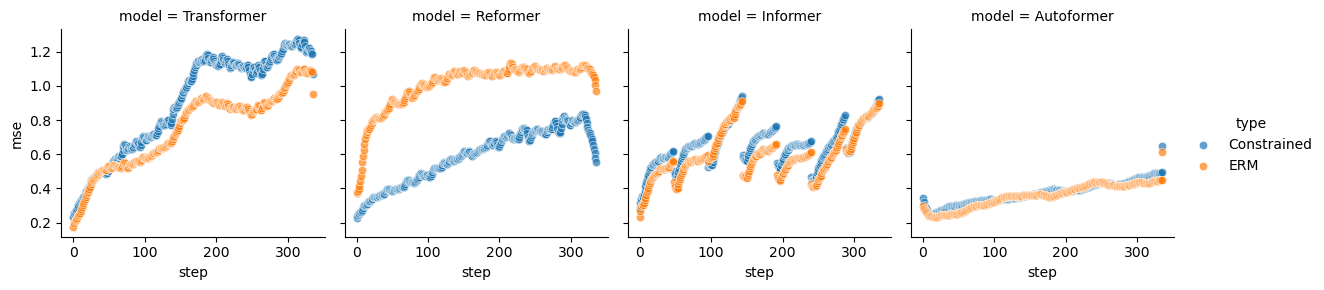

[3 2 1 0]


### Dataset: weather.csv pred_len: 720 constraint_idx: 3

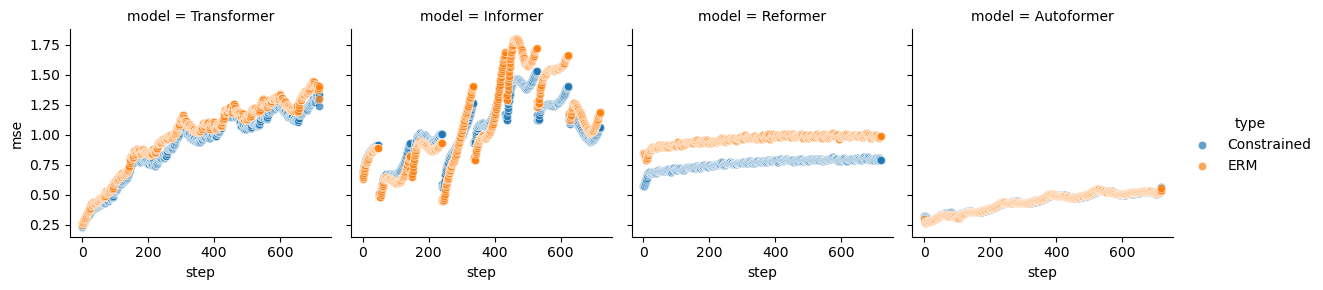

### Dataset: weather.csv pred_len: 720 constraint_idx: 2

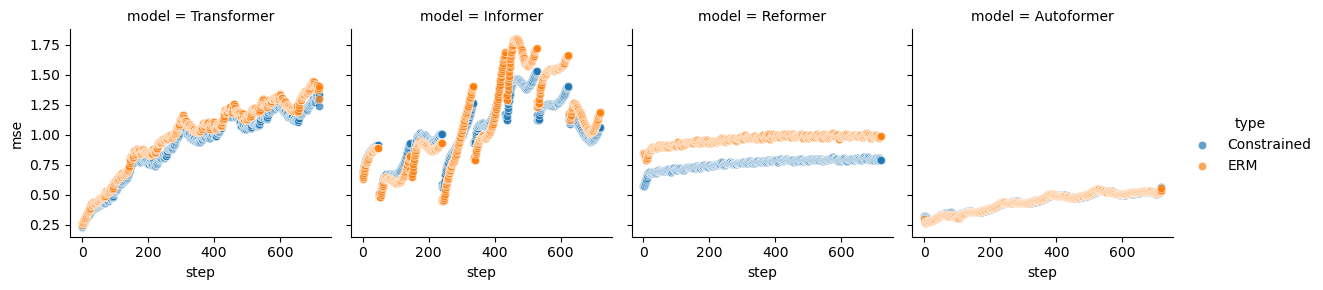

### Dataset: weather.csv pred_len: 720 constraint_idx: 1

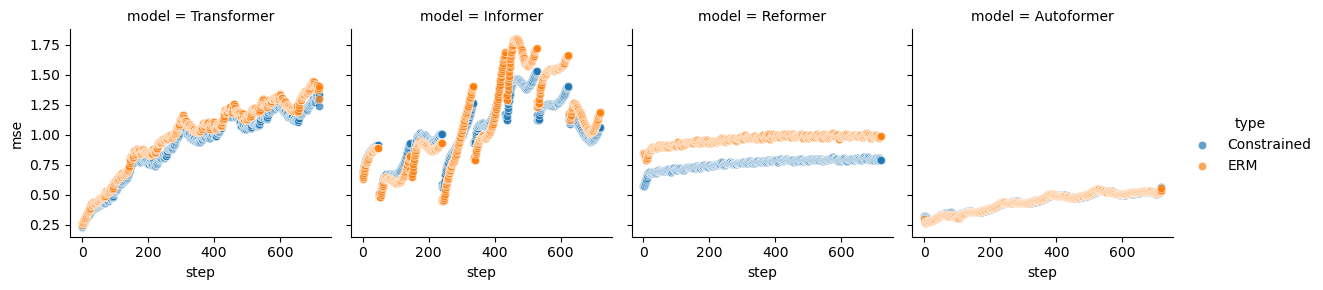

### Dataset: weather.csv pred_len: 720 constraint_idx: 0

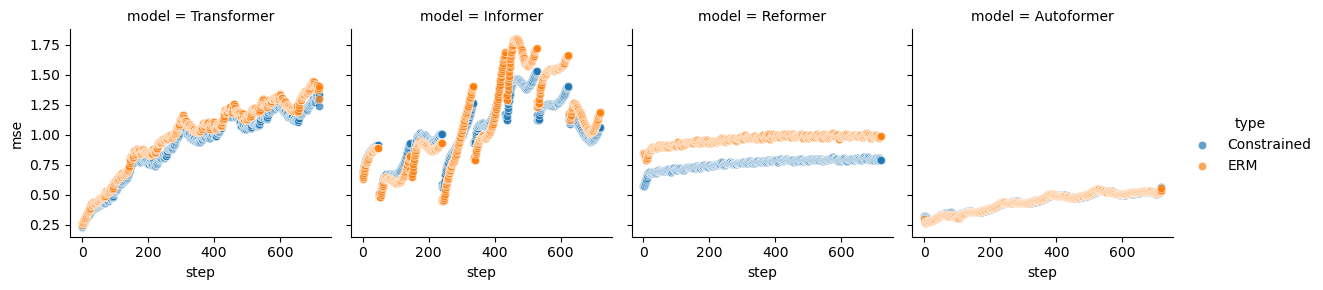

In [ ]:
from IPython.display import display, Markdown
to_plot = df_to_plot[(df_to_plot.split=='test')].copy()
for (data_path,pred_len), series in to_plot.groupby(['data_path',"pred_len"]):
    constraints = series.constraint_idx.unique()
    print(constraints)
    constraints = constraints[constraints!=-1] # to iterate over all constraints explored.
    for constraint_idx in constraints:
        display(Markdown(f"### Dataset: {data_path} pred_len: {pred_len} constraint_idx: {constraint_idx}"))
        plot_series = series#series[series["constraint_idx"]==constraint_idx]
        
        #means_per_experiment = plot_series.groupby(['pred_len','constraint_level','Algorithm','model','epoch','type'])['mse'].mean().reset_index()
        #display(means_per_experiment)
        # do a pivot where model are the rows, and the columns constrained and unconstrained
        #display(means_per_experiment.pivot(index=['model'], columns='type', values='mse').reset_index())

        # sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        
        # plt.axhline(y=constraint_level, color='r', linestyle='-')
        # plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        # plt.show()

        # This same scatterplot but in a grid by algorithm. 
        g = sns.FacetGrid(plot_series, col="model", hue="type")
        g.map(sns.scatterplot, "step", "mse", alpha=.7)
        g.add_legend()
        # add the hline
        # for ax in g.axes:
        #     ax.axhline(y=constraint_level, color='r', linestyle='-')
        plt.show()
        # export this plot to latex. Remove the dot in constraint_level decimal
        #TODO fix
        #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{data_path.replace('.','')}_{pred_len}_{str(constraint_level).replace('.','')}.png")
        # Fix [Errno 2] No such file or directory: 'figures/electricity.csv_96_0.17_individual.png'


### ERM on multiple algorithms
As a front page chart to illustrate the problem

In [ ]:
#TODO ( I think Nacho already did this)

### Loss shaping single instance qualitative analysis

### Plotting dual variables

In [ ]:
df_to_plot[['run_id','pred_len','constraint_level','data_path','model','type']].drop_duplicates().query("data_path=='weather.csv' and model=='Reformer' and type=='Constrained'")

run_id  pred_len  constraint_level    data_path     model  \
131904  ja5qqrwj       336             0.730  weather.csv  Reformer   
134064  dv2s5qjf       192             0.598  weather.csv  Reformer   
134928  dpn9jz5a        96             0.527  weather.csv  Reformer   
258768  dthgwiaz       720             0.283  weather.csv  Reformer   

               type  
131904  Constrained  
134064  Constrained  
134928  Constrained  
258768  Constrained

In [ ]:
# #df_to_plot.query('split=="train" and pred_len==96').run_id.head(1)
# #mult_cols = [f"multiplier/{i}" for i in range(0,96)]
# # Plot for every constraint level in the 96 pred len window
# #for pred_len in df_to_plot.pred_len.unique():
# display(Markdown(f"# Multipliers for window of {pred_len}"))
# # sns.scatterplot(x="step", y="multiplier", hue="model",style="constraint_level", 
# #     data=df_to_plot.query(f"split=='train' and type=='Constrained' and pred_len=={96} and data_path=='weather.csv'"))
# # same plot, but grid with one plot per model
# dd = df_to_plot#df_to_plot.query("run_id=='6fgam2dx' and split=='train'")#.query(f"split=='train' and type=='Constrained' and pred_len==96 and data_path=='electricity.csv' and model=='Reformer' and constraint_level==0.157")
# dd_test = df_to_plot#df_to_plot.query("run_id=='6fgam2dx' and split=='test'")#.query(f"split=='test' and type=='Constrained' and pred_len==96 and data_path=='electricity.csv' and model=='Reformer' and constraint_level==0.157")

# #print(dd_test.constraint_level.unique())
# test_set_plus_multipliers = dd[['step','multiplier']].merge(dd_test[['step','split','mse']],on='step')

# unioned = pd.concat([dd[['step','split','multiplier','mse']],test_set_plus_multipliers[['step','split','multiplier','mse']]])

# display(unioned)


# display(test_set_plus_multipliers)

# #constraint_level==0.553
# # mult on x, mse@train and mse@test on y. hue=split
# # Add step over every point
# sns.scatterplot(unioned,x="multiplier", y="mse",hue='split', alpha=.3,legend='full')



# g = sns.FacetGrid(dd, col="model", row="constraint_level")
# g.map(sns.scatterplot, "step", "multiplier", alpha=.3)
# #g.map(sns.scatterplot, "step", "mse", alpha=.3)

# Multipliers for window of 720

step  split  multiplier       mse
16128        0  train    2.801533  0.209369
16129        1  train    1.050123  0.204042
16130        2  train    0.269966  0.194581
16131        3  train    0.000000  0.189056
16132        4  train    0.000000  0.187635
...        ...    ...         ...       ...
17418235   719   test         NaN  1.910884
17418236   719   test         NaN  1.910884
17418237   719    val         NaN  1.909591
17418238   719    val         NaN  1.909591
17418239   719    val         NaN  1.909591

[17515008 rows x 4 columns]

step  multiplier  split       mse
0            0    2.801533  train  0.209369
1            0    2.801533   test  0.268508
2            0    2.801533    val  0.266284
3            0    2.801533  train  0.215619
4            0    2.801533   test  0.247226
...        ...         ...    ...       ...
17418235   719         NaN   test  1.910884
17418236   719         NaN   test  1.910884
17418237   719         NaN    val  1.909591
17418238   719         NaN    val  1.909591
17418239   719         NaN    val  1.909591

[17418240 rows x 4 columns]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fedbc19fa70> (for post_execute):


KeyboardInterrupt: 

/home/jporras/miniconda3/envs/autoformer/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7fedbc19f4d0> (for post_execute):


KeyboardInterrupt: 

### More random explorations
Ideas: 
1. Loss over time
2. Infeasibility rate over time
3. Loss shape across epochs (see how it evolves)
4. Plotting dual variables

## Result tables
1. Reproduce the pivot table from notebook 11, perhaps add standard deviation reports.
2. Explore and find other interesting table visualziation

### Pivot tables (summary)

In [45]:
def style_pivot_table_best_per_params(pivoted_df):
    pivoted_df=pivoted_df.copy()
    pivoted_df.columns.names = ['metric','constraint_type','model']
    mask = pd.DataFrame(False, index=pivoted_df.index, columns=pivoted_df.columns)
    for keys,subset in  pivoted_df.groupby(level=['metric','model'],axis=1):
        mask.loc[:,subset.columns] = subset.eq(subset.min(axis=1), axis=0)
        
    ##STYLE
    # truncate to 4 decimals for display
    pivoted_df=pivoted_df.style.format("{:.3f}")
    pivoted_df=pivoted_df.apply(lambda s: ['font-weight: bold;text-decoration: underline' if v else '' for v in mask.loc[s.name]], axis=1)
    return pivoted_df

def data_path_renaming(x):
    if x=="exchange_rate.csv":
        x='Exchange'
    x=x.replace(".csv","")
    if x=="electricity":
        x="ECL"
    else: 
        x=x.replace(".csv","").replace("_"," ").title()
    return latex_scaffolding_dataset(x)
def latex_scaffolding_dataset(x):
    # Add rotatebox
    x=r'\rotatebox'+'{90}{'+x+'}'
    x=r'\multirow{4}{*}{'+x+'}'
    return x
def text_bf(x):
    return r'\textbf{'+str(x)+'}'

def latex_style_best(pivoted_df):
    pivoted_df=pivoted_df.copy()
    pivoted_df.columns.names = ['metric','constraint_type','model']
    mask = pd.DataFrame(False, index=pivoted_df.index, columns=pivoted_df.columns)
    for keys,subset in  pivoted_df.groupby(level=['metric','model'],axis=1):
        mask.loc[:,subset.columns] = subset.eq(subset.min(axis=1), axis=0)
    #if mask is true, add text_bf
    boldface_df = pivoted_df.copy().applymap(lambda x: f"{x:.3f}")
    boldface_df[mask] = boldface_df.applymap(text_bf)
    return boldface_df


pd.set_option('display.max_columns', None)
def compute_pivot_over_metric(summary_metrics,pivot_value_columns=['window_std'],split='test'):
    pivoted_tables=[]
    data_paths=summary_metrics.data_path.unique()
    for data_path in data_paths:
        tp2=summary_metrics.query(f'data_path==@data_path and split==@split').copy()

        #GROUPING TEH VALS
        grouped_values=tp2.groupby(['pred_len','model','constraint_type'])[[
            'mse',
            'mcv',
            'std_mse',
            'std_mcv',
            'mean_infeasible_rate',
            'std_infeasible_rate',
            'window_std'
            ]].mean().reset_index()
        
        # Pivot of models versus constrained and ERM, values are mse and mse_diff
        all_results = grouped_values
        
        # Pivot all results, sort ascending by pred_len, then mean_violation on constrained
        pivoted=all_results.pivot(
            index=['pred_len'],
            columns=['constraint_type','model'], 
            values=pivot_value_columns
        )
        
        pivoted=style_pivot_table_best_per_params(pivoted)
        #display(pivoted)
        pivoted_tables.append(pivoted)
    result_table = pd.concat([d.data for d in pivoted_tables],keys=data_paths,names=['data_path'])

    return result_table
display(Markdown(f"# Pivot tables for split=test"))


summary_metrics_to_plot = summary_metrics.copy()
# rename constraint_types to be more readable
summary_metrics_to_plot['constraint_type'] = summary_metrics_to_plot['constraint_type'].replace({
    'constant':'1Ours',
    'erm':'3ERM',
    'constant_resilience':'2Ours+R'
})

for metric in [
    'mcv',
    'mse',
    #'mean_infeasible_rate',
    'window_std',
    ]:
    #TODO filter while traffic runs
    summary_filtered = summary_metrics_to_plot.query("data_path!='traffic.csv'")
    result_table = compute_pivot_over_metric(summary_filtered,pivot_value_columns=[metric],split='test')
    display(Markdown(f"## {metric}"))
    # add bold
    display(style_pivot_table_best_per_params(result_table))
    #latex styling
    latex_table=result_table.copy()

    latex_table.index=latex_table.index \
        .set_levels([data_path_renaming(level) for level in latex_table.index.levels[0]],level=0)

    
    
    latex_table=latex_style_best(latex_table)
    
    # drop the metric level in the multiindex
    latex_table.columns=latex_table.columns.droplevel(0)

    # Swap the column multiindex to model on top
    latex_table=latex_table.swaplevel(0,1,axis=1)

    #latex_table=style_pivot_table_best_per_params(latex_table)
    # Show only :.4f
    # Rename data_path to None
    latex_table=latex_table.rename_axis(index={'data_path':None,'pred_len':''},columns={'model':'','constraint_type':''})
    #display(latex_table.columns)
    # refactor the multiindex in columns so that repeated models merge
    #print(latex_table.to_latex(escape=False,index_names=False,multicolumn_format='c',multicolumn=True))
    print(latex_table.to_latex(escape=False,multicolumn_format='c',multicolumn=True,column_format='cc|ccc|ccc|ccc|ccc'))
    


# Pivot tables for split=test

## mcv

\begin{tabular}{cc|ccc|ccc|ccc|ccc}
\toprule
                                                  &     & \multicolumn{2}{c}{Autoformer} & \multicolumn{2}{c}{Informer} & \multicolumn{2}{c}{Reformer} & \multicolumn{2}{c}{Transformer} \\
                                                  &     &           1Ours &            3ERM &           1Ours &            3ERM &           1Ours &            3ERM &           1Ours &            3ERM \\
{} & {} &                 &                 &                 &                 &                 &                 &                 &                 \\
\midrule
\multirow{4}{*}{\rotatebox{90}{Etth1}} & 96  &           0.434 &  \textbf{0.389} &  \textbf{0.614} &           0.620 &           0.513 &  \textbf{0.506} &  \textbf{0.664} &           0.717 \\
                                                  & 192 &  \textbf{0.532} &           0.563 &  \textbf{0.760} &           0.874 &  \textbf{0.472} &           0.493 &  \textbf{0.787} &           0.814 \\
     

## mse

\begin{tabular}{cc|ccc|ccc|ccc|ccc}
\toprule
                                                  &     & \multicolumn{2}{c}{Autoformer} & \multicolumn{2}{c}{Informer} & \multicolumn{2}{c}{Reformer} & \multicolumn{2}{c}{Transformer} \\
                                                  &     &           1Ours &            3ERM &           1Ours &            3ERM &           1Ours &            3ERM &           1Ours &            3ERM \\
{} & {} &                 &                 &                 &                 &                 &                 &                 &                 \\
\midrule
\multirow{4}{*}{\rotatebox{90}{Etth1}} & 96  &           0.724 &  \textbf{0.679} &  \textbf{0.884} &           0.890 &           0.796 &  \textbf{0.789} &  \textbf{0.814} &           0.866 \\
                                                  & 192 &  \textbf{0.838} &           0.869 &  \textbf{1.065} &           1.179 &  \textbf{0.797} &           0.818 &  \textbf{0.961} &           0.988 \\
     

## window_std

\begin{tabular}{cc|ccc|ccc|ccc|ccc}
\toprule
                                                  &     & \multicolumn{2}{c}{Autoformer} & \multicolumn{2}{c}{Informer} & \multicolumn{2}{c}{Reformer} & \multicolumn{2}{c}{Transformer} \\
                                                  &     &           1Ours &            3ERM &           1Ours &            3ERM &           1Ours &            3ERM &           1Ours &            3ERM \\
{} & {} &                 &                 &                 &                 &                 &                 &                 &                 \\
\midrule
\multirow{4}{*}{\rotatebox{90}{Etth1}} & 96  &           0.046 &  \textbf{0.024} &  \textbf{0.164} &           0.183 &  \textbf{0.058} &           0.058 &  \textbf{0.124} &           0.146 \\
                                                  & 192 &           0.141 &  \textbf{0.139} &  \textbf{0.179} &           0.211 &  \textbf{0.063} &           0.077 &  \textbf{0.151} &           0.166 \\
     

In [42]:
#latex styling
latex_table=result_table.copy()

latex_table.index=latex_table.index \
    .set_levels([data_path_renaming(level) for level in latex_table.index.levels[0]],level=0)

#TODO FIX the styling function to add textbf
#latex_table=latex_style_best(latex_table)
# drop the metric level in the multiindex
latex_table.columns=latex_table.columns.droplevel(0)

# Swap the column multiindex to model on top
latex_table=latex_table.swaplevel(0,1,axis=1)

#latex_table=style_pivot_table_best_per_params(latex_table)
# Show only :.4f
latex_table=latex_table.applymap(lambda x: f"{x:.4f}")
# Rename data_path to None
latex_table=latex_table.rename_axis(index={'data_path':None,'pred_len':''},columns={'model':'','type':''})
#display(latex_table.columns)
# refactor the multiindex in columns so that repeated models merge
display(latex_table)
#print(latex_table.to_latex(escape=False,index_names=False,multicolumn_format='c',multicolumn=True))
print(latex_table.to_latex(escape=False,multicolumn_format='c',multicolumn=True))


Autoformer Informer  \
constraint_type                                            1Ours    1Ours   
                                                                            
\multirow{4}{*}{\rotatebox{90}{Etth1}}            96      0.7240   0.8843   
                                                  192     0.8378   1.0650   
                                                  336     0.8498   1.2317   
                                                  720     1.0515   1.2770   
\multirow{4}{*}{\rotatebox{90}{Etth2}}            96      0.2954   0.4143   
                                                  192     0.3190   0.6466   
                                                  336     0.3336   0.6936   
                                                  720     0.4250   0.7838   
\multirow{4}{*}{\rotatebox{90}{Ettm1}}            96      0.5880   0.6728   
                                                  192     0.7515   0.7751   
                                                  336     0.6580   0.8420   
                                                  720     0.7825   0.9217   
\multirow{4}{*}{\rotatebox{90}{Ettm2}}            96      0.2076   0.1837   
                                                  192     0.1720   0.2458   
                                                  336     0.1970   0.2823   
                                                  720     0.3121   0.5332   
\multirow{4}{*}{\rotatebox{90}{National Illness}} 24      3.3976   5.1995   
                                                  36      3.2133   5.7924   
                                                  48      2.7383   5.4787   
                                                  60      3.1861   5.7586   
\multirow{4}{*}{\rotatebox{90}{Traffic}}          96      0.6152   0.7159   
                                                  192     0.6024      nan   
                                                  336     0.6064      nan   
                                                  720     0.6768      nan   

                                                      Reformer Transformer  \
constraint_type                                          1Ours       1Ours   
                                                                             
\multirow{4}{*}{\rotatebox{90}{Etth1}}            96    0.7959      0.8135   
                                                  192   0.7970      0.9611   
                                                  336   0.8249      0.9329   
                                                  720   0.9137      1.0260   
\multirow{4}{*}{\rotatebox{90}{Etth2}}            96    0.6263      0.2827   
                                                  192   1.1417      0.3267   
                                                  336   1.4197      0.3923   
                                                  720   2.1214      0.3908   
\multirow{4}{*}{\rotatebox{90}{Ettm1}}            96    0.7873      0.5650   
                                                  192   0.8451      0.6497   
                                                  336   0.8665      0.7131   
                                                  720   0.9076      0.9023   
\multirow{4}{*}{\rotatebox{90}{Ettm2}}            96    0.2111      0.1675   
                                                  192   0.3342      0.2254   
                                                  336   0.7626      0.2933   
                                                  720   1.9642      0.4426   
\multirow{4}{*}{\rotatebox{90}{National Illness}} 24    3.9235      5.2722   
                                                  36    4.0719      4.5379   
                                                  48    4.3228      5.1001   
                                                  60    4.5632      5.5223   
\multirow{4}{*}{\rotatebox{90}{Traffic}}          96    0.6927         nan   
                                                  192   0.6844         nan   
                        

\begin{tabular}{llllllllll}
\toprule
                                         & {} & Autoformer & Informer & Reformer & Transformer & Autoformer & Informer & Reformer & Transformer \\
                                         & constraint_type &      1Ours &    1Ours &    1Ours &       1Ours &       3ERM &     3ERM &     3ERM &        3ERM \\
{} & {} &            &          &          &             &            &          &          &             \\
\midrule
\multirow{4}{*}{\rotatebox{90}{Etth1}} & 96  &     0.7240 &   0.8843 &   0.7959 &      0.8135 &     0.6787 &   0.8896 &   0.7892 &      0.8658 \\
                                         & 192 &     0.8378 &   1.0650 &   0.7970 &      0.9611 &     0.8686 &   1.1789 &   0.8184 &      0.9876 \\
                                         & 336 &     0.8498 &   1.2317 &   0.8249 &      0.9329 &     0.8525 &   1.2370 &   0.8334 &      0.9411 \\
                                         & 720 &     1.0515 &   1.2770 &   0.9137 &      1.0260 

In [43]:
latex_table = result_table.copy()
latex_table.index = latex_table.index.set_levels([r'\rotatebox{90}{' + level.replace(".csv","").replace("_"," ").title() + '}' for level in latex_table.index.levels[0]], level=0)
latex_table.columns = latex_table.columns.set_levels([level.replace("model_", "") for level in latex_table.columns.levels[1]], level=1)

# Show only :.4f
latex_table = latex_table.applymap(lambda x: f"{x:.4f}")
# Rename data_path to None
latex_table = latex_table.rename_axis(index={'data_path': None})
display(latex_table)

metric                                           mse                    \
constraint_type                                1Ours                     
model                                     Autoformer Informer Reformer   
                                 pred_len                                
\rotatebox{90}{Etth1}            96           0.7240   0.8843   0.7959   
                                 192          0.8378   1.0650   0.7970   
                                 336          0.8498   1.2317   0.8249   
                                 720          1.0515   1.2770   0.9137   
\rotatebox{90}{Etth2}            96           0.2954   0.4143   0.6263   
                                 192          0.3190   0.6466   1.1417   
                                 336          0.3336   0.6936   1.4197   
                                 720          0.4250   0.7838   2.1214   
\rotatebox{90}{Ettm1}            96           0.5880   0.6728   0.7873   
                                 192          0.7515   0.7751   0.8451   
                                 336          0.6580   0.8420   0.8665   
                                 720          0.7825   0.9217   0.9076   
\rotatebox{90}{Ettm2}            96           0.2076   0.1837   0.2111   
                                 192          0.1720   0.2458   0.3342   
                                 336          0.1970   0.2823   0.7626   
                                 720          0.3121   0.5332   1.9642   
\rotatebox{90}{National Illness} 24           3.3976   5.1995   3.9235   
                                 36           3.2133   5.7924   4.0719   
                                 48           2.7383   5.4787   4.3228   
                                 60           3.1861   5.7586   4.5632   
\rotatebox{90}{Traffic}          96           0.6152   0.7159   0.6927   
                                 192          0.6024      nan   0.6844   
                                 336          0.6064      nan   0.6857   
                                 720          0.6768      nan   0.6778   

metric                                                                     \
constraint_type                                             3ERM            
model                                     Transformer Autoformer Informer   
                                 pred_len                                   
\rotatebox{90}{Etth1}            96            0.8135     0.6787   0.8896   
                                 192           0.9611     0.8686   1.1789   
                                 336           0.9329     0.8525   1.2370   
                                 720           1.0260     1.1069   1.2776   
\rotatebox{90}{Etth2}            96            0.2827     0.3140   0.4329   
                                 192           0.3267     0.3398   0.6478   
                                 336           0.3923     0.3994   0.6754   
                                 720           0.3908     0.4358   0.7944   
\rotatebox{90}{Ettm1}            96            0.5650     0.6052   0.6464   
                                 192           0.6497     0.8284   0.7676   
                                 336           0.7131     0.6853   0.8570   
                                 720           0.9023     0.7458   0.9290   
\rotatebox{90}{Ettm2}            96            0.1675     0.1682   0.1900   
                                 192           0.2254     0.1907   0.2231   
                                 336           0.2933     0.2137   0.2892   
                                 720           0.4426     0.2708   0.5723   
\rotatebox{90}{National Illness} 24            5.2722     3.1798   5.2130   
                                 36            4.5379     3.2164   5.7851   
                                 48            5.1001     3.0129   5.4999   
                                 60            5.5223     3.1476   5.7724   
\rotatebox{90}{Traffic}          96               nan     0.6330   0.7261   
  

## Pivot tables (resilience) (TEMP)

In [79]:
def style_pivot_table_best_per_params(pivoted_df):
    pivoted_df=pivoted_df.copy()
    pivoted_df.columns.names = ['metric','type','model']
    mask = pd.DataFrame(False, index=pivoted_df.index, columns=pivoted_df.columns)
    for keys,subset in  pivoted_df.groupby(level=['metric','model'],axis=1):
        mask.loc[:,subset.columns] = subset.eq(subset.min(axis=1), axis=0)
        
    ##STYLE
    # truncate to 4 decimals for display
    pivoted_df=pivoted_df.style.format("{:.4f}")
    pivoted_df=pivoted_df.apply(lambda s: ['font-weight: bold;text-decoration: underline' if v else '' for v in mask.loc[s.name]], axis=1)
    return pivoted_df

def data_path_renaming(x):
    if x=="exchange_rate.csv":
        x='Exchange'
    x=x.replace(".csv","")
    if x=="electricity":
        x="ECL"
    else: 
        x=x.replace(".csv","").replace("_"," ").title()
    return latex_scaffolding_dataset(x)
def latex_scaffolding_dataset(x):
    # Add rotatebox
    x=r'\rotatebox'+'{90}{'+x+'}'
    x=r'\multirow{4}{*}{'+x+'}'
    return x
def text_bf(x):
    return r'\textbf{'+x+'}'
def latex_style_best(pivoted_df):#TODO broken
    pivoted_df=pivoted_df.copy()
    pivoted_df.columns.names = ['metric','type','model']
    mask = pd.DataFrame(False, index=pivoted_df.index, columns=pivoted_df.columns)
    for keys,subset in  pivoted_df.groupby(level=['metric','model'],axis=1):
        mask.loc[:,subset.columns] = subset.eq(subset.min(axis=1), axis=0)
    #if mask is true, add text_bf
    pivoted_df=pivoted_df.apply(lambda s: [text_bf(v) if v else '' for v in mask.loc[s.name]], axis=1)
    return pivoted_df


pd.set_option('display.max_columns', None)
def compute_pivot_over_metric(summary_metrics,pivot_value_columns=['window_std'],split='test'):
    pivoted_tables=[]
    #TODO just for debug: 
    
    
    #data_paths=summary_metrics.data_path.unique()
    for data_path in data_paths:
        tp2=summary_metrics.query(f'data_path==@data_path and split==@split').copy()

        #GROUPING TEH VALS
        grouped_values=tp2.groupby(['pred_len','model','type'])[[
            'mse',
            'mcv',
            'std_mse',
            'std_mcv',
            'mean_infeasible_rate',
            'std_infeasible_rate',
            'window_std'
            ]].mean().reset_index()
        
        # Pivot of models versus constrained and ERM, values are mse and mse_diff
        all_results = grouped_values
        
        # Pivot all results, sort ascending by pred_len, then mean_violation on constrained
        pivoted=all_results.pivot(
            index=['pred_len'],
            columns=['type','model'], 
            values=pivot_value_columns
        )
        
        pivoted=style_pivot_table_best_per_params(pivoted)
        #display(pivoted)
        pivoted_tables.append(pivoted)
    result_table = pd.concat([d.data for d in pivoted_tables],keys=data_paths,names=['data_path'])

    return result_table
display(Markdown(f"# Pivot tables for split=test"))
for metric in [
    'mse',
    'mcv',
    #'mean_infeasible_rate',
    'window_std',
    ]:
    # TODO filter only full sets
    #data_paths=['electricity.csv',"weather.csv","exchange_rate.csv"]
    #exclude_models  = ["FiLM",]
    #summary_metrics_filtered = summary_metrics.query('data_path in @data_paths and model not in @exclude_models')
    include_models=['Autoformer','Reformer','Informer','Transformer']
    summary_metrics_filtered = summary_metrics#.query('model in @include_models')
    
    result_table = compute_pivot_over_metric(summary_metrics_filtered,pivot_value_columns=[metric],split='test')
    display(Markdown(f"## {metric}"))
    # add bold
    display(style_pivot_table_best_per_params(result_table))
    #latex styling
    latex_table=result_table.copy()

    latex_table.index=latex_table.index \
        .set_levels([data_path_renaming(level) for level in latex_table.index.levels[0]],level=0)

    #TODO FIX the styling function to add textbf
    #latex_table=latex_style_best(latex_table)
    # drop the metric level in the multiindex
    latex_table.columns=latex_table.columns.droplevel(0)

    # Swap the column multiindex to model on top
    latex_table=latex_table.swaplevel(0,1,axis=1)

    #latex_table=style_pivot_table_best_per_params(latex_table)
    # Show only :.4f
    latex_table=latex_table.applymap(lambda x: f"{x:.4f}")
    # Rename data_path to None
    latex_table=latex_table.rename_axis(index={'data_path':None,'pred_len':''},columns={'model':'','type':''})
    #display(latex_table.columns)
    # refactor the multiindex in columns so that repeated models merge
    #print(latex_table.to_latex(escape=False,index_names=False,multicolumn_format='c',multicolumn=True))
    print(latex_table.to_latex(escape=False,multicolumn_format='c',multicolumn=True))


# Pivot tables for split=test

## mse

\begin{tabular}{llllllllllllllllll}
\toprule
                                          &     &  Autoformer &        FiLM &    Informer & Nonstationary_Transformer &  Pyraformer &    Reformer & Transformer & iTransformer & Autoformer &    FiLM & Informer & Nonstationary_Transformer & Pyraformer & Reformer & Transformer & iTransformer \\
                                          &     & Constrained & Constrained & Constrained &               Constrained & Constrained & Constrained & Constrained &  Constrained &        ERM &     ERM &      ERM &                       ERM &        ERM &      ERM &         ERM &          ERM \\
{} & {} &             &             &             &                           &             &             &             &              &            &         &          &                           &            &          &             &              \\
\midrule
\multirow{4}{*}{\rotatebox{90}{ECL}} & 96  &      0.2098 &      0.1985 &      0.3306 &                    0

## mcv

\begin{tabular}{llllllllllllllllll}
\toprule
                                          &     &  Autoformer &        FiLM &    Informer & Nonstationary_Transformer &  Pyraformer &    Reformer & Transformer & iTransformer & Autoformer &    FiLM & Informer & Nonstationary_Transformer & Pyraformer & Reformer & Transformer & iTransformer \\
                                          &     & Constrained & Constrained & Constrained &               Constrained & Constrained & Constrained & Constrained &  Constrained &        ERM &     ERM &      ERM &                       ERM &        ERM &      ERM &         ERM &          ERM \\
{} & {} &             &             &             &                           &             &             &             &              &            &         &          &                           &            &          &             &              \\
\midrule
\multirow{4}{*}{\rotatebox{90}{ECL}} & 96  &      0.0978 &      0.0138 &      0.1816 &                    0

## window_std

\begin{tabular}{llllllllllllllllll}
\toprule
                                          &     &  Autoformer &        FiLM &    Informer & Nonstationary_Transformer &  Pyraformer &    Reformer & Transformer & iTransformer & Autoformer &    FiLM & Informer & Nonstationary_Transformer & Pyraformer & Reformer & Transformer & iTransformer \\
                                          &     & Constrained & Constrained & Constrained &               Constrained & Constrained & Constrained & Constrained &  Constrained &        ERM &     ERM &      ERM &                       ERM &        ERM &      ERM &         ERM &          ERM \\
{} & {} &             &             &             &                           &             &             &             &              &            &         &          &                           &            &          &             &              \\
\midrule
\multirow{4}{*}{\rotatebox{90}{ECL}} & 96  &      0.0141 &      0.0307 &      0.0151 &                    0

In [80]:
#deleteme
summary_metrics.data_path.unique()

array(['ETTh1.csv', 'ETTh2.csv', 'ETTm1.csv', 'electricity.csv',
       'exchange_rate.csv', 'traffic.csv', 'weather.csv'], dtype=object)

### Comparing variance and CoV ERM vs constrained

In [43]:
# Calculate mean and std for mse and constraint_violation. Rename them mean_{metric} and std_{metric
#ToDO filter one seeed and split
stepwise_metrics = df_to_plot[df_to_plot.constraint_idx.isin([0,2])].query("split=='test'").groupby([
    "run_id",
    "Algorithm", #Harmless carryover col for legacy purposes (verified the counts are the same)
    "model",'type',
    "constraint_level",
    "constraint_idx",
    "pred_len",
    "data_path",
    "split",
    'step'#STEPWISE
    ])['mse','constraint_violation','infeasible_rate','run_id'].aggregate(
        mse=('mse','mean'),
        #std_mse=('mse','std'),
        mcv=('constraint_violation','mean'),
        #std_mcv=('constraint_violation','std'),
        mean_infeasible_rate=('infeasible_rate','mean'),
        #std_infeasible_rate=('infeasible_rate','std'),
        run_count=('run_id','nunique')
        ).reset_index().round(5)
summary_stepwise=stepwise_metrics.groupby([
    "run_id",
    "Algorithm", #Harmless carryover col for legacy purposes (verified the counts are the same)
    "model",
    'type',
    "constraint_level",
    "constraint_idx",
    "pred_len",
    "data_path",
    "split"]).aggregate(
        mse=('mse','mean'),
        std_mse=('mse','std'),
        mcv=('mcv','mean'),
        std_mcv=('mcv','std'),
        mean_infeasible_rate=('mean_infeasible_rate','mean'),
        std_infeasible_rate=('mean_infeasible_rate','std'),
        run_count=('run_count','mean'),
        step_count=('step','count')
    ).reset_index()
summary_stepwise

/home/jporras/miniconda3/envs/autoformer/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


run_id                                Algorithm        model  \
0   0wvmszxw       AllModels_electricity.csv Reformer     Reformer   
1   1trajpff                           ETTh1 Informer     Informer   
2   3xplujf4  AllModels_exchange_rate.csv Transformer  Transformer   
3   4slputvc                           ETTh2 Informer     Informer   
4   4ubhp9x6                  electricity Transformer  Transformer   
..       ...                                      ...          ...   
67  yl7kgu6w                   exchange_rate Reformer     Reformer   
68  yq0uif30             AllModels_ETTh1.csv Informer     Informer   
69  z28zd1wd             AllModels_ETTm1.csv Informer     Informer   
70  zbxw8wgb                     electricity Reformer     Reformer   
71  zuqz5thy     AllModels_exchange_rate.csv Reformer     Reformer   

           type  constraint_level  constraint_idx  pred_len  \
0           ERM             0.177             2.0       720   
1   Constrained             0.446             2.0       720   
2           ERM             0.039             2.0       336   
3   Constrained             0.137             2.0        96   
4   Constrained             0.139             2.0       720   
..          ...               ...             ...       ...   
67  Constrained             0.189             2.0       192   
68          ERM             0.446             2.0       720   
69          ERM             0.132             2.0       192   
70  Constrained             0.177             2.0       720   
71          ERM             0.108             2.0        96   

            data_path split       mse   std_mse       mcv   std_mcv  \
0     electricity.csv  test  0.316104  0.007018  0.139104  0.007018   
1           ETTh1.csv  test  1.276986  0.169222  0.830986  0.169222   
2   exchange_rate.csv  test  1.420980  0.218208  1.381980  0.218208   
3           ETTh2.csv  test  0.414288  0.126439  0.277288  0.126439   
4     electricity.csv  test  0.311663  0.017977  0.172663  0.017977   
..                ...   ...       ...       ...       ...       ...   
67  exchange_rate.csv  test  1.402268  0.148336  1.213268  0.148336   
68          ETTh1.csv  test  1.277636  0.170137  0.831636  0.170137   
69          ETTm1.csv  test  0.767642  0.119661  0.635642  0.119661   
70    electricity.csv  test  0.316280  0.007203  0.139280  0.007203   
71  exchange_rate.csv  test  0.960433  0.115636  0.852433  0.115636   

    mean_infeasible_rate  std_infeasible_rate  run_count  step_count  
0                1.00000                  0.0        1.0         720  
1                1.00000                  0.0        1.0         720  
2                1.00000                  0.0        1.0         336  
3                0.98333                  0.0        1.0          96  
4                1.00000                  0.0        1.0         720  
..                   ...                  ...        ...         ...  
67               1.00000                  0.0        1.0         192  
68               1.00000                  0.0        1.0         720  
69               1.00000                  0.0        1.0         192  
70               1.00000                  0.0        1.0         720  
71               1.00000                  0.0        1.0          96  

[72 rows x 17 columns]

In [44]:
summary_stepwise.groupby(['run_id','type','constraint_idx',"Algorithm","model"]).size().reset_index()

run_id         type  constraint_idx  \
0   0wvmszxw          ERM             2.0   
1   1trajpff  Constrained             2.0   
2   3xplujf4          ERM             2.0   
3   4slputvc  Constrained             2.0   
4   4ubhp9x6  Constrained             2.0   
..       ...          ...             ...   
67  yl7kgu6w  Constrained             2.0   
68  yq0uif30          ERM             2.0   
69  z28zd1wd          ERM             2.0   
70  zbxw8wgb  Constrained             2.0   
71  zuqz5thy          ERM             2.0   

                                  Algorithm        model  0  
0        AllModels_electricity.csv Reformer     Reformer  1  
1                            ETTh1 Informer     Informer  1  
2   AllModels_exchange_rate.csv Transformer  Transformer  1  
3                            ETTh2 Informer     Informer  1  
4                   electricity Transformer  Transformer  1  
..                                      ...          ... ..  
67                   exchange_rate Reformer     Reformer  1  
68             AllModels_ETTh1.csv Informer     Informer  1  
69             AllModels_ETTm1.csv Informer     Informer  1  
70                     electricity Reformer     Reformer  1  
71     AllModels_exchange_rate.csv Reformer     Reformer  1  

[72 rows x 6 columns]

In [45]:
dd_weather = summary_stepwise.query('data_path=="weather.csv" and pred_len==96').copy()
dd_weather.groupby(['run_id','constraint_idx',"Algorithm","model","constraint_idx"])
#dd_weather.pivot(index=['run_id','constraint_idx',"Algorithm","model","constraint_idx"], columns='type', values='mse')

#### Pivot tables stepwise

In [46]:
#Note, variance is nan because there is only one run per parameter set
weather = summary_stepwise.query('data_path=="weather.csv"').copy()
electricity = summary_stepwise.query('data_path=="electricity.csv"').copy()
for name,dataset in [('weather',weather), ('electricity',electricity)]:
    display(Markdown(f"# {name}"))
    tp2=dataset.copy(deep=True)
    #tp2=weather.query('split=="test"').copy()
    # Compute 'infeasible amount' as the difference between the mse and the constraint_level, 0 if mse < constraint
    
    # Split into constrained and ERM
    tp2_constrained=tp2.query('type=="Constrained"').copy()
    tp2_erm_baseline=tp2.query('type=="ERM"').copy()

    distinct_constraints = tp2_constrained[['pred_len','model','constraint_level']].drop_duplicates()

    #GROUPING TEH VALS
    grouped_values=tp2.groupby(['pred_len','constraint_level','constraint_idx','model','type'])[[
        'mse','mcv',
        'std_mse','std_mcv',
        'mean_infeasible_rate','std_infeasible_rate']].mean().reset_index()

    # Pivot of models versus constrained and ERM, values are mse and mse_diff
    all_results = grouped_values#pd.concat([grouped_constrained,grouped_erm_baseline_broadcasted],axis=0)
    # Pivot all results, sort ascending by pred_len, then mean_violation on constrained

    pivoted=all_results.pivot(
        #index=['pred_len','constraint_idx'], 
        index=['pred_len'], 
        columns=['type','model'],
        values=['mse','std_mse','mcv','std_mcv','mean_infeasible_rate','std_infeasible_rate']
    ).query('constraint_level>0').round(4)
    simplified = all_results.pivot(
        index=['pred_len','constraint_level'],
        columns=['type','model'],
        values=['mse','mcv']
    )
    pd.set_option('display.max_columns', None)
    print("SIMPLIFIED 192 MSE")
    # show all pred lengths (index)
    for pred_len in [96, 192, 336, 720]:    
        print(simplified.index.get_level_values(0).unique())
        simp_mse_192=simplified[simplified.index.get_level_values(0)==pred_len][['mse']]
        sim_mcv_192=simplified[simplified.index.get_level_values(0)==pred_len][['mcv']]

        # Flatten the multiindex
        def prettify(d):
            d = d.copy()
            d.columns = d.columns.map('_'.join)
            return d.style.format(precision=3)
        # display(prettify(simp_mse_192))
        print(f"SIMPLIFIED {pred_len} MCV")
        display(prettify(sim_mcv_192))
    print("FULL")
    display(pivoted)
    #reformer works best on weather.

# weather

UndefinedVariableError: name 'constraint_level' is not defined

## Pivots per dataset

# DEBUGGING DUPLICATE RUNS

In [72]:
# Get Pyraformer 96 runs
df_to_plot.query('data_path=="exchange_rate.csv" and model=="Pyraformer" and pred_len==720') \
    .groupby(['constraint_type','run_id']).size().reset_index()

constraint_type    run_id     0
0        constant  4hmpw1jz  2160
1             erm  lqqgbl0c  2160
2             erm  mo78yk3b  2160